In [1]:
import os
import pandas as pd

directory = r'Datos\\Series-csv'

# !!!!!!!!!!!!!! Tenia un codigo muy feo y le pedi a chat ayuda para que se viera mas bonito !!!!!!!!!!!!!!

# Dictionary to store dataframes
dataframes = {}

# Iterate over all files in the directory
for i, filename in enumerate(os.listdir(directory), start=1):
    file_path = os.path.join(directory, filename)
    dataframes[f'df{i}'] = pd.read_csv(file_path)

# Extract specific dataframes
dfs = [dataframes[f'df{i}'] for i in range(1, 13)] # Hay 12 archivos

# Function to clean dataframe
def clean_dataframe(df):
    df = df.drop([0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16]).reset_index(drop=True) # Solo usan la fila 8, borro hasta que hay datos y reseteo el index
    df.columns = df.iloc[0] # La primera fila es el nombre de las columnas
    return df.drop([0]).reset_index(drop=True) # Borro la primera fila y reseteo el index

# Clean all dataframes
dfs = [clean_dataframe(df) for df in dfs]

# Assign cleaned dataframes back to individual variables
df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12 = dfs


C:\Users\herie\AppData\Local\Temp\ipykernel_18296\1856070868.py:14: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,81,82,83,84,93,94,95,96,97,98,99,100,101,102,103,104,109,110,111,112,121,122,123,124,157,158,159,160,161,162,163,164,165,166,167,168) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframes[f'df{i}'] = pd.read_csv(file_path)


In [2]:
# Assign cleaned dataframes back to individual variables
df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12 = dfs

## **Vamos a hacer que todos tengan el mismo Índice, que va a ser el primer día del mes desde 2010**

### DF1

In [3]:
df1.head()

0               Título  \
0  2006-01-02 00:00:00   
1  2006-01-03 00:00:00   
2  2006-01-04 00:00:00   
3  2006-01-05 00:00:00   
4  2006-01-06 00:00:00   

0 TIIE de Fondeo a Un Día Hábil Bancario, Mediana ponderada por volumen  \
0                                               8.27                      
1                                               8.28                      
2                                               8.28                      
3                                               8.28                      
4                                               8.28                      

0 TIIE a 28 días, Tasa de interés en por ciento anual  \
0                                               8.57    
1                                              8.565    
2                                               8.55    
3                                              8.565    
4                                              8.575    

0 Tasas de interés interbancarias Por ciento anual, TIIE a 91 días  \
0                                                N/E                 
1                                                N/E                 
2                                                N/E                 
3                                               8.28                 
4                                                N/E                 

0 TIIE a 182 días  \
0             N/E   
1             N/E   
2             N/E   
3             N/E   
4             N/E   

0 Tasas de interés interbancarias Por ciento anual, TIIP a 28 días  
0                                                N/E                
1                                                N/E                
2                                                N/E                
3                                                N/E                
4                                                N/E

In [4]:
# ya vivi esto

df1 = df1.set_index("Título")   # hacemos que la fecha sea el index
df1.index.names = ["Fecha"]     # le cambiamos el nombre de Título a Fecha
df1.index = pd.to_datetime(df1.index) # Convertimos el index a datetime, es mas facil trabajar con fechas
df1.index = df1.index.to_period("M") # Convertimos el index a Period con frecuencia mensual

df1.head()

0       TIIE de Fondeo a Un Día Hábil Bancario, Mediana ponderada por volumen  \
Fecha                                                                           
2006-01                                               8.27                      
2006-01                                               8.28                      
2006-01                                               8.28                      
2006-01                                               8.28                      
2006-01                                               8.28                      

0       TIIE a 28 días, Tasa de interés en por ciento anual  \
Fecha                                                         
2006-01                                               8.57    
2006-01                                              8.565    
2006-01                                               8.55    
2006-01                                              8.565    
2006-01                                              8.575    

0       Tasas de interés interbancarias Por ciento anual, TIIE a 91 días  \
Fecha                                                                      
2006-01                                                N/E                 
2006-01                                                N/E                 
2006-01                                                N/E                 
2006-01                                               8.28                 
2006-01                                                N/E                 

0       TIIE a 182 días  \
Fecha                     
2006-01             N/E   
2006-01             N/E   
2006-01             N/E   
2006-01             N/E   
2006-01             N/E   

0       Tasas de interés interbancarias Por ciento anual, TIIP a 28 días  
Fecha                                                                     
2006-01                                                N/E                
2006-01                                                N/E                
2006-01                                                N/E                
2006-01                                                N/E                
2006-01                                                N/E

In [5]:
# tiie de 28d es la columna 1

tiie = df1[df1.columns[1]]

# la hacemos serie de dataframe
tiie = pd.DataFrame(tiie)
# Remove duplicate entries for each month
tiie = tiie.groupby(tiie.index).first()
# solo queremos un periodo por mes
tiie.head(30)

TIIE a 28 días, Tasa de interés en por ciento anual
Fecha                                                      
2006-01                                               8.57 
2006-02                                               8.11 
2006-03                                               7.78 
2006-04                                               7.58 
2006-05                                               7.31 
2006-06                                               7.34 
2006-07                                              7.325 
2006-08                                              7.325 
2006-09                                             7.2887 
2006-10                                             7.3212 
2006-11                                             7.3012 
2006-12                                             7.3187 
2007-01                                               7.37 
2007-02                                              7.455 
2007-03                                               7.46 
2007-04                                              7.455 
2007-05                                                7.7 
2007-06                                             7.7012 
2007-07                                              7.705 
2007-08                                               7.71 
2007-09                                               7.71 
2007-10                                             7.6975 
2007-11                                               7.94 
2007-12                                              7.945 
2008-01                                               7.93 
2008-02                                             7.9163 
2008-03                                              7.925 
2008-04                                             7.9425 
2008-05                                               7.93 
2008-06                                              7.918

<Axes: xlabel='Fecha'>

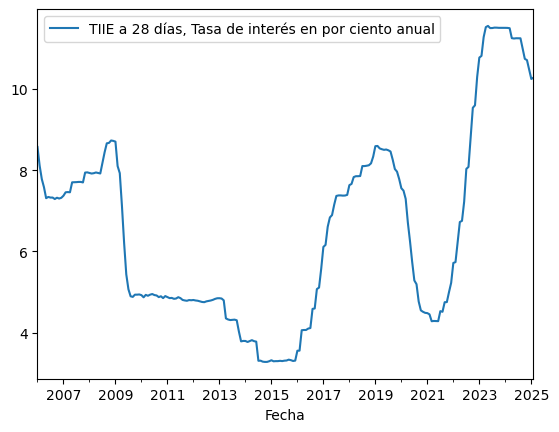

In [6]:
# Convert relevant columns to numeric data types
tiie = tiie.apply(pd.to_numeric, errors='coerce')

# graficamos
tiie.plot()

que facil era, pero ya aprendi. la vdd no sabia que todas eran casi iguales pero podia ver los datos al principio en lugar de al final

In [7]:
# nos quedamos con los datos de 2010 en adelante, voy a quedarme con todos los datos, vamos a ver como funciona luego el pca aqui

df1 = df1.groupby(df1.index).first()
df1 = df1.apply(pd.to_numeric, errors='coerce')
df1 = df1.loc["2011-03":]
df1 = df1.drop(df1.columns[[3, 4]], axis=1)

df1.head()


0        TIIE de Fondeo a Un Día Hábil Bancario, Mediana ponderada por volumen  \
Fecha                                                                            
2011-03                                               4.48                       
2011-04                                               4.50                       
2011-05                                               4.50                       
2011-06                                               4.45                       
2011-07                                               4.51                       

0        TIIE a 28 días, Tasa de interés en por ciento anual  \
Fecha                                                          
2011-03                                             4.8550     
2011-04                                             4.8331     
2011-05                                             4.8400     
2011-06                                             4.8725     
2011-07                                             4.8500     

0        Tasas de interés interbancarias Por ciento anual, TIIE a 91 días  
Fecha                                                                      
2011-03                                              4.880                 
2011-04                                              4.862                 
2011-05                                              4.875                 
2011-06                                              4.915                 
2011-07                                              4.880

### DF2

In [8]:
df2.head()

0               Título  \
0  2006-01-01 00:00:00   
1  2006-04-01 00:00:00   
2  2006-07-01 00:00:00   
3  2006-10-01 00:00:00   
4  2007-01-01 00:00:00   

0 Sistemas de pago de bajo valor, Tarjetas de crédito, Tarjetas vigentes al cierre del trimestre (todas las marcas)  \
0                                           19194516                                                                  
1                                           21042559                                                                  
2                                           23045079                                                                  
3                                           24552482                                                                  
4                                           25732459                                                                  

0 Sistemas de pago de bajo valor, Tarjetas de crédito (todas las marcas), A  \
0                                            2888159                          
1                                            3278850                          
2                                            3572291                          
3                                            3902273                          
4                                            4144985                          

0 Sistemas de pago de bajo valor, Tarjetas de crédito (todas las marcas), B  \
0                                              16828                          
1                                              16779                          
2                                              16668                          
3                                              16420                          
4                                              17879                          

0 Sistemas de pago de bajo valor, Tarjetas de crédito (todas las marcas), C  \
0                                            5184010                          
1                                            5267092                          
2                                            5652088                          
3                                            5701202                          
4                                            5949267                          

0 Sistemas de pago de bajo valor, Tarjetas de crédito (todas las marcas), D  \
0                                            4342957                          
1                                            4595294                          
2                                            4940651                          
3                                            5103822                          
4                                            5319045                          

0 Sistemas de pago de bajo valor, Tarjetas de crédito (todas las marcas), E  \
0                                            3344859                          
1                                            3863157                          
2                                            4311374                          
3                                            4672691                          
4                                            4793506                          

0 Sistemas de pago de bajo valor, Tarjetas de crédito (todas las marcas), F  \
0                                            1445254                          
1                                            1889587                          
2                                            2111096                          
3                                            2432677                          
4                                            2800621                          

0 Sistemas de pago de bajo valor, Tarjetas de crédito (todas las marcas), G  \
0                                               7463                          
1                                               7821                          
2                                        

In [9]:
# hacemos que la fecha sea el index
df2 = df2.set_index("Título")
df2.index.names = ["Fecha"]
df2.index = pd.to_datetime(df2.index)
df2.index = df2.index.to_period("M")
df2.head()

0       Sistemas de pago de bajo valor, Tarjetas de crédito, Tarjetas vigentes al cierre del trimestre (todas las marcas)  \
Fecha                                                                                                                       
2006-01                                           19194516                                                                  
2006-04                                           21042559                                                                  
2006-07                                           23045079                                                                  
2006-10                                           24552482                                                                  
2007-01                                           25732459                                                                  

0       Sistemas de pago de bajo valor, Tarjetas de crédito (todas las marcas), A  \
Fecha                                                                               
2006-01                                            2888159                          
2006-04                                            3278850                          
2006-07                                            3572291                          
2006-10                                            3902273                          
2007-01                                            4144985                          

0       Sistemas de pago de bajo valor, Tarjetas de crédito (todas las marcas), B  \
Fecha                                                                               
2006-01                                              16828                          
2006-04                                              16779                          
2006-07                                              16668                          
2006-10                                              16420                          
2007-01                                              17879                          

0       Sistemas de pago de bajo valor, Tarjetas de crédito (todas las marcas), C  \
Fecha                                                                               
2006-01                                            5184010                          
2006-04                                            5267092                          
2006-07                                            5652088                          
2006-10                                            5701202                          
2007-01                                            5949267                          

0       Sistemas de pago de bajo valor, Tarjetas de crédito (todas las marcas), D  \
Fecha                                                                               
2006-01                                            4342957                          
2006-04                                            4595294                          
2006-07                                            4940651                          
2006-10                                            5103822                          
2007-01                                            5319045                          

0       Sistemas de pago de bajo valor, Tarjetas de crédito (todas las marcas), E  \
Fecha                                                                               
2006-01                                            3344859                          
2006-04                                            3863157                          
2006-07                                            4311374                          
2006-10                                            4672691                          
2007-01                                            4793506                          

0       Sistemas de pago de bajo valor, Tarjetas de crédito (todas las marcas), F  \
Fecha                                                      

In [10]:
df2 = df2.apply(pd.to_numeric, errors='coerce')
complete_idx = pd.period_range(start=df2.index.min(), end=df2.index.max(), freq='M')
df2 = df2.reindex(complete_idx)
df2 = df2.interpolate(method='linear')
df2.head()

0        Sistemas de pago de bajo valor, Tarjetas de crédito, Tarjetas vigentes al cierre del trimestre (todas las marcas)  \
2006-01                                       1.919452e+07                                                                   
2006-02                                       1.981053e+07                                                                   
2006-03                                       2.042654e+07                                                                   
2006-04                                       2.104256e+07                                                                   
2006-05                                       2.171007e+07                                                                   

0        Sistemas de pago de bajo valor, Tarjetas de crédito (todas las marcas), A  \
2006-01                                       2.888159e+06                           
2006-02                                       3.018389e+06                           
2006-03                                       3.148620e+06                           
2006-04                                       3.278850e+06                           
2006-05                                       3.376664e+06                           

0        Sistemas de pago de bajo valor, Tarjetas de crédito (todas las marcas), B  \
2006-01                                       16828.000000                           
2006-02                                       16811.666667                           
2006-03                                       16795.333333                           
2006-04                                       16779.000000                           
2006-05                                       16742.000000                           

0        Sistemas de pago de bajo valor, Tarjetas de crédito (todas las marcas), C  \
2006-01                                          5184010.0                           
2006-02                                          5211704.0                           
2006-03                                          5239398.0                           
2006-04                                          5267092.0                           
2006-05                                          5395424.0                           

0        Sistemas de pago de bajo valor, Tarjetas de crédito (todas las marcas), D  \
2006-01                                       4.342957e+06                           
2006-02                                       4.427069e+06                           
2006-03                                       4.511182e+06                           
2006-04                                       4.595294e+06                           
2006-05                                       4.710413e+06                           

0        Sistemas de pago de bajo valor, Tarjetas de crédito (todas las marcas), E  \
2006-01                                       3.344859e+06                           
2006-02                                       3.517625e+06                           
2006-03                                       3.690391e+06                           
2006-04                                       3.863157e+06                           
2006-05                                       4.012563e+06                           

0        Sistemas de pago de bajo valor, Tarjetas de crédito (todas las marcas), F  \
2006-01                                       1.445254e+06                           
2006-02                                       1.593365e+06                           
2006-03                                       1.741476e+06                           
2006-04                                       1.889587e+06                           
2006-05                                       1.963423e+06                           

0        Sistemas de pago de bajo valor, Tarjetas de crédito (todas las marcas), G  \
2006-01                                        7463.000

In [11]:
df2 = df2.loc["2011-03":]
df2.head()

0        Sistemas de pago de bajo valor, Tarjetas de crédito, Tarjetas vigentes al cierre del trimestre (todas las marcas)  \
2011-03                                       2.297680e+07                                                                   
2011-04                                       2.324182e+07                                                                   
2011-05                                       2.351398e+07                                                                   
2011-06                                       2.378613e+07                                                                   
2011-07                                       2.405829e+07                                                                   

0        Sistemas de pago de bajo valor, Tarjetas de crédito (todas las marcas), A  \
2011-03                                                0.0                           
2011-04                                                0.0                           
2011-05                                                0.0                           
2011-06                                                0.0                           
2011-07                                                0.0                           

0        Sistemas de pago de bajo valor, Tarjetas de crédito (todas las marcas), B  \
2011-03                                            15185.0                           
2011-04                                            15638.0                           
2011-05                                            15552.0                           
2011-06                                            15466.0                           
2011-07                                            15380.0                           

0        Sistemas de pago de bajo valor, Tarjetas de crédito (todas las marcas), C  \
2011-03                                       5.751683e+06                           
2011-04                                       5.804978e+06                           
2011-05                                       5.944675e+06                           
2011-06                                       6.084373e+06                           
2011-07                                       6.224070e+06                           

0        Sistemas de pago de bajo valor, Tarjetas de crédito (todas las marcas), D  \
2011-03                                       8.118886e+06                           
2011-04                                       8.242474e+06                           
2011-05                                       8.231955e+06                           
2011-06                                       8.221437e+06                           
2011-07                                       8.210918e+06                           

0        Sistemas de pago de bajo valor, Tarjetas de crédito (todas las marcas), E  \
2011-03                                       2.889781e+06                           
2011-04                                       2.931260e+06                           
2011-05                                       2.971291e+06                           
2011-06                                       3.011323e+06                           
2011-07                                       3.051354e+06                           

0        Sistemas de pago de bajo valor, Tarjetas de crédito (todas las marcas), F  \
2011-03                                       1.098820e+06                           
2011-04                                       1.109787e+06                           
2011-05                                       1.130715e+06                           
2011-06                                       1.151642e+06                           
2011-07                                       1.172570e+06                           

0        Sistemas de pago de bajo valor, Tarjetas de crédito (todas las marcas), G  \
2011-03                                       16794.666

In [12]:
# drop columns with all zeros
df2 = df2.loc[:, (df2 != 0).any(axis=0)]
df2.head()

0        Sistemas de pago de bajo valor, Tarjetas de crédito, Tarjetas vigentes al cierre del trimestre (todas las marcas)  \
2011-03                                       2.297680e+07                                                                   
2011-04                                       2.324182e+07                                                                   
2011-05                                       2.351398e+07                                                                   
2011-06                                       2.378613e+07                                                                   
2011-07                                       2.405829e+07                                                                   

0        Sistemas de pago de bajo valor, Tarjetas de crédito (todas las marcas), B  \
2011-03                                            15185.0                           
2011-04                                            15638.0                           
2011-05                                            15552.0                           
2011-06                                            15466.0                           
2011-07                                            15380.0                           

0        Sistemas de pago de bajo valor, Tarjetas de crédito (todas las marcas), C  \
2011-03                                       5.751683e+06                           
2011-04                                       5.804978e+06                           
2011-05                                       5.944675e+06                           
2011-06                                       6.084373e+06                           
2011-07                                       6.224070e+06                           

0        Sistemas de pago de bajo valor, Tarjetas de crédito (todas las marcas), D  \
2011-03                                       8.118886e+06                           
2011-04                                       8.242474e+06                           
2011-05                                       8.231955e+06                           
2011-06                                       8.221437e+06                           
2011-07                                       8.210918e+06                           

0        Sistemas de pago de bajo valor, Tarjetas de crédito (todas las marcas), E  \
2011-03                                       2.889781e+06                           
2011-04                                       2.931260e+06                           
2011-05                                       2.971291e+06                           
2011-06                                       3.011323e+06                           
2011-07                                       3.051354e+06                           

0        Sistemas de pago de bajo valor, Tarjetas de crédito (todas las marcas), F  \
2011-03                                       1.098820e+06                           
2011-04                                       1.109787e+06                           
2011-05                                       1.130715e+06                           
2011-06                                       1.151642e+06                           
2011-07                                       1.172570e+06                           

0        Sistemas de pago de bajo valor, Tarjetas de crédito (todas las marcas), G  \
2011-03                                       16794.666667                           
2011-04                                       17015.000000                           
2011-05                                       17213.333333                           
2011-06                                       17411.666667                           
2011-07                                       17610.000000                           

0        Sistemas de pago de bajo valor, Tarjetas de crédito (todas las marcas), H  \
2011-03                                      194397.333

In [13]:
# sumar las columnas
for col in df2.columns:
    if sum(df2[col]) < 1000:
        print(f"La columna {col} es nula")

La columna Sistemas de pago de bajo valor, Tarjetas de crédito (otras marcas), Q es nula
La columna Sistemas de pago de bajo valor, Tarjetas de débito (mastercard), U es nula
La columna Sistemas de pago de bajo valor, Tarjetas de débito (visa), E es nula


In [14]:
sum(df2["Sistemas de pago de bajo valor, Tarjetas de débito (otras marcas), W"])

185691.0

In [15]:
pd.set_option('display.max_columns', None)
df2

0        Sistemas de pago de bajo valor, Tarjetas de crédito, Tarjetas vigentes al cierre del trimestre (todas las marcas)  \
2011-03                                       2.297680e+07                                                                   
2011-04                                       2.324182e+07                                                                   
2011-05                                       2.351398e+07                                                                   
2011-06                                       2.378613e+07                                                                   
2011-07                                       2.405829e+07                                                                   
...                                                    ...                                                                   
2024-03                                       3.953848e+07                                                                   
2024-04                                       3.993401e+07                                                                   
2024-05                                       4.051577e+07                                                                   
2024-06                                       4.109753e+07                                                                   
2024-07                                       4.167929e+07                                                                   

0        Sistemas de pago de bajo valor, Tarjetas de crédito (todas las marcas), B  \
2011-03                                            15185.0                           
2011-04                                            15638.0                           
2011-05                                            15552.0                           
2011-06                                            15466.0                           
2011-07                                            15380.0                           
...                                                    ...                           
2024-03                                            19669.0                           
2024-04                                            19755.0                           
2024-05                                            19975.0                           
2024-06                                            20195.0                           
2024-07                                            20415.0                           

0        Sistemas de pago de bajo valor, Tarjetas de crédito (todas las marcas), C  \
2011-03                                       5.751683e+06                           
2011-04                                       5.804978e+06                           
2011-05                                       5.944675e+06                           
2011-06                                       6.084373e+06                           
2011-07                                       6.224070e+06                           
...                                                    ...                           
2024-03                                       6.442120e+06                           
2024-04                                       6.579001e+06                           
2024-05                                       6.777559e+06                           
2024-06                                       6.976117e+06                           
2024-07                                       7.174675e+06                           

0        Sistemas de pago de bajo valor, Tarjetas de crédito (todas las marcas), D  \
2011-03                                       8.118886e+06                           
2011-04                                       8.242474e+06                           
2011-05                                       8.231955e+06                           
2011-06                                       8.221437e+06                   

In [16]:
# si tiene la palabra debito la borramos de las columnas
df2 = df2.loc[:, ~df2.columns.str.contains("débito")]
df2.head()

0        Sistemas de pago de bajo valor, Tarjetas de crédito, Tarjetas vigentes al cierre del trimestre (todas las marcas)  \
2011-03                                       2.297680e+07                                                                   
2011-04                                       2.324182e+07                                                                   
2011-05                                       2.351398e+07                                                                   
2011-06                                       2.378613e+07                                                                   
2011-07                                       2.405829e+07                                                                   

0        Sistemas de pago de bajo valor, Tarjetas de crédito (todas las marcas), B  \
2011-03                                            15185.0                           
2011-04                                            15638.0                           
2011-05                                            15552.0                           
2011-06                                            15466.0                           
2011-07                                            15380.0                           

0        Sistemas de pago de bajo valor, Tarjetas de crédito (todas las marcas), C  \
2011-03                                       5.751683e+06                           
2011-04                                       5.804978e+06                           
2011-05                                       5.944675e+06                           
2011-06                                       6.084373e+06                           
2011-07                                       6.224070e+06                           

0        Sistemas de pago de bajo valor, Tarjetas de crédito (todas las marcas), D  \
2011-03                                       8.118886e+06                           
2011-04                                       8.242474e+06                           
2011-05                                       8.231955e+06                           
2011-06                                       8.221437e+06                           
2011-07                                       8.210918e+06                           

0        Sistemas de pago de bajo valor, Tarjetas de crédito (todas las marcas), E  \
2011-03                                       2.889781e+06                           
2011-04                                       2.931260e+06                           
2011-05                                       2.971291e+06                           
2011-06                                       3.011323e+06                           
2011-07                                       3.051354e+06                           

0        Sistemas de pago de bajo valor, Tarjetas de crédito (todas las marcas), F  \
2011-03                                       1.098820e+06                           
2011-04                                       1.109787e+06                           
2011-05                                       1.130715e+06                           
2011-06                                       1.151642e+06                           
2011-07                                       1.172570e+06                           

0        Sistemas de pago de bajo valor, Tarjetas de crédito (todas las marcas), G  \
2011-03                                       16794.666667                           
2011-04                                       17015.000000                           
2011-05                                       17213.333333                           
2011-06                                       17411.666667                           
2011-07                                       17610.000000                           

0        Sistemas de pago de bajo valor, Tarjetas de crédito (todas las marcas), H  \
2011-03                                      194397.333

### DF3

In [17]:
df3.tail()  

0                 Título  \
440  2024-09-01 00:00:00   
441  2024-10-01 00:00:00   
442  2024-11-01 00:00:00   
443  2024-12-01 00:00:00   
444  2025-01-01 00:00:00   

0   TIIE de fondeo a 1 día, Tasa de interés promedio mensual, en por ciento anual  \
440                                              10.73                              
441                                              10.51                              
442                                              10.42                              
443                                              10.25                              
444                                                 10                              

0   TIIE a 28 días, Tasa de interés promedio mensual, en por ciento anual  \
440                                              10.95                      
441                                              10.74                      
442                                              10.61                      
443                                              10.38                      
444                                              10.28                      

0   TIIE a 91 días, Tasa de interés promedio mensual, en por ciento anual  \
440                                              11.14                      
441                                              10.89                      
442                                               10.8                      
443                                              10.64                      
444                                              10.38                      

0   TIIE a 182 días, Tasa de interés promedio mensual, en por ciento anual  \
440                                              11.29                       
441                                              11.03                       
442                                              10.94                       
443                                              10.78                       
444                                              10.51                       

0   TIIP a 28 días (Serie histórica), Tasa de interés promedio mensual, en por ciento anual  \
440                                                N/E                                        
441                                                N/E                                        
442                                                N/E                                        
443                                                N/E                                        
444                                                N/E                                        

0   Tasas Mexibor a 1 mes, Tasa promedio mensual Por ciento anual  \
440                                                N/E              
441                                                N/E              
442                                                N/E              
443                                                N/E              
444                                                N/E              

0   Tasa Mexibor a 3 meses, Tasa de interés promedio mensual, en por ciento anual  \
440                                                N/E                              
441                                                N/E                              
442                                                N/E                              
443                                                N/E                              
444                                                N/E                              

0   Tasa Mexibor a 6 meses, Tasa de interés promedio mensual, en por ciento anual  \
440                                                N/E                              
441                                                N/E                              
442                                                N/E                              
443                                                N/E                              
444

In [18]:
# hacemos que la fecha sea el index
df3 = df3.set_index("Título")
df3.index.names = ["Fecha"]
df3.index = pd.to_datetime(df3.index)
df3.head()

0          TIIE de fondeo a 1 día, Tasa de interés promedio mensual, en por ciento anual  \
Fecha                                                                                      
1988-01-01                                                N/E                              
1988-02-01                                                N/E                              
1988-03-01                                                N/E                              
1988-04-01                                                N/E                              
1988-05-01                                                N/E                              

0          TIIE a 28 días, Tasa de interés promedio mensual, en por ciento anual  \
Fecha                                                                              
1988-01-01                                                N/E                      
1988-02-01                                                N/E                      
1988-03-01                                                N/E                      
1988-04-01                                                N/E                      
1988-05-01                                                N/E                      

0          TIIE a 91 días, Tasa de interés promedio mensual, en por ciento anual  \
Fecha                                                                              
1988-01-01                                                N/E                      
1988-02-01                                                N/E                      
1988-03-01                                                N/E                      
1988-04-01                                                N/E                      
1988-05-01                                                N/E                      

0          TIIE a 182 días, Tasa de interés promedio mensual, en por ciento anual  \
Fecha                                                                               
1988-01-01                                                N/E                       
1988-02-01                                                N/E                       
1988-03-01                                                N/E                       
1988-04-01                                                N/E                       
1988-05-01                                                N/E                       

0          TIIP a 28 días (Serie histórica), Tasa de interés promedio mensual, en por ciento anual  \
Fecha                                                                                                
1988-01-01                                                N/E                                        
1988-02-01                                                N/E                                        
1988-03-01                                                N/E                                        
1988-04-01                                                N/E                                        
1988-05-01                                                N/E                                        

0          Tasas Mexibor a 1 mes, Tasa promedio mensual Por ciento anual  \
Fecha                                                                      
1988-01-01                                                N/E              
1988-02-01                                                N/E              
1988-03-01                                                N/E              
1988-04-01                                                N/E              
1988-05-01                                                N/E              

0          Tasa Mexibor a 3 meses, Tasa de interés promedio mensual, en por ciento anual  \
Fecha                                                                                      
1988-01-01                                                N/E                              
1988-02-01                                               

In [19]:
# pasamos de fecha a periodo mensual
df3.index = df3.index.to_period("M")
df3.tail()

0       TIIE de fondeo a 1 día, Tasa de interés promedio mensual, en por ciento anual  \
Fecha                                                                                   
2024-09                                              10.73                              
2024-10                                              10.51                              
2024-11                                              10.42                              
2024-12                                              10.25                              
2025-01                                                 10                              

0       TIIE a 28 días, Tasa de interés promedio mensual, en por ciento anual  \
Fecha                                                                           
2024-09                                              10.95                      
2024-10                                              10.74                      
2024-11                                              10.61                      
2024-12                                              10.38                      
2025-01                                              10.28                      

0       TIIE a 91 días, Tasa de interés promedio mensual, en por ciento anual  \
Fecha                                                                           
2024-09                                              11.14                      
2024-10                                              10.89                      
2024-11                                               10.8                      
2024-12                                              10.64                      
2025-01                                              10.38                      

0       TIIE a 182 días, Tasa de interés promedio mensual, en por ciento anual  \
Fecha                                                                            
2024-09                                              11.29                       
2024-10                                              11.03                       
2024-11                                              10.94                       
2024-12                                              10.78                       
2025-01                                              10.51                       

0       TIIP a 28 días (Serie histórica), Tasa de interés promedio mensual, en por ciento anual  \
Fecha                                                                                             
2024-09                                                N/E                                        
2024-10                                                N/E                                        
2024-11                                                N/E                                        
2024-12                                                N/E                                        
2025-01                                                N/E                                        

0       Tasas Mexibor a 1 mes, Tasa promedio mensual Por ciento anual  \
Fecha                                                                   
2024-09                                                N/E              
2024-10                                                N/E              
2024-11                                                N/E              
2024-12                                                N/E              
2025-01                                                N/E              

0       Tasa Mexibor a 3 meses, Tasa de interés promedio mensual, en por ciento anual  \
Fecha                                                                                   
2024-09                                                N/E                              
2024-10                                                N/E                              
2024-11                                                N/E                              
2024-12       

In [20]:
# solo queremos las de 28 dias (MENOS MEXIBOR Y TIIP porque tienen muchos N/E)
df3 = df3.iloc[:, [1, 2, 3, 4, 10, 11]]
df3.tail()

0       TIIE a 28 días, Tasa de interés promedio mensual, en por ciento anual  \
Fecha                                                                           
2024-09                                              10.95                      
2024-10                                              10.74                      
2024-11                                              10.61                      
2024-12                                              10.38                      
2025-01                                              10.28                      

0       TIIE a 91 días, Tasa de interés promedio mensual, en por ciento anual  \
Fecha                                                                           
2024-09                                              11.14                      
2024-10                                              10.89                      
2024-11                                               10.8                      
2024-12                                              10.64                      
2025-01                                              10.38                      

0       TIIE a 182 días, Tasa de interés promedio mensual, en por ciento anual  \
Fecha                                                                            
2024-09                                              11.29                       
2024-10                                              11.03                       
2024-11                                              10.94                       
2024-12                                              10.78                       
2025-01                                              10.51                       

0       TIIP a 28 días (Serie histórica), Tasa de interés promedio mensual, en por ciento anual  \
Fecha                                                                                             
2024-09                                                N/E                                        
2024-10                                                N/E                                        
2024-11                                                N/E                                        
2024-12                                                N/E                                        
2025-01                                                N/E                                        

0       Fondeo promedio ponderado bancario, Tasa de interés promedio mensual, en por ciento anual  \
Fecha                                                                                               
2024-09                                              10.75                                          
2024-10                                              10.54                                          
2024-11                                              10.46                                          
2024-12                                              10.28                                          
2025-01                                              10.03                                          

0       Fondeo promedio ponderado gubernamental, Tasa de interés promedio mensual, en por ciento anual  
Fecha                                                                                                   
2024-09                                              10.73                                              
2024-10                                              10.52                                              
2024-11                                              10.42                                              
2024-12                                              10.25                                              
2025-01                                                 10

In [21]:
# df3 = df3.replace("N/E", pd.NA).dropna()
# df3.head()

<Axes: xlabel='Fecha'>

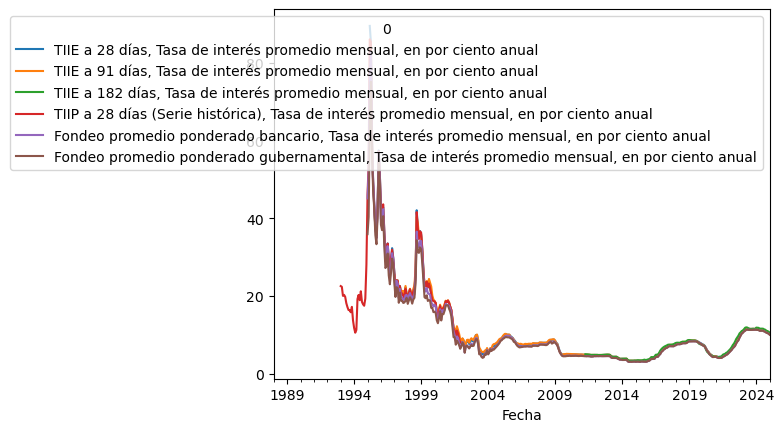

In [22]:
# Convert relevant columns to numeric data types
df3 = df3.apply(pd.to_numeric, errors='coerce')


# graficamos
df3.plot()

ahora se que son todas casi iguales :)

In [23]:
df3 = df3.loc["2011-03":]
df3.head()

0        TIIE a 28 días, Tasa de interés promedio mensual, en por ciento anual  \
Fecha                                                                            
2011-03                                               4.84                       
2011-04                                               4.85                       
2011-05                                               4.85                       
2011-06                                               4.85                       
2011-07                                               4.82                       

0        TIIE a 91 días, Tasa de interés promedio mensual, en por ciento anual  \
Fecha                                                                            
2011-03                                               4.87                       
2011-04                                               4.88                       
2011-05                                               4.88                       
2011-06                                               4.89                       
2011-07                                               4.86                       

0        TIIE a 182 días, Tasa de interés promedio mensual, en por ciento anual  \
Fecha                                                                             
2011-03                                                NaN                        
2011-04                                               4.98                        
2011-05                                               4.96                        
2011-06                                               4.95                        
2011-07                                               4.90                        

0        TIIP a 28 días (Serie histórica), Tasa de interés promedio mensual, en por ciento anual  \
Fecha                                                                                              
2011-03                                                NaN                                         
2011-04                                                NaN                                         
2011-05                                                NaN                                         
2011-06                                                NaN                                         
2011-07                                                NaN                                         

0        Fondeo promedio ponderado bancario, Tasa de interés promedio mensual, en por ciento anual  \
Fecha                                                                                                
2011-03                                               4.51                                           
2011-04                                               4.52                                           
2011-05                                               4.49                                           
2011-06                                               4.51                                           
2011-07                                               4.49                                           

0        Fondeo promedio ponderado gubernamental, Tasa de interés promedio mensual, en por ciento anual  
Fecha                                                                                                    
2011-03                                               4.47                                               
2011-04                                               4.49                                               
2011-05                                               4.45                                               
2011-06                                               4.48                                               
2011-07                                               4.47

<Axes: xlabel='Fecha'>

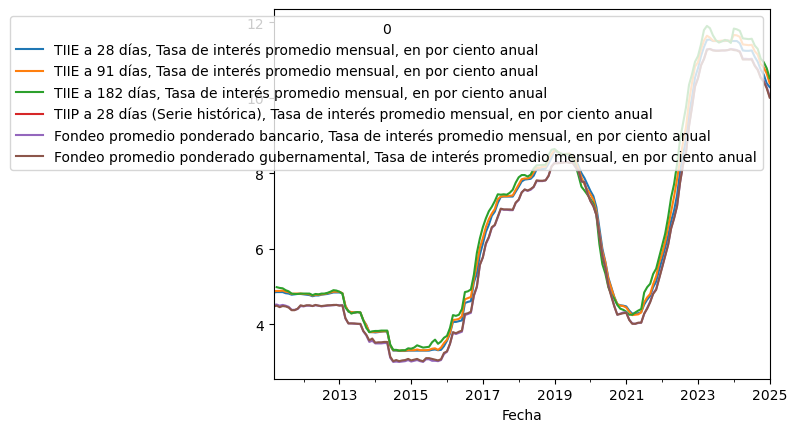

In [24]:
df3.plot()

### DF4

In [25]:
df4.head()

0               Título  \
0  2011-03-01 00:00:00   
1  2011-05-01 00:00:00   
2  2011-07-01 00:00:00   
3  2011-09-01 00:00:00   
4  2011-11-01 00:00:00   

0 Tasa de efectiva promedio ponderada por saldo de todos los clientes con y sin promociones, Tarjetas de crédito  \
0                                            25.0942                                                               
1                                            24.9821                                                               
2                                            24.8008                                                               
3                                            25.2722                                                               
4                                             24.522                                                               

0 Tasa de efectiva promedio ponderada por saldo de clientes no totaleros con y sin promociones, Tarjetas de crédito  \
0                                            30.3445                                                                  
1                                            30.3204                                                                  
2                                            30.2965                                                                  
3                                            30.5503                                                                  
4                                            30.3803                                                                  

0 Tasa de efectiva promedio ponderada por saldo de clientes no totaleros sin promociones, Tarjetas de crédito  
0                                            37.6358                                                           
1                                            37.7136                                                           
2                                            37.7225                                                           
3                                            37.8129                                                           
4                                            37.8729

In [26]:
# uso mucho esto entonces lo hago una funcion

def clean_df(df3):
    # hacemos que la fecha sea el index
    df3 = df3.set_index("Título")
    df3.index.names = ["Fecha"]
    df3.index = pd.to_datetime(df3.index)
    df3.index = df3.index.to_period("M")
    df3 = df3.apply(pd.to_numeric, errors='coerce')
    return df3

df4 = clean_df(df4)
df4.head()

0        Tasa de efectiva promedio ponderada por saldo de todos los clientes con y sin promociones, Tarjetas de crédito  \
Fecha                                                                                                                     
2011-03                                            25.0942                                                                
2011-05                                            24.9821                                                                
2011-07                                            24.8008                                                                
2011-09                                            25.2722                                                                
2011-11                                            24.5220                                                                

0        Tasa de efectiva promedio ponderada por saldo de clientes no totaleros con y sin promociones, Tarjetas de crédito  \
Fecha                                                                                                                        
2011-03                                            30.3445                                                                   
2011-05                                            30.3204                                                                   
2011-07                                            30.2965                                                                   
2011-09                                            30.5503                                                                   
2011-11                                            30.3803                                                                   

0        Tasa de efectiva promedio ponderada por saldo de clientes no totaleros sin promociones, Tarjetas de crédito  
Fecha                                                                                                                 
2011-03                                            37.6358                                                            
2011-05                                            37.7136                                                            
2011-07                                            37.7225                                                            
2011-09                                            37.8129                                                            
2011-11                                            37.8729

<Axes: xlabel='Fecha'>

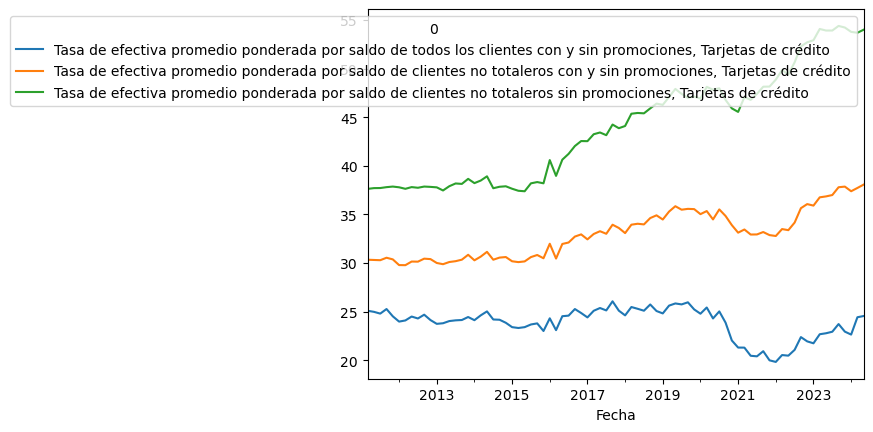

In [27]:
df4.plot()

In [28]:
df4 = df4.apply(pd.to_numeric, errors='coerce')
complete_idx = pd.period_range(start=df4.index.min(), end=df4.index.max(), freq='M')
df4 = df4.reindex(complete_idx)
df4 = df4.interpolate(method='linear')
df4.head()

0        Tasa de efectiva promedio ponderada por saldo de todos los clientes con y sin promociones, Tarjetas de crédito  \
2011-03                                           25.09420                                                                
2011-04                                           25.03815                                                                
2011-05                                           24.98210                                                                
2011-06                                           24.89145                                                                
2011-07                                           24.80080                                                                

0        Tasa de efectiva promedio ponderada por saldo de clientes no totaleros con y sin promociones, Tarjetas de crédito  \
2011-03                                           30.34450                                                                   
2011-04                                           30.33245                                                                   
2011-05                                           30.32040                                                                   
2011-06                                           30.30845                                                                   
2011-07                                           30.29650                                                                   

0        Tasa de efectiva promedio ponderada por saldo de clientes no totaleros sin promociones, Tarjetas de crédito  
2011-03                                           37.63580                                                            
2011-04                                           37.67470                                                            
2011-05                                           37.71360                                                            
2011-06                                           37.71805                                                            
2011-07                                           37.72250

<Axes: >

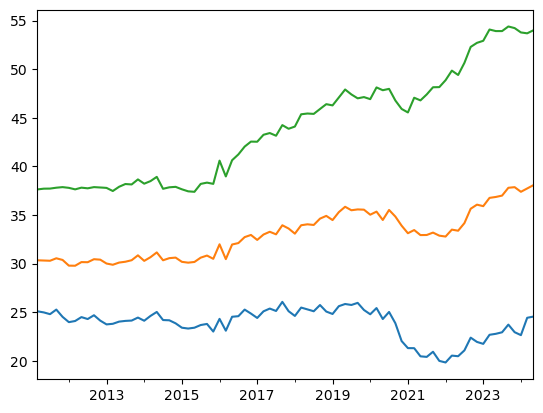

In [29]:
df4.plot(legend=False)

### DF5

In [30]:
df5.head()

0               Título  \
0  1975-08-01 00:00:00   
1  1975-09-01 00:00:00   
2  1975-10-01 00:00:00   
3  1975-11-01 00:00:00   
4  1975-12-01 00:00:00   

0 Costo de captación a plazo de pasivos en moneda nacional (CCP), Tasa en por ciento anual  \
0                                                N/E                                         
1                                                N/E                                         
2                                                N/E                                         
3                                                N/E                                         
4                                                N/E                                         

0 Costo de captación a plazo de pasivos en moneda nacional observado (CCPO), Tasa en por ciento anual  \
0                                                N/E                                                    
1                                                N/E                                                    
2                                                N/E                                                    
3                                                N/E                                                    
4                                                N/E                                                    

0 Costo de captación a plazo de pasivos en Udis (CCP-Udis), Tasa en por ciento anual  \
0                                                N/E                                   
1                                                N/E                                   
2                                                N/E                                   
3                                                N/E                                   
4                                                N/E                                   

0 Costo de captación a plazo de pasivos en dólares (CCP-Dólares), Tasa en por ciento anual  \
0                                                N/E                                         
1                                                N/E                                         
2                                                N/E                                         
3                                                N/E                                         
4                                                N/E                                         

0 Costo porcentual promedio (CPP), Tasa en por ciento anual  \
0                                              11.91          
1                                              11.91          
2                                              11.91          
3                                              11.92          
4                                              11.97          

0 Costo de captaciÃ³n a plazo de pasivos estables (CPPE), Tasa en por ciento anual  \
0                                                N/E                                 
1                                                N/E                                 
2                                                N/E                                 
3                                                N/E                                 
4                                                N/E                                 

0 Tasa de interés de los pasivos a plazo, Moneda nacional, Banca de Desarrollo  
0                                                N/E                            
1                                                N/E                            
2                                                N/E                            
3                                                N/E                            
4                                                N/E

In [31]:
df5 = clean_df(df5)

df5.head(30)

0        Costo de captación a plazo de pasivos en moneda nacional (CCP), Tasa en por ciento anual  \
Fecha                                                                                               
1975-08                                                NaN                                          
1975-09                                                NaN                                          
1975-10                                                NaN                                          
1975-11                                                NaN                                          
1975-12                                                NaN                                          
1976-01                                                NaN                                          
1976-02                                                NaN                                          
1976-03                                                NaN                                          
1976-04                                                NaN                                          
1976-05                                                NaN                                          
1976-06                                                NaN                                          
1976-07                                                NaN                                          
1976-08                                                NaN                                          
1976-09                                                NaN                                          
1976-10                                                NaN                                          
1976-11                                                NaN                                          
1976-12                                                NaN                                          
1977-01                                                NaN                                          
1977-02                                                NaN                                          
1977-03                                                NaN                                          
1977-04                                                NaN                                          
1977-05                                                NaN                                          
1977-06                                                NaN                                          
1977-07                                                NaN                                          
1977-08                                                NaN                                          
1977-09                                                NaN                                          
1977-10                                                NaN                                          
1977-11                                                NaN                                          
1977-12                                                NaN                                          
1978-01                                                NaN                                          

0        Costo de captación a plazo de pasivos en moneda nacional observado (CCPO), Tasa en por ciento anual  \
Fecha                                                                                                          
1975-08                                                NaN                                                     
1975-09                                                NaN                                                     
1975-10                                                NaN                                                     
1975-11                                                NaN                                                     
1975-12                                                NaN                                     

<Axes: xlabel='Fecha'>

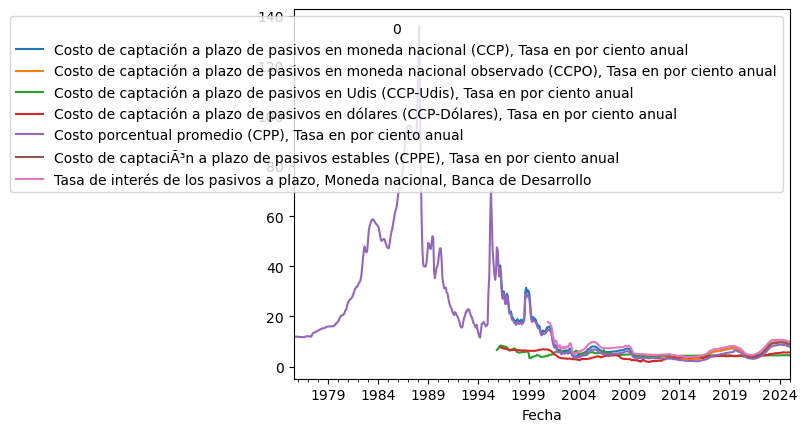

In [32]:
df5.plot()

In [33]:
df5 = df5.loc["2011-03":]
df5.head()

0        Costo de captación a plazo de pasivos en moneda nacional (CCP), Tasa en por ciento anual  \
Fecha                                                                                               
2011-03                                               4.17                                          
2011-04                                               4.21                                          
2011-05                                               4.20                                          
2011-06                                               4.22                                          
2011-07                                               4.22                                          

0        Costo de captación a plazo de pasivos en moneda nacional observado (CCPO), Tasa en por ciento anual  \
Fecha                                                                                                          
2011-03                                               4.17                                                     
2011-04                                               4.19                                                     
2011-05                                               4.20                                                     
2011-06                                               4.21                                                     
2011-07                                               4.22                                                     

0        Costo de captación a plazo de pasivos en Udis (CCP-Udis), Tasa en por ciento anual  \
Fecha                                                                                         
2011-03                                               3.86                                    
2011-04                                               4.15                                    
2011-05                                               4.44                                    
2011-06                                               4.44                                    
2011-07                                               3.82                                    

0        Costo de captación a plazo de pasivos en dólares (CCP-Dólares), Tasa en por ciento anual  \
Fecha                                                                                               
2011-03                                               2.10                                          
2011-04                                               2.13                                          
2011-05                                               2.15                                          
2011-06                                               2.21                                          
2011-07                                               2.12                                          

0        Costo porcentual promedio (CPP), Tasa en por ciento anual  \
Fecha                                                                
2011-03                                               3.34           
2011-04                                               3.38           
2011-05                                               3.35           
2011-06                                               3.38           
2011-07                                               3.39           

0        Costo de captaciÃ³n a plazo de pasivos estables (CPPE), Tasa en por ciento anual  \
Fecha                                                                                       
2011-03                                                NaN                                  
2011-04                                                NaN                                  
2011-05                                                NaN                                  
2011-06                                                NaN                                  
2011-07                                                NaN                          

### DF6

In [34]:
df6.head()

0               Título  \
0  2002-01-04 00:00:00   
1  2002-01-11 00:00:00   
2  2002-01-18 00:00:00   
3  2002-01-25 00:00:00   
4  2002-02-01 00:00:00   

0 Valores privados de corto plazo semanal, Total corto plazo, tasa promedio ponderada, Porcentajes  \
0                                                9.4                                                 
1                                               7.54                                                 
2                                               7.76                                                 
3                                               7.49                                                 
4                                               8.88                                                 

0 Valores privados de corto plazo semanal, Papel comercial, tasa promedio ponderada, Porcentajes  \
0                                                9.4                                               
1                                               7.54                                               
2                                               7.76                                               
3                                               7.49                                               
4                                               8.88                                               

0 Valores privados de corto plazo semanal, Certificados bursátiles a corto plazo, tasa promedio ponderada, Porcentajes  
0                                                N/E                                                                    
1                                                N/E                                                                    
2                                                N/E                                                                    
3                                                N/E                                                                    
4                                                N/E

In [35]:
df6 = clean_df(df6)


df6.head()

0        Valores privados de corto plazo semanal, Total corto plazo, tasa promedio ponderada, Porcentajes  \
Fecha                                                                                                       
2002-01                                               9.40                                                  
2002-01                                               7.54                                                  
2002-01                                               7.76                                                  
2002-01                                               7.49                                                  
2002-02                                               8.88                                                  

0        Valores privados de corto plazo semanal, Papel comercial, tasa promedio ponderada, Porcentajes  \
Fecha                                                                                                     
2002-01                                               9.40                                                
2002-01                                               7.54                                                
2002-01                                               7.76                                                
2002-01                                               7.49                                                
2002-02                                               8.88                                                

0        Valores privados de corto plazo semanal, Certificados bursátiles a corto plazo, tasa promedio ponderada, Porcentajes  
Fecha                                                                                                                          
2002-01                                                NaN                                                                     
2002-01                                                NaN                                                                     
2002-01                                                NaN                                                                     
2002-01                                                NaN                                                                     
2002-02                                                NaN

In [36]:
df6 = df6.groupby(df6.index).first()

df6.head()

0        Valores privados de corto plazo semanal, Total corto plazo, tasa promedio ponderada, Porcentajes  \
Fecha                                                                                                       
2002-01                                               9.40                                                  
2002-02                                               8.88                                                  
2002-03                                               8.35                                                  
2002-04                                               7.27                                                  
2002-05                                               7.93                                                  

0        Valores privados de corto plazo semanal, Papel comercial, tasa promedio ponderada, Porcentajes  \
Fecha                                                                                                     
2002-01                                               9.40                                                
2002-02                                               8.88                                                
2002-03                                               8.35                                                
2002-04                                               7.27                                                
2002-05                                               7.93                                                

0        Valores privados de corto plazo semanal, Certificados bursátiles a corto plazo, tasa promedio ponderada, Porcentajes  
Fecha                                                                                                                          
2002-01                                                NaN                                                                     
2002-02                                                NaN                                                                     
2002-03                                                NaN                                                                     
2002-04                                                NaN                                                                     
2002-05                                                NaN

<Axes: xlabel='Fecha'>

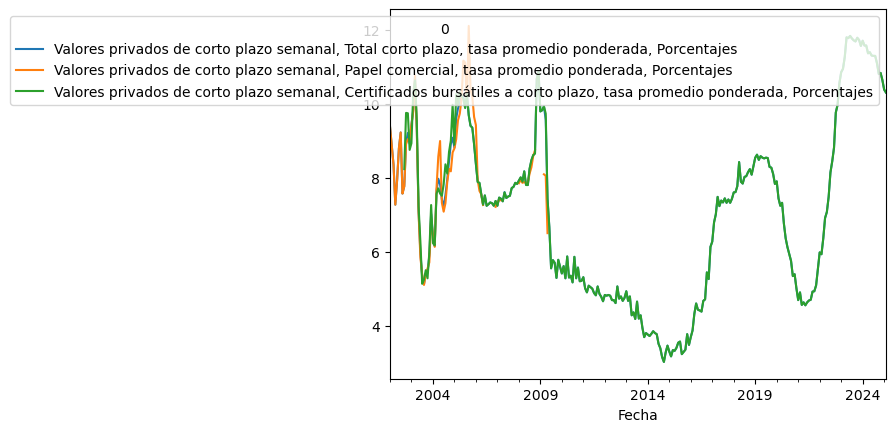

In [37]:
df6.plot()

In [38]:
df6 = df6.loc["2011-03":]
df6.head()

0        Valores privados de corto plazo semanal, Total corto plazo, tasa promedio ponderada, Porcentajes  \
Fecha                                                                                                       
2011-03                                               4.90                                                  
2011-04                                               5.08                                                  
2011-05                                               5.04                                                  
2011-06                                               5.00                                                  
2011-07                                               4.88                                                  

0        Valores privados de corto plazo semanal, Papel comercial, tasa promedio ponderada, Porcentajes  \
Fecha                                                                                                     
2011-03                                                NaN                                                
2011-04                                                NaN                                                
2011-05                                                NaN                                                
2011-06                                                NaN                                                
2011-07                                                NaN                                                

0        Valores privados de corto plazo semanal, Certificados bursátiles a corto plazo, tasa promedio ponderada, Porcentajes  
Fecha                                                                                                                          
2011-03                                               4.90                                                                     
2011-04                                               5.08                                                                     
2011-05                                               5.04                                                                     
2011-06                                               5.00                                                                     
2011-07                                               4.88

### DF7

In [39]:
df7.head()

0               Título  \
0  2019-01-02 00:00:00   
1  2019-01-03 00:00:00   
2  2019-01-04 00:00:00   
3  2019-01-07 00:00:00   
4  2019-01-08 00:00:00   

0 Tasa de fondeo gubernamental, Mediana ponderada por volumen, Tasa de interés en por ciento anual  \
0                                               8.31                                                 
1                                               8.28                                                 
2                                               8.24                                                 
3                                               8.26                                                 
4                                               8.26                                                 

0 Tasa de fondeo ponderada con BPAS y BREMS.  \
0                                       8.31   
1                                       8.27   
2                                       8.24   
3                                       8.26   
4                                       8.25   

0 Tasa de fondeo gubernamental, Percentil 25, Tasa de interés en por ciento anual  \
0                                                N/E                                
1                                                N/E                                
2                                                N/E                                
3                                                N/E                                
4                                                N/E                                

0 Tasa de fondeo gubernamental, Percentil 75, Tasa de interés en por ciento anual  
0                                                N/E                               
1                                                N/E                               
2                                                N/E                               
3                                                N/E                               
4                                                N/E

In [40]:
df7 = clean_df(df7)

df7.head()

0        Tasa de fondeo gubernamental, Mediana ponderada por volumen, Tasa de interés en por ciento anual  \
Fecha                                                                                                       
2019-01                                               8.31                                                  
2019-01                                               8.28                                                  
2019-01                                               8.24                                                  
2019-01                                               8.26                                                  
2019-01                                               8.26                                                  

0        Tasa de fondeo ponderada con BPAS y BREMS.  \
Fecha                                                 
2019-01                                        8.31   
2019-01                                        8.27   
2019-01                                        8.24   
2019-01                                        8.26   
2019-01                                        8.25   

0        Tasa de fondeo gubernamental, Percentil 25, Tasa de interés en por ciento anual  \
Fecha                                                                                      
2019-01                                                NaN                                 
2019-01                                                NaN                                 
2019-01                                                NaN                                 
2019-01                                                NaN                                 
2019-01                                                NaN                                 

0        Tasa de fondeo gubernamental, Percentil 75, Tasa de interés en por ciento anual  
Fecha                                                                                     
2019-01                                                NaN                                
2019-01                                                NaN                                
2019-01                                                NaN                                
2019-01                                                NaN                                
2019-01                                                NaN

In [41]:
df7 = df7.groupby(df7.index).first()

df7.head()

0        Tasa de fondeo gubernamental, Mediana ponderada por volumen, Tasa de interés en por ciento anual  \
Fecha                                                                                                       
2019-01                                               8.31                                                  
2019-02                                               8.28                                                  
2019-03                                               8.28                                                  
2019-04                                               8.29                                                  
2019-05                                               8.29                                                  

0        Tasa de fondeo ponderada con BPAS y BREMS.  \
Fecha                                                 
2019-01                                        8.31   
2019-02                                        8.28   
2019-03                                        8.27   
2019-04                                        8.29   
2019-05                                        8.29   

0        Tasa de fondeo gubernamental, Percentil 25, Tasa de interés en por ciento anual  \
Fecha                                                                                      
2019-01                                                NaN                                 
2019-02                                                NaN                                 
2019-03                                                NaN                                 
2019-04                                                NaN                                 
2019-05                                                NaN                                 

0        Tasa de fondeo gubernamental, Percentil 75, Tasa de interés en por ciento anual  
Fecha                                                                                     
2019-01                                                NaN                                
2019-02                                                NaN                                
2019-03                                                NaN                                
2019-04                                                NaN                                
2019-05                                                NaN

<Axes: xlabel='Fecha'>

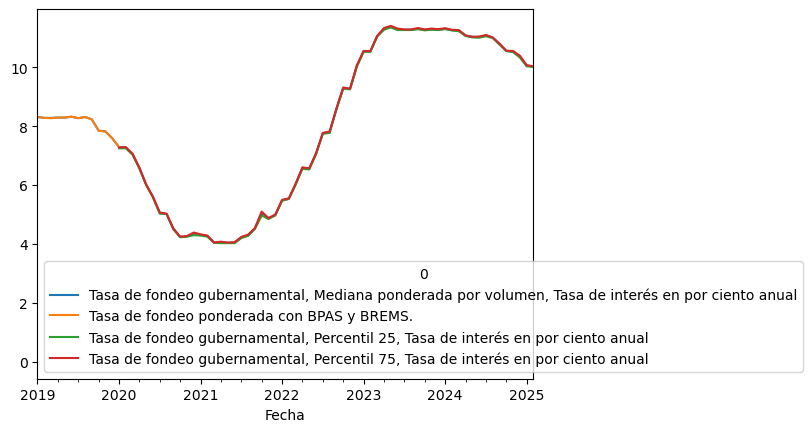

In [42]:
df7.plot()

### DF8

In [43]:
df8.head()

0               Título  \
0  2003-05-16 00:00:00   
1  2003-05-19 00:00:00   
2  2003-05-20 00:00:00   
3  2003-05-21 00:00:00   
4  2003-05-22 00:00:00   

0 Vector de precios de títulos gubernamentales, Cetes 28 días - Plazo  \
0                                                 27                    
1                                                 24                    
2                                                 23                    
3                                                 22                    
4                                                 28                    

0 Vector de precios de títulos gubernamentales, Cetes 28 días - Precio Limpio  \
0                                            9.95665                            
1                                           9.961733                            
2                                           9.965181                            
3                                           9.968039                            
4                                           9.960956                            

0 Vector de precios de títulos gubernamentales, Cetes 28 días - Precio Sucio  \
0                                            9.95665                           
1                                           9.961733                           
2                                           9.965181                           
3                                           9.968039                           
4                                           9.960956                           

0 Vector de precios de títulos gubernamentales, Cetes 28 días - Tasa Rendimiento  \
0                                           5.805165                               
1                                             5.7621                               
2                                           5.468973                               
3                                           5.246751                               
4                                            5.03962                               

0 Vector de precios de títulos gubernamentales, Cetes 91 días - Plazo  \
0                                                 90                    
1                                                 87                    
2                                                 86                    
3                                                 85                    
4                                                 91                    

0 Vector de precios de títulos gubernamentales, Cetes 91 días - Precio Limpio  \
0                                            9.85075                            
1                                           9.848233                            
2                                           9.863117                            
3                                           9.866597                            
4                                           9.859708                            

0 Vector de precios de títulos gubernamentales, Cetes 91 días - Precio Sucio  \
0                                            9.85075                           
1                                           9.848233                           
2                                           9.863117                           
3                                           9.866597                           
4                                           9.859708                           

0 Vector de precios de títulos gubernamentales, Cetes 91 días - Tasa Rendimiento  \
0                                           6.060452                               
1                                           6.376792                               
2                                           5.809508                               
3                                           5.726401                               
4                                           5.628983                               

0 Vector de precios

In [44]:
df8 = clean_df(df8)

df8.head()

0        Vector de precios de títulos gubernamentales, Cetes 28 días - Plazo  \
Fecha                                                                          
2003-05                                               27.0                     
2003-05                                               24.0                     
2003-05                                               23.0                     
2003-05                                               22.0                     
2003-05                                               28.0                     

0        Vector de precios de títulos gubernamentales, Cetes 28 días - Precio Limpio  \
Fecha                                                                                  
2003-05                                           9.956650                             
2003-05                                           9.961733                             
2003-05                                           9.965181                             
2003-05                                           9.968039                             
2003-05                                           9.960956                             

0        Vector de precios de títulos gubernamentales, Cetes 28 días - Precio Sucio  \
Fecha                                                                                 
2003-05                                           9.956650                            
2003-05                                           9.961733                            
2003-05                                           9.965181                            
2003-05                                           9.968039                            
2003-05                                           9.960956                            

0        Vector de precios de títulos gubernamentales, Cetes 28 días - Tasa Rendimiento  \
Fecha                                                                                     
2003-05                                           5.805165                                
2003-05                                           5.762100                                
2003-05                                           5.468973                                
2003-05                                           5.246751                                
2003-05                                           5.039620                                

0        Vector de precios de títulos gubernamentales, Cetes 91 días - Plazo  \
Fecha                                                                          
2003-05                                               90.0                     
2003-05                                               87.0                     
2003-05                                               86.0                     
2003-05                                               85.0                     
2003-05                                               91.0                     

0        Vector de precios de títulos gubernamentales, Cetes 91 días - Precio Limpio  \
Fecha                                                                                  
2003-05                                           9.850750                             
2003-05                                           9.848233                             
2003-05                                           9.863117                             
2003-05                                           9.866597                             
2003-05                                           9.859708                             

0        Vector de precios de títulos gubernamentales, Cetes 91 días - Precio Sucio  \
Fecha                                                                                 
2003-05                                           9.850750                            
2003-05                                           9.848233                            
2003-05                                         

In [45]:
df8 = df8.groupby(df8.index).first()

df8.head()

0        Vector de precios de títulos gubernamentales, Cetes 28 días - Plazo  \
Fecha                                                                          
2003-05                                               27.0                     
2003-06                                               24.0                     
2003-07                                               23.0                     
2003-08                                               27.0                     
2003-09                                               24.0                     

0        Vector de precios de títulos gubernamentales, Cetes 28 días - Precio Limpio  \
Fecha                                                                                  
2003-05                                           9.956650                             
2003-06                                           9.968733                             
2003-07                                           9.972208                             
2003-08                                           9.968800                             
2003-09                                           9.968667                             

0        Vector de precios de títulos gubernamentales, Cetes 28 días - Precio Sucio  \
Fecha                                                                                 
2003-05                                           9.956650                            
2003-06                                           9.968733                            
2003-07                                           9.972208                            
2003-08                                           9.968800                            
2003-09                                           9.968667                            

0        Vector de precios de títulos gubernamentales, Cetes 28 días - Tasa Rendimiento  \
Fecha                                                                                     
2003-05                                           5.805165                                
2003-06                                           4.704760                                
2003-07                                           4.362176                                
2003-08                                           4.173020                                
2003-09                                           4.714723                                

0        Vector de precios de títulos gubernamentales, Cetes 91 días - Plazo  \
Fecha                                                                          
2003-05                                               90.0                     
2003-06                                               87.0                     
2003-07                                               86.0                     
2003-08                                               90.0                     
2003-09                                               87.0                     

0        Vector de precios de títulos gubernamentales, Cetes 91 días - Precio Limpio  \
Fecha                                                                                  
2003-05                                           9.850750                             
2003-06                                           9.878200                             
2003-07                                           9.881033                             
2003-08                                           9.874000                             
2003-09                                           9.876267                             

0        Vector de precios de títulos gubernamentales, Cetes 91 días - Precio Sucio  \
Fecha                                                                                 
2003-05                                           9.850750                            
2003-06                                           9.878200                            
2003-07                                         

In [46]:
df8 = df8.loc["2011-03":]
df8.head()

0        Vector de precios de títulos gubernamentales, Cetes 28 días - Plazo  \
Fecha                                                                          
2011-03                                               23.0                     
2011-04                                               27.0                     
2011-05                                               24.0                     
2011-06                                               22.0                     
2011-07                                               27.0                     

0        Vector de precios de títulos gubernamentales, Cetes 28 días - Precio Limpio  \
Fecha                                                                                  
2011-03                                           9.973039                             
2011-04                                           9.967825                             
2011-05                                           9.971800                             
2011-06                                           9.973233                             
2011-07                                           9.967600                             

0        Vector de precios de títulos gubernamentales, Cetes 28 días - Precio Sucio  \
Fecha                                                                                 
2011-03                                           9.973039                            
2011-04                                           9.967825                            
2011-05                                           9.971800                            
2011-06                                           9.973233                            
2011-07                                           9.967600                            

0        Vector de precios de títulos gubernamentales, Cetes 28 días - Tasa Rendimiento  \
Fecha                                                                                     
2011-03                                           4.231391                                
2011-04                                           4.303848                                
2011-05                                           4.241962                                
2011-06                                           4.391810                                
2011-07                                           4.334042                                

0        Vector de precios de títulos gubernamentales, Cetes 91 días - Plazo  \
Fecha                                                                          
2011-03                                               86.0                     
2011-04                                               90.0                     
2011-05                                               87.0                     
2011-06                                               85.0                     
2011-07                                               90.0                     

0        Vector de precios de títulos gubernamentales, Cetes 91 días - Precio Limpio  \
Fecha                                                                                  
2011-03                                           9.899189                             
2011-04                                           9.890500                             
2011-05                                           9.893667                             
2011-06                                           9.896347                             
2011-07                                           9.892750                             

0        Vector de precios de títulos gubernamentales, Cetes 91 días - Precio Sucio  \
Fecha                                                                                 
2011-03                                           9.899189                            
2011-04                                           9.890500                            
2011-05                                         

In [47]:
# drop columns with NaN values
df8 = df8.dropna(axis=1)
df8.head()

0        Vector de precios de títulos gubernamentales, Cetes 28 días - Plazo  \
Fecha                                                                          
2011-03                                               23.0                     
2011-04                                               27.0                     
2011-05                                               24.0                     
2011-06                                               22.0                     
2011-07                                               27.0                     

0        Vector de precios de títulos gubernamentales, Cetes 28 días - Precio Limpio  \
Fecha                                                                                  
2011-03                                           9.973039                             
2011-04                                           9.967825                             
2011-05                                           9.971800                             
2011-06                                           9.973233                             
2011-07                                           9.967600                             

0        Vector de precios de títulos gubernamentales, Cetes 28 días - Precio Sucio  \
Fecha                                                                                 
2011-03                                           9.973039                            
2011-04                                           9.967825                            
2011-05                                           9.971800                            
2011-06                                           9.973233                            
2011-07                                           9.967600                            

0        Vector de precios de títulos gubernamentales, Cetes 28 días - Tasa Rendimiento  \
Fecha                                                                                     
2011-03                                           4.231391                                
2011-04                                           4.303848                                
2011-05                                           4.241962                                
2011-06                                           4.391810                                
2011-07                                           4.334042                                

0        Vector de precios de títulos gubernamentales, Cetes 91 días - Plazo  \
Fecha                                                                          
2011-03                                               86.0                     
2011-04                                               90.0                     
2011-05                                               87.0                     
2011-06                                               85.0                     
2011-07                                               90.0                     

0        Vector de precios de títulos gubernamentales, Cetes 91 días - Precio Limpio  \
Fecha                                                                                  
2011-03                                           9.899189                             
2011-04                                           9.890500                             
2011-05                                           9.893667                             
2011-06                                           9.896347                             
2011-07                                           9.892750                             

0        Vector de precios de títulos gubernamentales, Cetes 91 días - Precio Sucio  \
Fecha                                                                                 
2011-03                                           9.899189                            
2011-04                                           9.890500                            
2011-05                                         

### DF9

In [48]:
df9.head()

0               Título  \
0  1988-01-01 00:00:00   
1  1988-01-16 00:00:00   
2  1988-02-01 00:00:00   
3  1988-02-16 00:00:00   
4  1988-03-01 00:00:00   

0 Índice de precios al consumidor, por objeto del gasto, Nacional, Índice general  \
0                                            4.63698                                
1                                           4.799512                                
2                                           5.041704                                
3                                           5.181865                                
4                                           5.332375                                

0 Subíndices subyacente y complementarios, Precios al consumidor (INPC), Subyacente  \
0                                           4.986074                                  
1                                           5.185715                                  
2                                           5.517372                                  
3                                             5.7114                                  
4                                           5.910858                                  

0 Índice de precios al consumidor, por objeto del gasto, Nacional, Índice general  \
0                                            4.63698                                
1                                           4.799512                                
2                                           5.041704                                
3                                           5.181865                                
4                                           5.332375                                

0 Subíndices subyacente y complementarios, Precios al consumidor (INPC), Subyacente  \
0                                           4.986074                                  
1                                           5.185715                                  
2                                           5.517372                                  
3                                             5.7114                                  
4                                           5.910858                                  

0 Subíndices subyacente y complementarios, Precios al consumidor (INPC), Subyacente, Mercancías  \
0                                           5.830807                                              
1                                           6.110194                                              
2                                           6.561276                                              
3                                           6.771719                                              
4                                           7.008879                                              

0 Subíndices subyacente y complementarios, Precios al consumidor (INPC), Subyacente, Mercancías, Alimentos, Bebidas y Tabaco  \
0                                           3.947648                                                                           
1                                           4.199038                                                                           
2                                           4.461064                                                                           
3                                           4.583355                                                                           
4                                           4.699212                                                                           

0 Subíndices subyacente y complementarios, Precios al consumidor (INPC), Subyacente, Mercancías, Mercancías no Alimenticias  \
0                                            7.96253                                                                          
1                                           8.248156                                                                          
2                             

In [49]:
df9 = clean_df(df9)

df9.head()

0        Índice de precios al consumidor, por objeto del gasto, Nacional, Índice general  \
Fecha                                                                                      
1988-01                                           4.636980                                 
1988-01                                           4.799512                                 
1988-02                                           5.041704                                 
1988-02                                           5.181865                                 
1988-03                                           5.332375                                 

0        Subíndices subyacente y complementarios, Precios al consumidor (INPC), Subyacente  \
Fecha                                                                                        
1988-01                                           4.986074                                   
1988-01                                           5.185715                                   
1988-02                                           5.517372                                   
1988-02                                           5.711400                                   
1988-03                                           5.910858                                   

0        Índice de precios al consumidor, por objeto del gasto, Nacional, Índice general  \
Fecha                                                                                      
1988-01                                           4.636980                                 
1988-01                                           4.799512                                 
1988-02                                           5.041704                                 
1988-02                                           5.181865                                 
1988-03                                           5.332375                                 

0        Subíndices subyacente y complementarios, Precios al consumidor (INPC), Subyacente  \
Fecha                                                                                        
1988-01                                           4.986074                                   
1988-01                                           5.185715                                   
1988-02                                           5.517372                                   
1988-02                                           5.711400                                   
1988-03                                           5.910858                                   

0        Subíndices subyacente y complementarios, Precios al consumidor (INPC), Subyacente, Mercancías  \
Fecha                                                                                                    
1988-01                                           5.830807                                               
1988-01                                           6.110194                                               
1988-02                                           6.561276                                               
1988-02                                           6.771719                                               
1988-03                                           7.008879                                               

0        Subíndices subyacente y complementarios, Precios al consumidor (INPC), Subyacente, Mercancías, Alimentos, Bebidas y Tabaco  \
Fecha                                                                                                                                 
1988-01                                           3.947648                                                                            
1988-01                                           4.199038                                                                            
1988-02                                           4.461064                                                   

In [50]:
df9 = df9.groupby(df9.index).first()

df9.head()

0        Índice de precios al consumidor, por objeto del gasto, Nacional, Índice general  \
Fecha                                                                                      
1988-01                                           4.636980                                 
1988-02                                           5.041704                                 
1988-03                                           5.332375                                 
1988-04                                           5.526643                                 
1988-05                                           5.615513                                 

0        Subíndices subyacente y complementarios, Precios al consumidor (INPC), Subyacente  \
Fecha                                                                                        
1988-01                                           4.986074                                   
1988-02                                           5.517372                                   
1988-03                                           5.910858                                   
1988-04                                           6.101765                                   
1988-05                                           6.221396                                   

0        Índice de precios al consumidor, por objeto del gasto, Nacional, Índice general  \
Fecha                                                                                      
1988-01                                           4.636980                                 
1988-02                                           5.041704                                 
1988-03                                           5.332375                                 
1988-04                                           5.526643                                 
1988-05                                           5.615513                                 

0        Subíndices subyacente y complementarios, Precios al consumidor (INPC), Subyacente  \
Fecha                                                                                        
1988-01                                           4.986074                                   
1988-02                                           5.517372                                   
1988-03                                           5.910858                                   
1988-04                                           6.101765                                   
1988-05                                           6.221396                                   

0        Subíndices subyacente y complementarios, Precios al consumidor (INPC), Subyacente, Mercancías  \
Fecha                                                                                                    
1988-01                                           5.830807                                               
1988-02                                           6.561276                                               
1988-03                                           7.008879                                               
1988-04                                           7.183638                                               
1988-05                                           7.262867                                               

0        Subíndices subyacente y complementarios, Precios al consumidor (INPC), Subyacente, Mercancías, Alimentos, Bebidas y Tabaco  \
Fecha                                                                                                                                 
1988-01                                           3.947648                                                                            
1988-02                                           4.461064                                                                            
1988-03                                           4.699212                                                   

In [51]:
df9 = df9.loc["2011-03":]
df9.head()

0        Índice de precios al consumidor, por objeto del gasto, Nacional, Índice general  \
Fecha                                                                                      
2011-03                                          75.702416                                 
2011-04                                          75.675371                                 
2011-05                                          75.192319                                 
2011-06                                          75.084140                                 
2011-07                                          75.463519                                 

0        Subíndices subyacente y complementarios, Precios al consumidor (INPC), Subyacente  \
Fecha                                                                                        
2011-03                                          79.061274                                   
2011-04                                          79.097886                                   
2011-05                                          79.196316                                   
2011-06                                          79.355358                                   
2011-07                                          79.584594                                   

0        Índice de precios al consumidor, por objeto del gasto, Nacional, Índice general  \
Fecha                                                                                      
2011-03                                          75.702416                                 
2011-04                                          75.675371                                 
2011-05                                          75.192319                                 
2011-06                                          75.084140                                 
2011-07                                          75.463519                                 

0        Subíndices subyacente y complementarios, Precios al consumidor (INPC), Subyacente  \
Fecha                                                                                        
2011-03                                          79.061274                                   
2011-04                                          79.097886                                   
2011-05                                          79.196316                                   
2011-06                                          79.355358                                   
2011-07                                          79.584594                                   

0        Subíndices subyacente y complementarios, Precios al consumidor (INPC), Subyacente, Mercancías  \
Fecha                                                                                                    
2011-03                                          75.604402                                               
2011-04                                          75.905865                                               
2011-05                                          76.084351                                               
2011-06                                          76.251501                                               
2011-07                                          76.416195                                               

0        Subíndices subyacente y complementarios, Precios al consumidor (INPC), Subyacente, Mercancías, Alimentos, Bebidas y Tabaco  \
Fecha                                                                                                                                 
2011-03                                          70.937541                                                                            
2011-04                                          71.378041                                                                            
2011-05                                          71.748057                                                   

### DF10

In [52]:
df10.head() # la inflacion quincenal no nos va a servir

0               Título  \
0  2022-01-01 00:00:00   
1  2022-01-16 00:00:00   
2  2022-02-01 00:00:00   
3  2022-02-16 00:00:00   
4  2022-03-01 00:00:00   

0 Índice Nacional de Precios al consumidor, variación anual  \
0                                               7.13          
1                                               7.01          
2                                               7.22          
3                                               7.34          
4                                               7.29          

0 Inflación, Subyacente (nueva definición), Anual  
0                                            6.11  
1                                             6.3  
2                                            6.52  
3                                            6.67  
4                                            6.68

### DF11

In [53]:
df11.head()

0               Título TIIE a 182 días  \
0  2008-01-02 00:00:00             N/E   
1  2008-01-03 00:00:00             N/E   
2  2008-01-04 00:00:00             N/E   
3  2008-01-07 00:00:00             N/E   
4  2008-01-08 00:00:00             N/E   

0 TIIE de Fondeo a Un Día Hábil Bancario, Mediana ponderada por volumen  \
0                                               7.53                      
1                                               7.53                      
2                                               7.53                      
3                                               7.52                      
4                                               7.51                      

0 Tasa de fondeo bancario, Mediana ponderada por volumen, Tasa de interés en por ciento anual  \
0                                               7.51                                            
1                                               7.51                                            
2                                               7.51                                            
3                                               7.51                                            
4                                                7.5                                            

0 Tasa de fondeo gubernamental, Mediana ponderada por volumen, Tasa de interés en por ciento anual  \
0                                               7.46                                                 
1                                               7.45                                                 
2                                               7.43                                                 
3                                               7.43                                                 
4                                               7.41                                                 

0 TIIE a 28 días, Tasa de interés en por ciento anual  \
0                                               7.93    
1                                             7.9362    
2                                             7.9312    
3                                             7.9275    
4                                             7.9262    

0 Tasas de interés interbancarias Por ciento anual, TIIE a 91 días  \
0                                                N/E                 
1                                               8.01                 
2                                                N/E                 
3                                                N/E                 
4                                                N/E                 

0 Tasa objetivo  
0           N/E  
1           N/E  
2           N/E  
3           N/E  
4           N/E

In [54]:
df11 = clean_df(df11)

df11.head()

0        TIIE a 182 días  \
Fecha                      
2008-01              NaN   
2008-01              NaN   
2008-01              NaN   
2008-01              NaN   
2008-01              NaN   

0        TIIE de Fondeo a Un Día Hábil Bancario, Mediana ponderada por volumen  \
Fecha                                                                            
2008-01                                               7.53                       
2008-01                                               7.53                       
2008-01                                               7.53                       
2008-01                                               7.52                       
2008-01                                               7.51                       

0        Tasa de fondeo bancario, Mediana ponderada por volumen, Tasa de interés en por ciento anual  \
Fecha                                                                                                  
2008-01                                               7.51                                             
2008-01                                               7.51                                             
2008-01                                               7.51                                             
2008-01                                               7.51                                             
2008-01                                               7.50                                             

0        Tasa de fondeo gubernamental, Mediana ponderada por volumen, Tasa de interés en por ciento anual  \
Fecha                                                                                                       
2008-01                                               7.46                                                  
2008-01                                               7.45                                                  
2008-01                                               7.43                                                  
2008-01                                               7.43                                                  
2008-01                                               7.41                                                  

0        TIIE a 28 días, Tasa de interés en por ciento anual  \
Fecha                                                          
2008-01                                             7.9300     
2008-01                                             7.9362     
2008-01                                             7.9312     
2008-01                                             7.9275     
2008-01                                             7.9262     

0        Tasas de interés interbancarias Por ciento anual, TIIE a 91 días  \
Fecha                                                                       
2008-01                                                NaN                  
2008-01                                               8.01                  
2008-01                                                NaN                  
2008-01                                                NaN                  
2008-01                                                NaN                  

0        Tasa objetivo  
Fecha                   
2008-01            NaN  
2008-01            NaN  
2008-01            NaN  
2008-01            NaN  
2008-01            NaN

In [55]:
df11 = df11.groupby(df11.index).first() 

df11.head()

0        TIIE a 182 días  \
Fecha                      
2008-01              NaN   
2008-02              NaN   
2008-03              NaN   
2008-04              NaN   
2008-05              NaN   

0        TIIE de Fondeo a Un Día Hábil Bancario, Mediana ponderada por volumen  \
Fecha                                                                            
2008-01                                               7.53                       
2008-02                                               7.52                       
2008-03                                               7.50                       
2008-04                                               7.48                       
2008-05                                               7.49                       

0        Tasa de fondeo bancario, Mediana ponderada por volumen, Tasa de interés en por ciento anual  \
Fecha                                                                                                  
2008-01                                               7.51                                             
2008-02                                               7.51                                             
2008-03                                               7.50                                             
2008-04                                               7.49                                             
2008-05                                               7.51                                             

0        Tasa de fondeo gubernamental, Mediana ponderada por volumen, Tasa de interés en por ciento anual  \
Fecha                                                                                                       
2008-01                                               7.46                                                  
2008-02                                               7.43                                                  
2008-03                                               7.41                                                  
2008-04                                               7.36                                                  
2008-05                                               7.35                                                  

0        TIIE a 28 días, Tasa de interés en por ciento anual  \
Fecha                                                          
2008-01                                             7.9300     
2008-02                                             7.9163     
2008-03                                             7.9250     
2008-04                                             7.9425     
2008-05                                             7.9300     

0        Tasas de interés interbancarias Por ciento anual, TIIE a 91 días  \
Fecha                                                                       
2008-01                                             8.0100                  
2008-02                                             7.9475                  
2008-03                                             7.9325                  
2008-04                                             7.9550                  
2008-05                                             7.9750                  

0        Tasa objetivo  
Fecha                   
2008-01            7.5  
2008-02            7.5  
2008-03            7.5  
2008-04            7.5  
2008-05            7.5

In [56]:
df11 = df11.iloc[:, [1, 2, 3, 4, 5, 6]]

<Axes: xlabel='Fecha'>

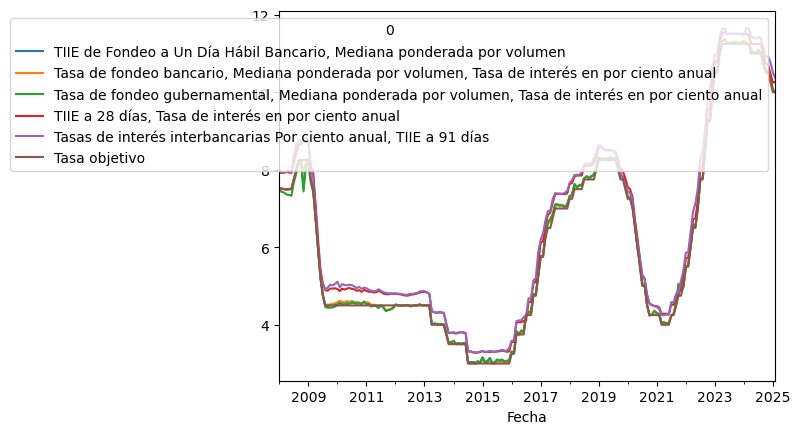

In [57]:
df11.plot()

In [58]:
df11 = df11.loc["2011-03":]
df11.head()

0        TIIE de Fondeo a Un Día Hábil Bancario, Mediana ponderada por volumen  \
Fecha                                                                            
2011-03                                               4.48                       
2011-04                                               4.50                       
2011-05                                               4.50                       
2011-06                                               4.45                       
2011-07                                               4.51                       

0        Tasa de fondeo bancario, Mediana ponderada por volumen, Tasa de interés en por ciento anual  \
Fecha                                                                                                  
2011-03                                               4.51                                             
2011-04                                               4.52                                             
2011-05                                               4.51                                             
2011-06                                               4.46                                             
2011-07                                               4.51                                             

0        Tasa de fondeo gubernamental, Mediana ponderada por volumen, Tasa de interés en por ciento anual  \
Fecha                                                                                                       
2011-03                                               4.47                                                  
2011-04                                               4.49                                                  
2011-05                                               4.48                                                  
2011-06                                               4.43                                                  
2011-07                                               4.50                                                  

0        TIIE a 28 días, Tasa de interés en por ciento anual  \
Fecha                                                          
2011-03                                             4.8550     
2011-04                                             4.8331     
2011-05                                             4.8400     
2011-06                                             4.8725     
2011-07                                             4.8500     

0        Tasas de interés interbancarias Por ciento anual, TIIE a 91 días  \
Fecha                                                                       
2011-03                                              4.880                  
2011-04                                              4.862                  
2011-05                                              4.875                  
2011-06                                              4.915                  
2011-07                                              4.880                  

0        Tasa objetivo  
Fecha                   
2011-03            4.5  
2011-04            4.5  
2011-05            4.5  
2011-06            4.5  
2011-07            4.5

### DF12

In [59]:
df12.head()

0               Título  \
0  1969-01-01 00:00:00   
1  1969-02-01 00:00:00   
2  1969-03-01 00:00:00   
3  1969-04-01 00:00:00   
4  1969-05-01 00:00:00   

0 Índice Nacional de Precios al consumidor, Variación mensual  \
0                                                N/E            
1                                               0.36            
2                                                0.1            
3                                               0.27            
4                                                  0            

0 Índice Nacional de Precios al consumidor, Variación acumulada  \
0                                                N/E              
1                                                N/E              
2                                                N/E              
3                                                N/E              
4                                                N/E              

0 Índice Nacional de Precios al consumidor, variación anual  \
0                                                N/E          
1                                                N/E          
2                                                N/E          
3                                                N/E          
4                                                N/E          

0 Inflación, Subyacente (nueva definición), Mensual  \
0                                               N/E   
1                                               N/E   
2                                               N/E   
3                                               N/E   
4                                               N/E   

0 Inflación, Subyacente (nueva definición), Acumulada en el año  \
0                                                N/E              
1                                                N/E              
2                                                N/E              
3                                                N/E              
4                                                N/E              

0 Inflación, Subyacente (nueva definición), Anual  \
0                                             N/E   
1                                             N/E   
2                                             N/E   
3                                             N/E   
4                                             N/E   

0 Inflación, No subyacente (nueva definición), Mensual  \
0                                                N/E     
1                                                N/E     
2                                                N/E     
3                                                N/E     
4                                                N/E     

0 Inflación, No subyacente (nueva definición), Acumulada en el año  \
0                                                N/E                 
1                                                N/E                 
2                                                N/E                 
3                                                N/E                 
4                                                N/E                 

0 Inflación, No subyacente (nueva definición), Anual  
0                                                N/E  
1                                                N/E  
2                                                N/E  
3                                                N/E  
4                                                N/E

In [60]:
df12 = clean_df(df12)

df12.head()

0        Índice Nacional de Precios al consumidor, Variación mensual  \
Fecha                                                                  
1969-01                                                NaN             
1969-02                                               0.36             
1969-03                                               0.10             
1969-04                                               0.27             
1969-05                                               0.00             

0        Índice Nacional de Precios al consumidor, Variación acumulada  \
Fecha                                                                    
1969-01                                                NaN               
1969-02                                                NaN               
1969-03                                                NaN               
1969-04                                                NaN               
1969-05                                                NaN               

0        Índice Nacional de Precios al consumidor, variación anual  \
Fecha                                                                
1969-01                                                NaN           
1969-02                                                NaN           
1969-03                                                NaN           
1969-04                                                NaN           
1969-05                                                NaN           

0        Inflación, Subyacente (nueva definición), Mensual  \
Fecha                                                        
1969-01                                                NaN   
1969-02                                                NaN   
1969-03                                                NaN   
1969-04                                                NaN   
1969-05                                                NaN   

0        Inflación, Subyacente (nueva definición), Acumulada en el año  \
Fecha                                                                    
1969-01                                                NaN               
1969-02                                                NaN               
1969-03                                                NaN               
1969-04                                                NaN               
1969-05                                                NaN               

0        Inflación, Subyacente (nueva definición), Anual  \
Fecha                                                      
1969-01                                              NaN   
1969-02                                              NaN   
1969-03                                              NaN   
1969-04                                              NaN   
1969-05                                              NaN   

0        Inflación, No subyacente (nueva definición), Mensual  \
Fecha                                                           
1969-01                                                NaN      
1969-02                                                NaN      
1969-03                                                NaN      
1969-04                                                NaN      
1969-05                                                NaN      

0        Inflación, No subyacente (nueva definición), Acumulada en el año  \
Fecha                                                                       
1969-01                                                NaN                  
1969-02                                                NaN                  
1969-03                                                NaN                  
1969-04                                                NaN                  
1969-05                                                NaN                  

0        Inflación, No subyacente (nueva definición), Anual  
Fecha                                               

<Axes: xlabel='Fecha'>

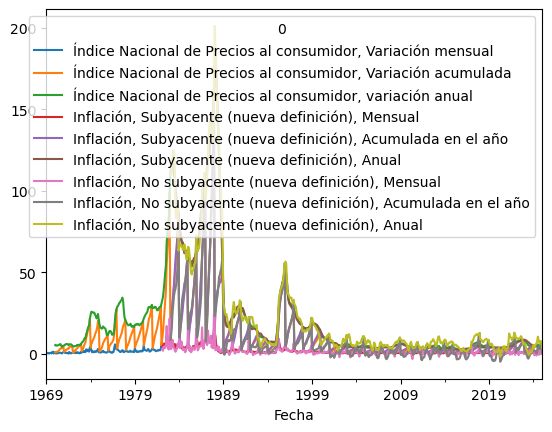

In [61]:
df12.plot()

In [62]:
df12 = df12.loc["2011-03":]
df12.head()

0        Índice Nacional de Precios al consumidor, Variación mensual  \
Fecha                                                                  
2011-03                                               0.19             
2011-04                                              -0.01             
2011-05                                              -0.74             
2011-06                                               0.00             
2011-07                                               0.48             

0        Índice Nacional de Precios al consumidor, Variación acumulada  \
Fecha                                                                    
2011-03                                               1.06               
2011-04                                               1.05               
2011-05                                               0.30               
2011-06                                               0.30               
2011-07                                               0.78               

0        Índice Nacional de Precios al consumidor, variación anual  \
Fecha                                                                
2011-03                                               3.04           
2011-04                                               3.36           
2011-05                                               3.25           
2011-06                                               3.28           
2011-07                                               3.55           

0        Inflación, Subyacente (nueva definición), Mensual  \
Fecha                                                        
2011-03                                               0.30   
2011-04                                               0.08   
2011-05                                               0.18   
2011-06                                               0.19   
2011-07                                               0.22   

0        Inflación, Subyacente (nueva definición), Acumulada en el año  \
Fecha                                                                    
2011-03                                               1.16               
2011-04                                               1.24               
2011-05                                               1.42               
2011-06                                               1.62               
2011-07                                               1.84               

0        Inflación, Subyacente (nueva definición), Anual  \
Fecha                                                      
2011-03                                             3.21   
2011-04                                             3.18   
2011-05                                             3.12   
2011-06                                             3.18   
2011-07                                             3.19   

0        Inflación, No subyacente (nueva definición), Mensual  \
Fecha                                                           
2011-03                                              -0.16      
2011-04                                              -0.28      
2011-05                                              -3.80      
2011-06                                              -0.70      
2011-07                                               1.38      

0        Inflación, No subyacente (nueva definición), Acumulada en el año  \
Fecha                                                                       
2011-03                                               0.69                  
2011-04                                               0.40                  
2011-05                                              -3.42                  
2011-06                                              -4.09                  
2011-07                                              -2.77                  

0        Inflación, No subyacente (nueva definición), Anual  
Fecha                                               

## Ya juntar los datos

In [63]:
df = pd.concat([df1, df2, df3, df4, df5, df6, df8, df9, df11, df12], axis=1)
df.head()

0        TIIE de Fondeo a Un Día Hábil Bancario, Mediana ponderada por volumen  \
2011-03                                               4.48                       
2011-04                                               4.50                       
2011-05                                               4.50                       
2011-06                                               4.45                       
2011-07                                               4.51                       

0        TIIE a 28 días, Tasa de interés en por ciento anual  \
2011-03                                             4.8550     
2011-04                                             4.8331     
2011-05                                             4.8400     
2011-06                                             4.8725     
2011-07                                             4.8500     

0        Tasas de interés interbancarias Por ciento anual, TIIE a 91 días  \
2011-03                                              4.880                  
2011-04                                              4.862                  
2011-05                                              4.875                  
2011-06                                              4.915                  
2011-07                                              4.880                  

0        Sistemas de pago de bajo valor, Tarjetas de crédito, Tarjetas vigentes al cierre del trimestre (todas las marcas)  \
2011-03                                       2.297680e+07                                                                   
2011-04                                       2.324182e+07                                                                   
2011-05                                       2.351398e+07                                                                   
2011-06                                       2.378613e+07                                                                   
2011-07                                       2.405829e+07                                                                   

0        Sistemas de pago de bajo valor, Tarjetas de crédito (todas las marcas), B  \
2011-03                                            15185.0                           
2011-04                                            15638.0                           
2011-05                                            15552.0                           
2011-06                                            15466.0                           
2011-07                                            15380.0                           

0        Sistemas de pago de bajo valor, Tarjetas de crédito (todas las marcas), C  \
2011-03                                       5.751683e+06                           
2011-04                                       5.804978e+06                           
2011-05                                       5.944675e+06                           
2011-06                                       6.084373e+06                           
2011-07                                       6.224070e+06                           

0        Sistemas de pago de bajo valor, Tarjetas de crédito (todas las marcas), D  \
2011-03                                       8.118886e+06                           
2011-04                                       8.242474e+06                           
2011-05                                       8.231955e+06                           
2011-06                                       8.221437e+06                           
2011-07                                       8.210918e+06                           

0        Sistemas de pago de bajo valor, Tarjetas de crédito (todas las marcas), E  \
2011-03                                       2.889781e+06                           
2011-04                                       2.931260e+06                           
2011-05                                       2.971291e+06                           
2011-06

In [64]:
# guardamos el dataframe en un archivo csv
df.to_csv("Datos\\datos.csv")

# Gráficas Bonitas

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns # instalas seaborn dende conda forge

In [66]:
def plot_fig(df1, title, legend=True):
    plt.figure(figsize=(12, 6), dpi=300)
    palette = sns.color_palette("Paired")
    for i, col in enumerate(df1.columns):
        plt.plot(df1.index.to_timestamp(), df1[col], label=col, linewidth=1.5, color=palette[i % len(palette)])
    plt.title(title, fontsize=14, fontweight='bold')
    if legend:
        plt.legend(fontsize=8)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.savefig(f"Datos\\SVG\\{title}.svg")  # tiene que ir arriva del show !!!!!!!!!!!!!! me encanta svg, odio png
    plt.show() 

In [67]:
df1.columns

Index(['TIIE de Fondeo a Un Día Hábil Bancario, Mediana ponderada por volumen',
       'TIIE a 28 días, Tasa de interés en por ciento anual',
       'Tasas de interés interbancarias Por ciento anual, TIIE a 91 días'],
      dtype='object', name=0)

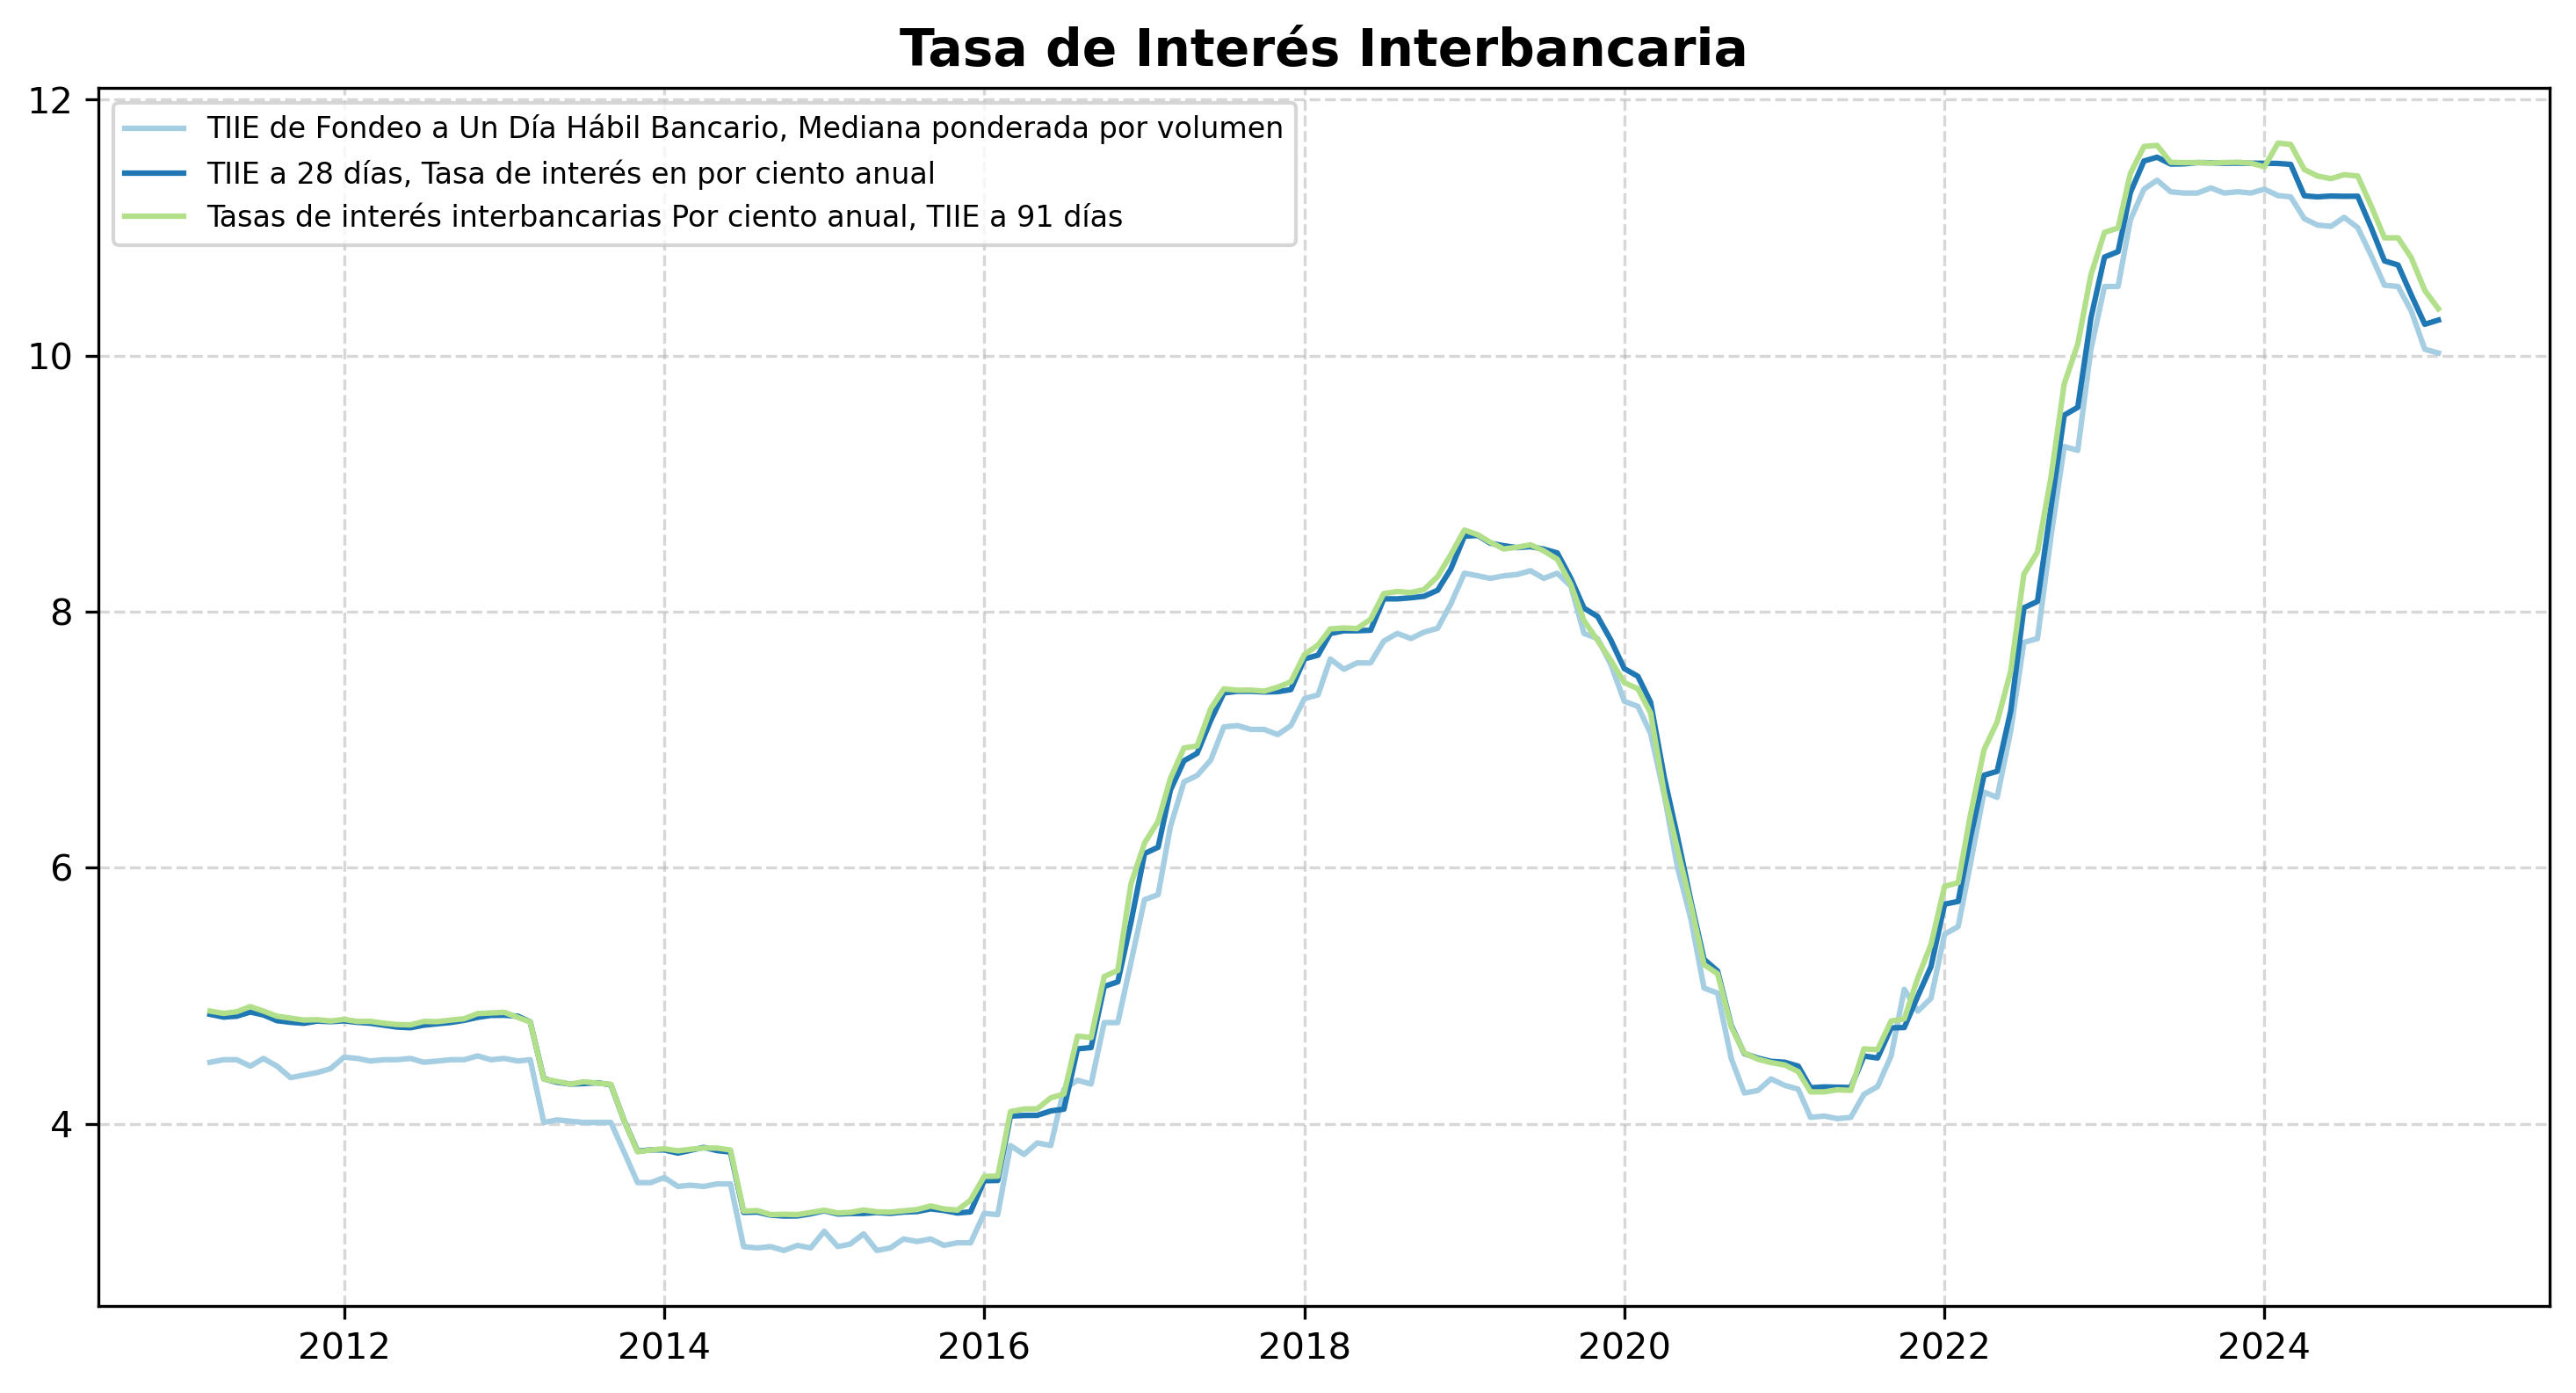

In [68]:
plot_fig(df1, "Tasa de Interés Interbancaria")

In [69]:
df2.columns

Index(['Sistemas de pago de bajo valor, Tarjetas de crédito, Tarjetas vigentes al cierre del trimestre (todas las marcas)',
       'Sistemas de pago de bajo valor, Tarjetas de crédito (todas las marcas), B',
       'Sistemas de pago de bajo valor, Tarjetas de crédito (todas las marcas), C',
       'Sistemas de pago de bajo valor, Tarjetas de crédito (todas las marcas), D',
       'Sistemas de pago de bajo valor, Tarjetas de crédito (todas las marcas), E',
       'Sistemas de pago de bajo valor, Tarjetas de crédito (todas las marcas), F',
       'Sistemas de pago de bajo valor, Tarjetas de crédito (todas las marcas), G',
       'Sistemas de pago de bajo valor, Tarjetas de crédito (todas las marcas), H',
       'Sistemas de pago de bajo valor, Tarjetas de crédito (todas las marcas), I',
       'Sistemas de pago de bajo valor, Tarjetas de crédito (todas las marcas), J',
       'Sistemas de pago de bajo valor, Tarjetas de crédito (todas las marcas), K',
       'Sistemas de pago de bajo val

In [70]:
df2.columns = df2.columns.str.replace("Sistemas de pago de bajo valor, Tarjetas de crédito", "")
df2.columns = df2.columns.str.replace(", ", " ")
df2.head()

0        Tarjetas vigentes al cierre del trimestre (todas las marcas)  \
2011-03                                       2.297680e+07              
2011-04                                       2.324182e+07              
2011-05                                       2.351398e+07              
2011-06                                       2.378613e+07              
2011-07                                       2.405829e+07              

0        (todas las marcas) B  (todas las marcas) C  (todas las marcas) D  \
2011-03               15185.0          5.751683e+06          8.118886e+06   
2011-04               15638.0          5.804978e+06          8.242474e+06   
2011-05               15552.0          5.944675e+06          8.231955e+06   
2011-06               15466.0          6.084373e+06          8.221437e+06   
2011-07               15380.0          6.224070e+06          8.210918e+06   

0        (todas las marcas) E  (todas las marcas) F  (todas las marcas) G  \
2011-03          2.889781e+06          1.098820e+06          16794.666667   
2011-04          2.931260e+06          1.109787e+06          17015.000000   
2011-05          2.971291e+06          1.130715e+06          17213.333333   
2011-06          3.011323e+06          1.151642e+06          17411.666667   
2011-07          3.051354e+06          1.172570e+06          17610.000000   

0        (todas las marcas) H  (todas las marcas) I  (todas las marcas) J  \
2011-03         194397.333333         380647.666667           1116.666667   
2011-04         198979.000000         377131.000000           1141.000000   
2011-05         205417.000000         374121.333333           1168.666667   
2011-06         211855.000000         371111.666667           1196.333333   
2011-07         218293.000000         368102.000000           1224.000000   

0        (todas las marcas) K  (todas las marcas) L  (todas las marcas) M  \
2011-03         414428.333333               20865.0          84184.666667   
2011-04         411134.000000               21142.0          81548.000000   
2011-05         420939.000000               21565.0          79262.333333   
2011-06         430744.000000               21988.0          76976.666667   
2011-07         440549.000000               22411.0          74691.000000   

0        (todas las marcas) N  (todas las marcas) O  (todas las marcas) P  \
2011-03          25083.000000          1.841071e+06         702732.333333   
2011-04          24560.000000          1.852871e+06         700973.000000   
2011-05          23558.333333          1.875477e+06         706586.000000   
2011-06          22556.666667          1.898083e+06         712199.000000   
2011-07          21555.000000          1.920689e+06         717812.000000   

0        (todas las marcas) Q  (todas las marcas) R  (todas las marcas) S  \
2011-03           4031.666667                   0.0          31678.666667   
2011-04           4003.000000                   0.0          30103.000000   
2011-05           3953.333333                   0.0          28768.000000   
2011-06           3903.666667                   0.0          27433.000000   
2011-07           3854.000000                   0.0          26098.000000   

0        (todas las marcas) T  (todas las marcas) U  (todas las marcas) V  \
2011-03                   0.0          1.313406e+06          72009.666667   
2011-04                   0.0          1.341344e+06          75736.000000   
2011-05                   0.0          1.387796e+06          73961.000000   
2011-06                   0.0          1.434249e+06          72186.000000   
2011-07                   0.0          1.480701e+06          70411.000000   

0        (todas las marcas) W  (todas las marcas) X  (todas las marcas) Y  \
2011-03                   0.0                   0.0                   0.0   
2011-04                   0.0                   0.0                   0.0   
2011-05                   0.0                   0.0                   0.0   
2011-06     

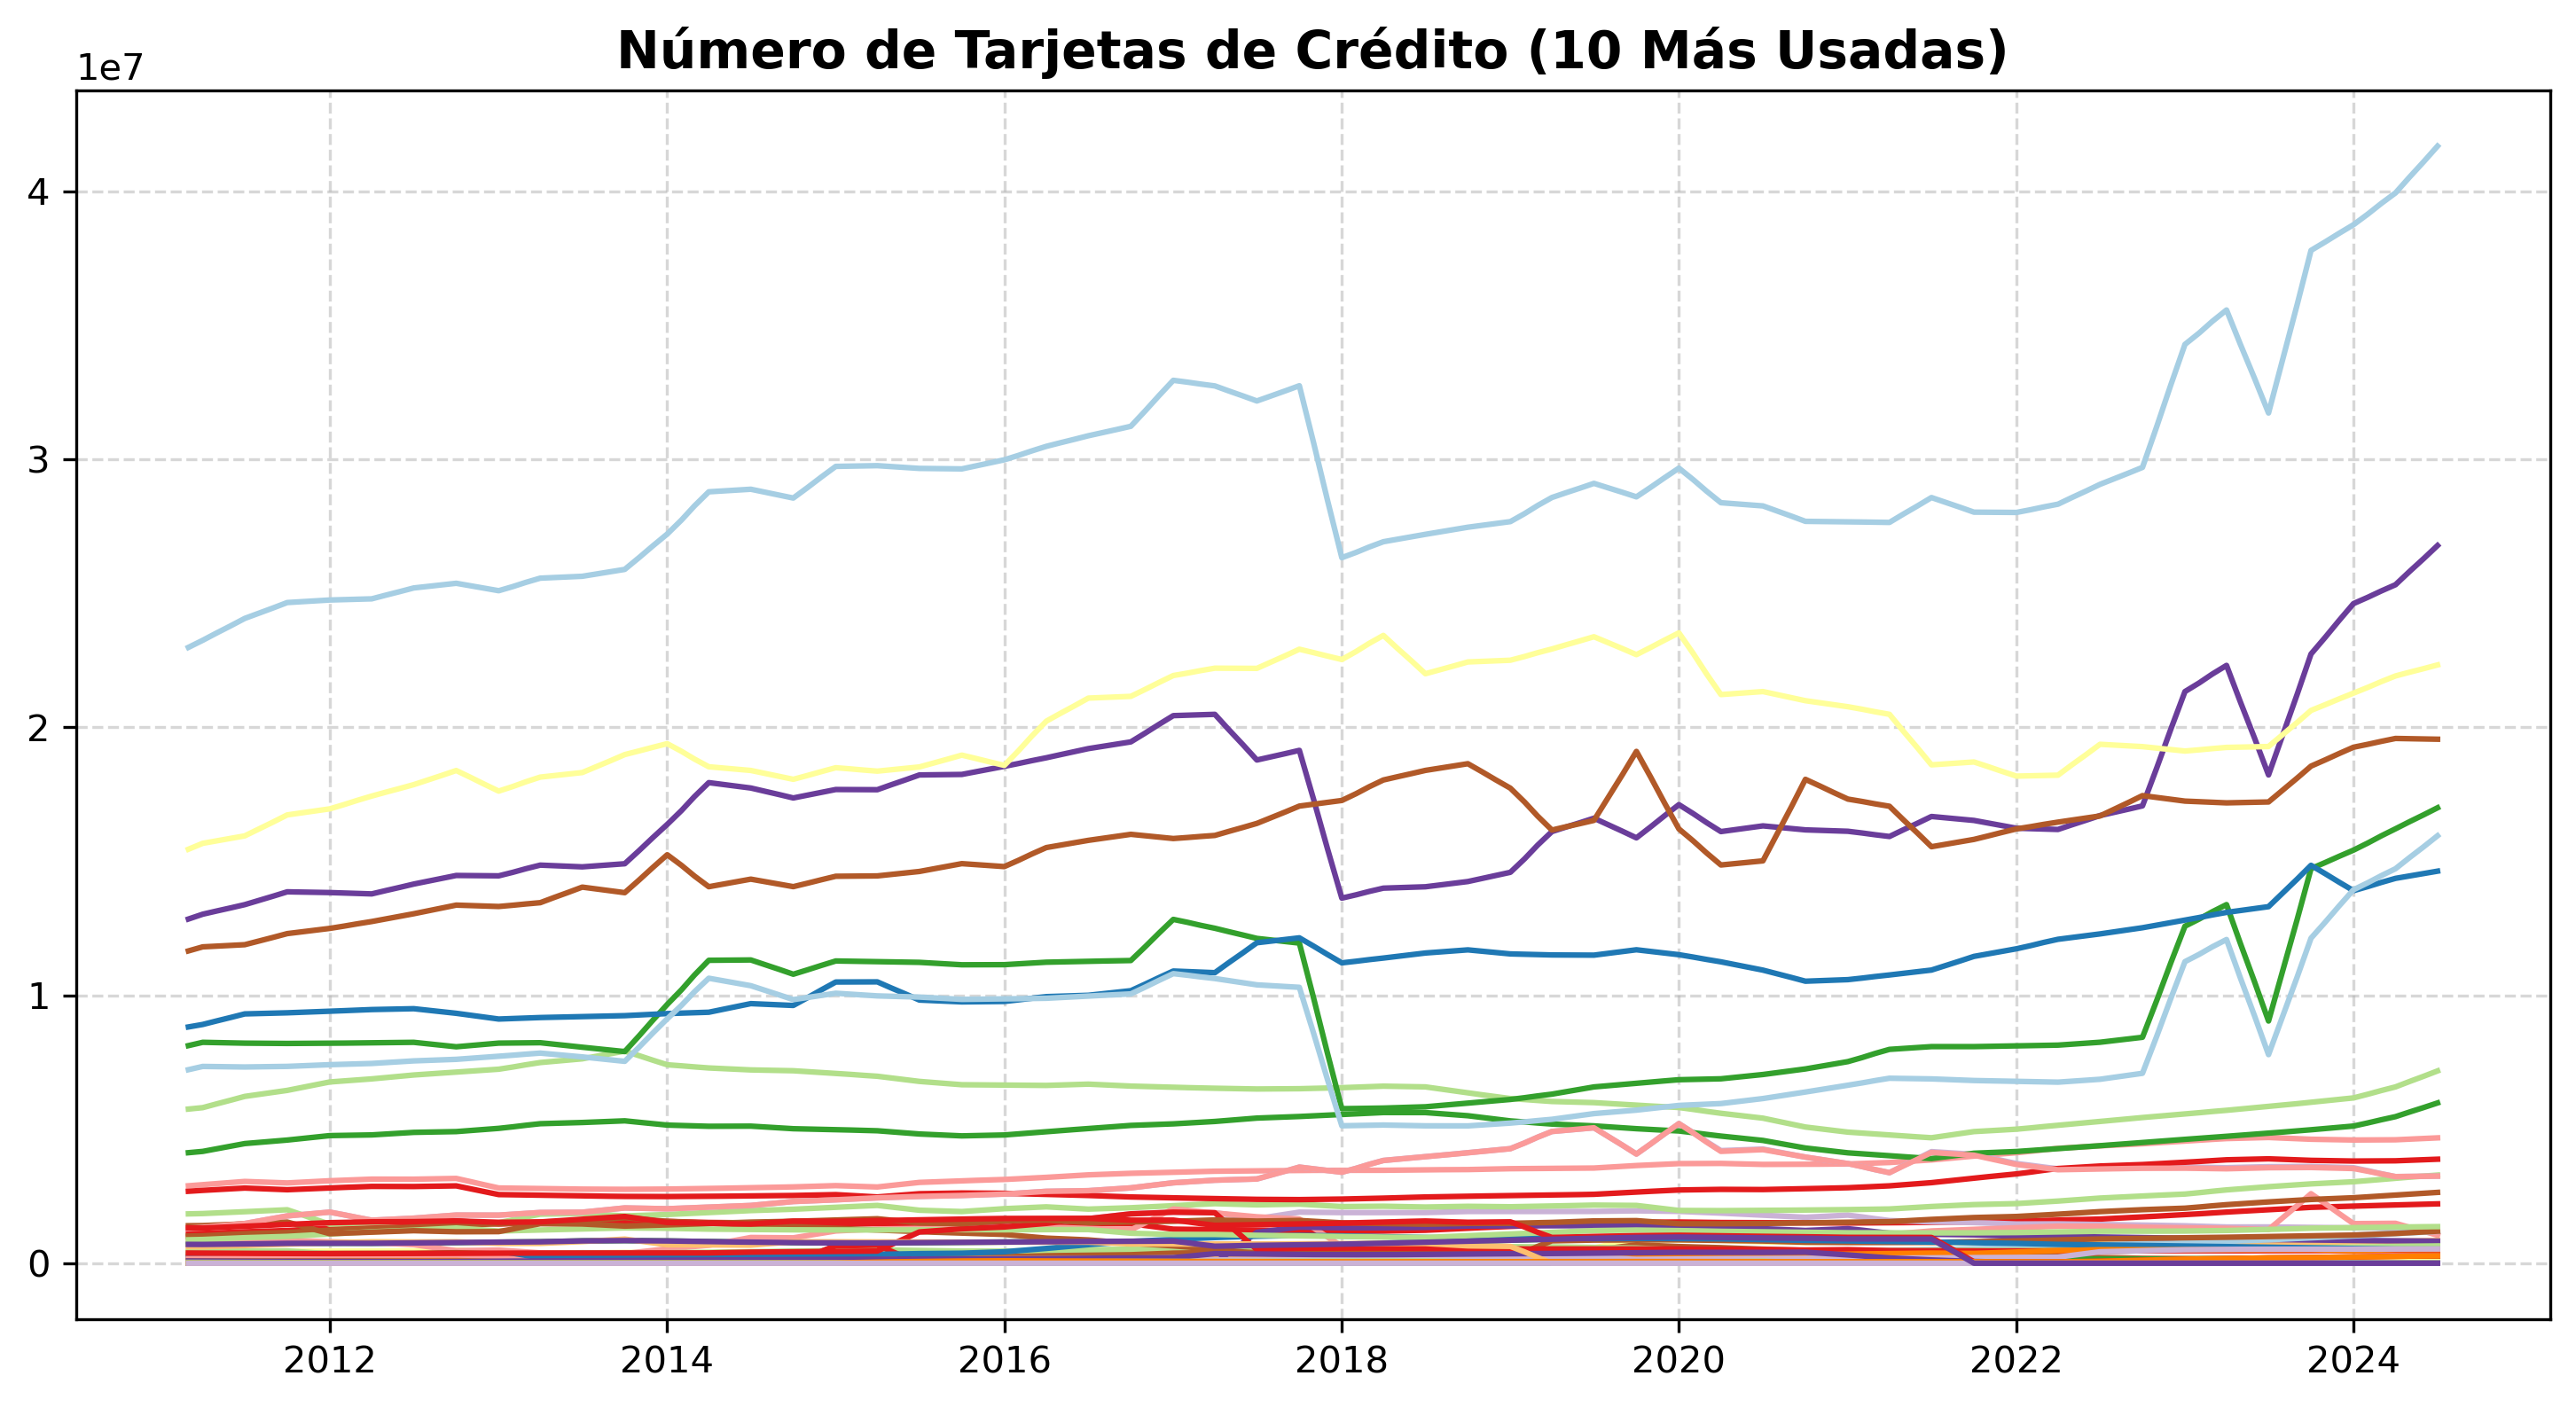

In [71]:
plot_fig(df2, "Número de Tarjetas de Crédito (10 Más Usadas)", legend = False)

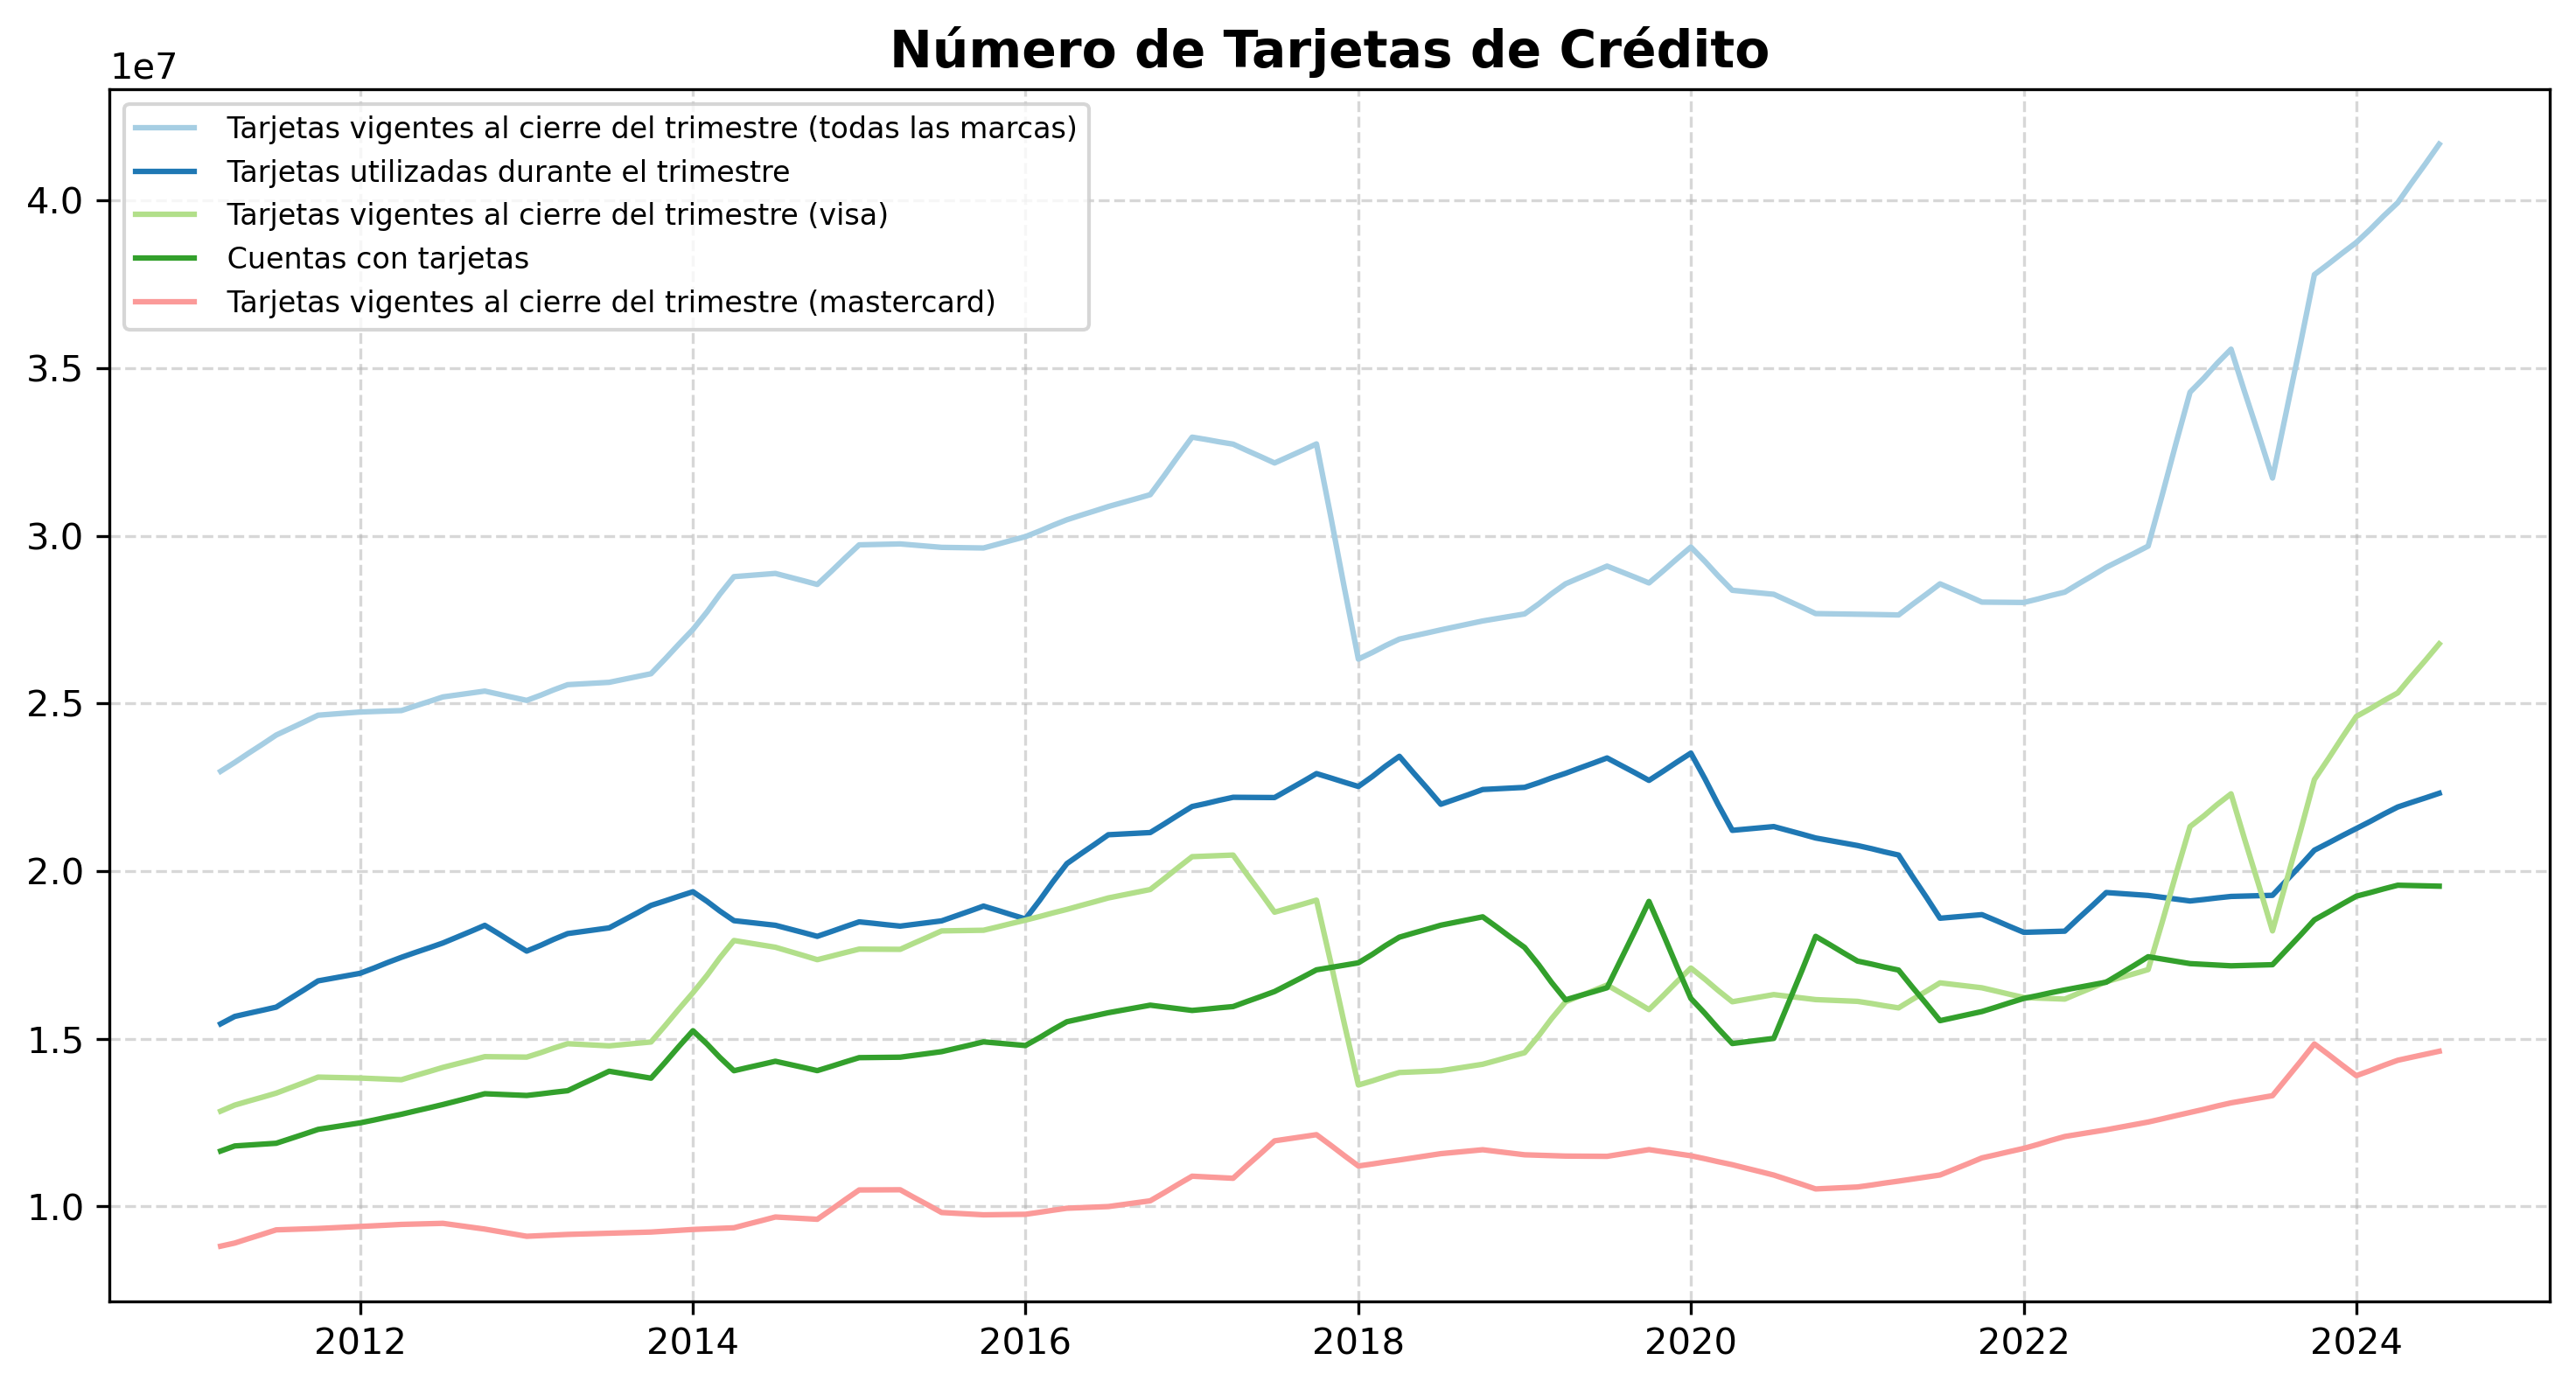

In [149]:
# keep the columns with the highest number of transactions
max_cols = df2.sum().nlargest(5).index
df2_max = df2[max_cols]

plot_fig(df2_max, "Número de Tarjetas de Crédito")

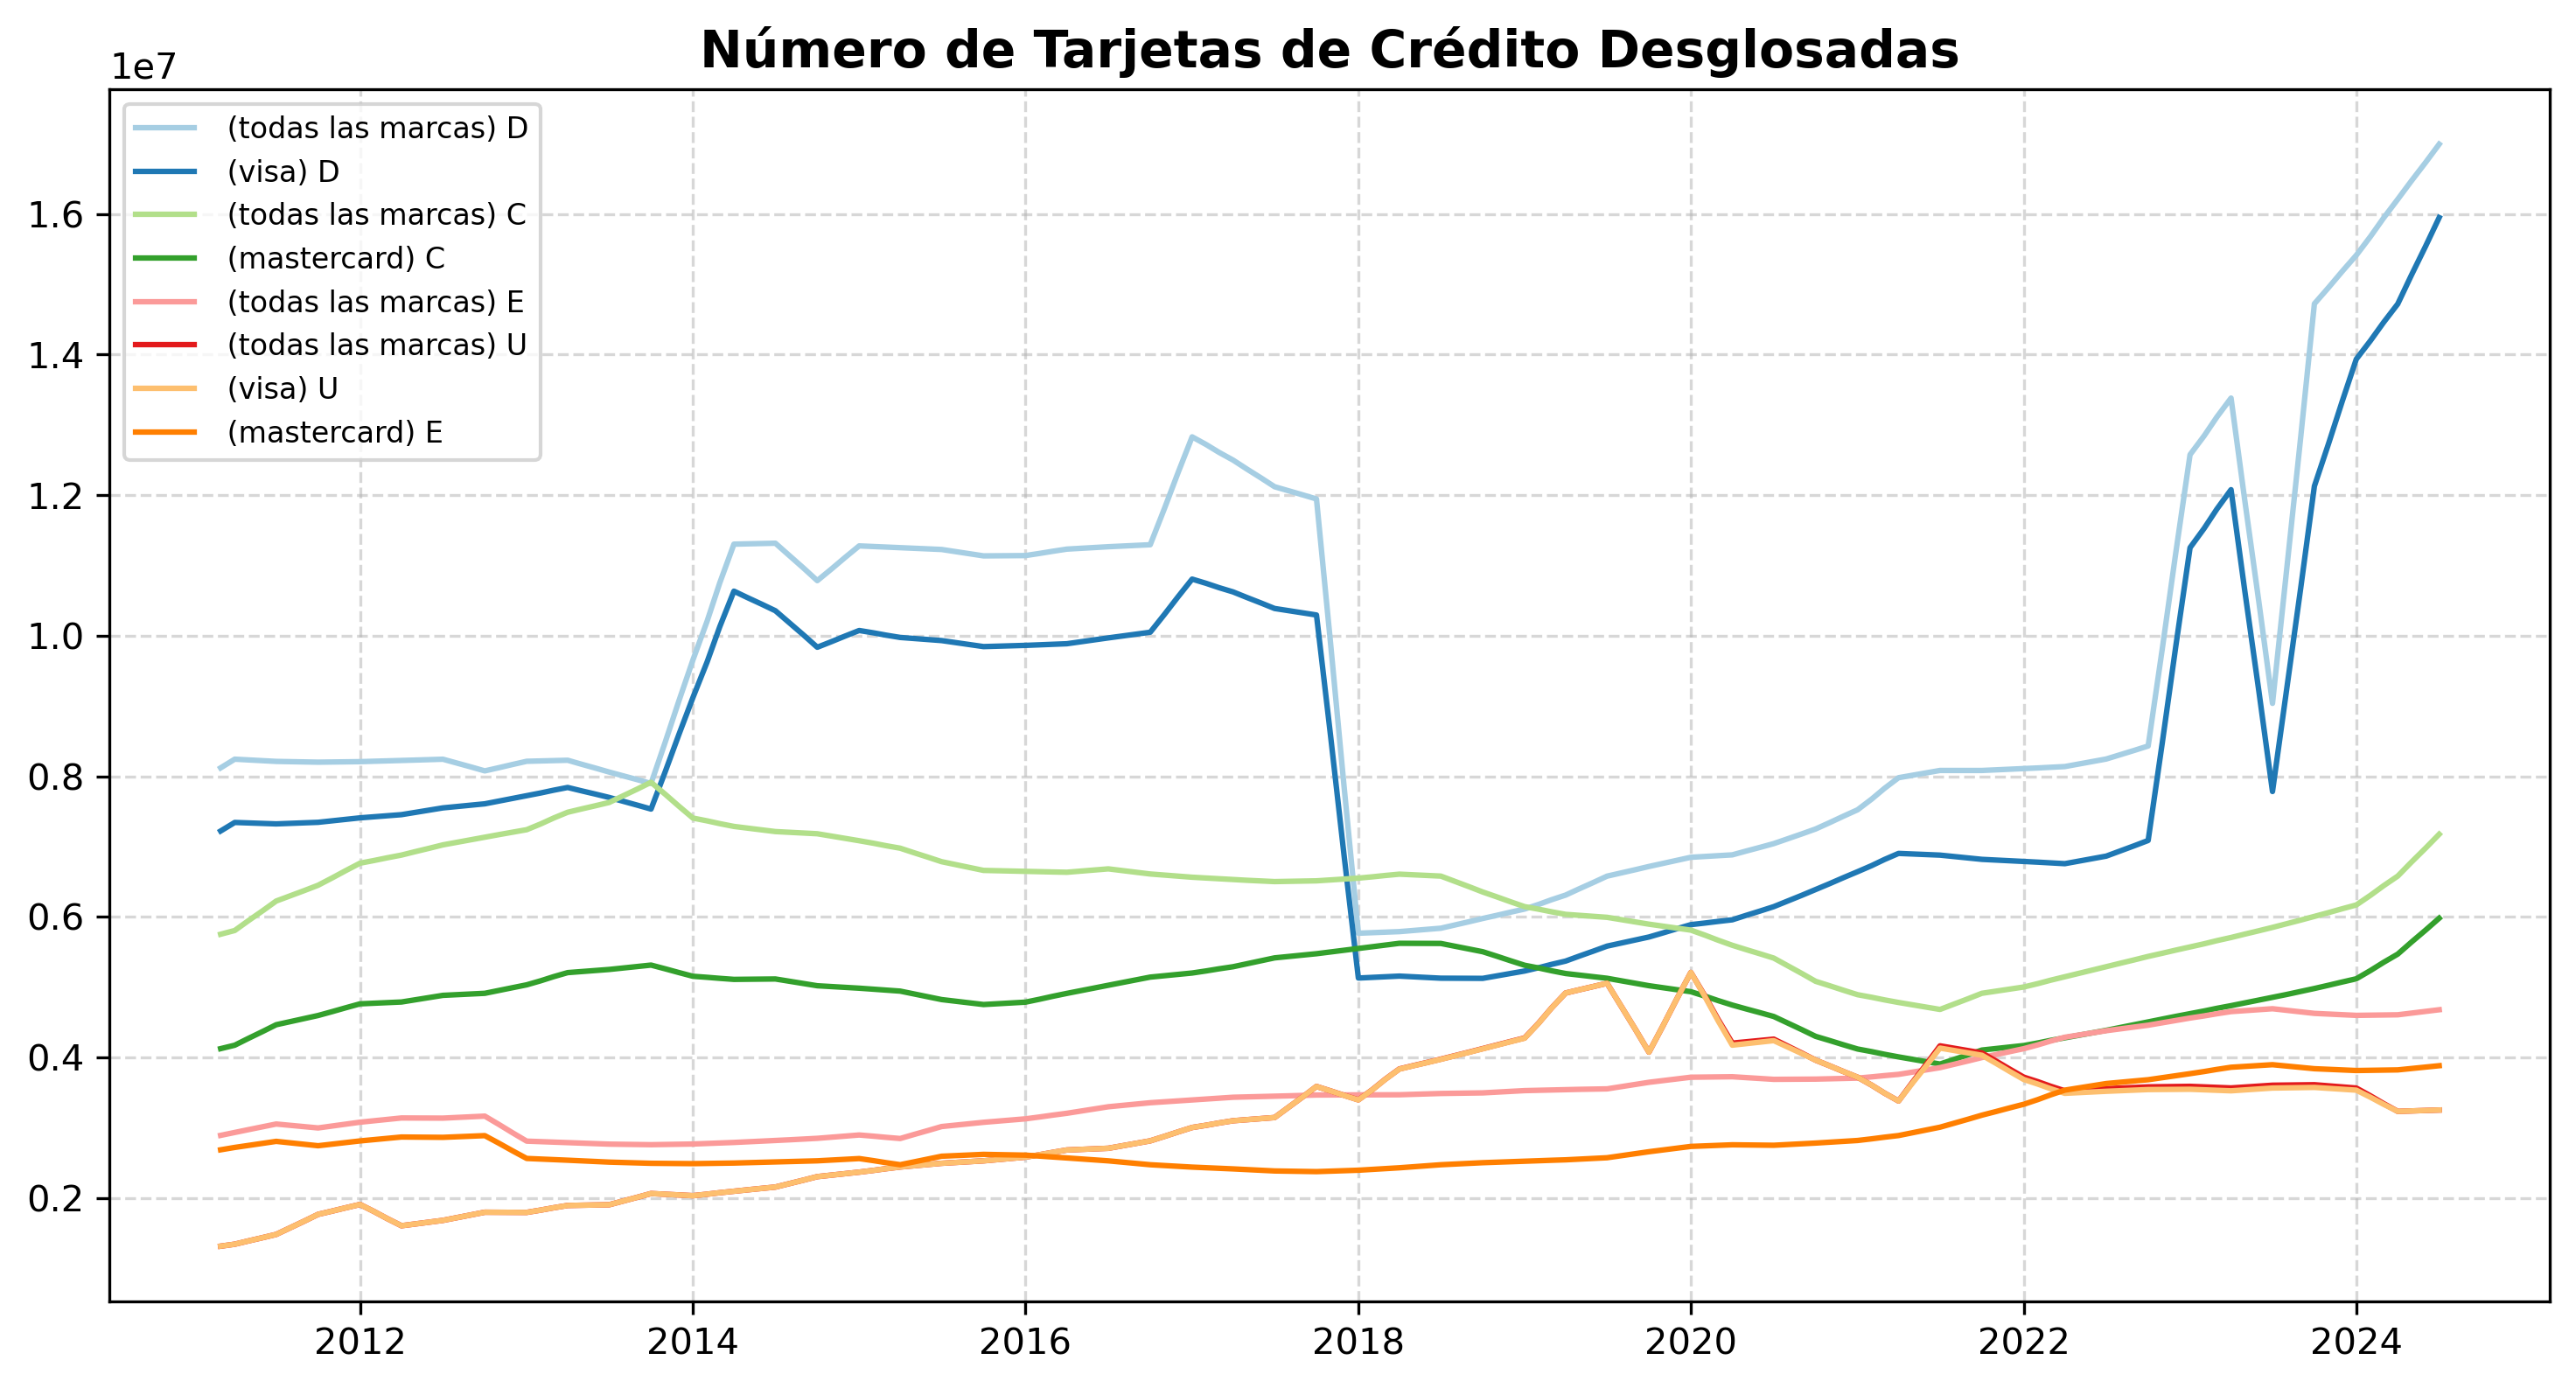

In [ ]:
df2_min = df2.drop(max_cols, axis=1)
max_cols = df2_min.sum().nlargest(8).index
df2_win_max = df2[max_cols]

plot_fig(df2_win_max, "Número de Tarjetas de Crédito Desglosadas (8 Más Usadas)", legend = True)

In [74]:
df3.columns

Index(['TIIE a 28 días, Tasa de interés promedio mensual, en por ciento anual',
       'TIIE a 91 días, Tasa de interés promedio mensual, en por ciento anual',
       'TIIE a 182 días, Tasa de interés promedio mensual, en por ciento anual',
       'TIIP a 28 días (Serie histórica), Tasa de interés promedio mensual, en por ciento anual',
       'Fondeo promedio ponderado bancario, Tasa de interés promedio mensual, en por ciento anual',
       'Fondeo promedio ponderado gubernamental, Tasa de interés promedio mensual, en por ciento anual'],
      dtype='object', name=0)

In [75]:
df3.columns = df3.columns.str.replace(", Tasa de interés promedio mensual, en por ciento anual", "")

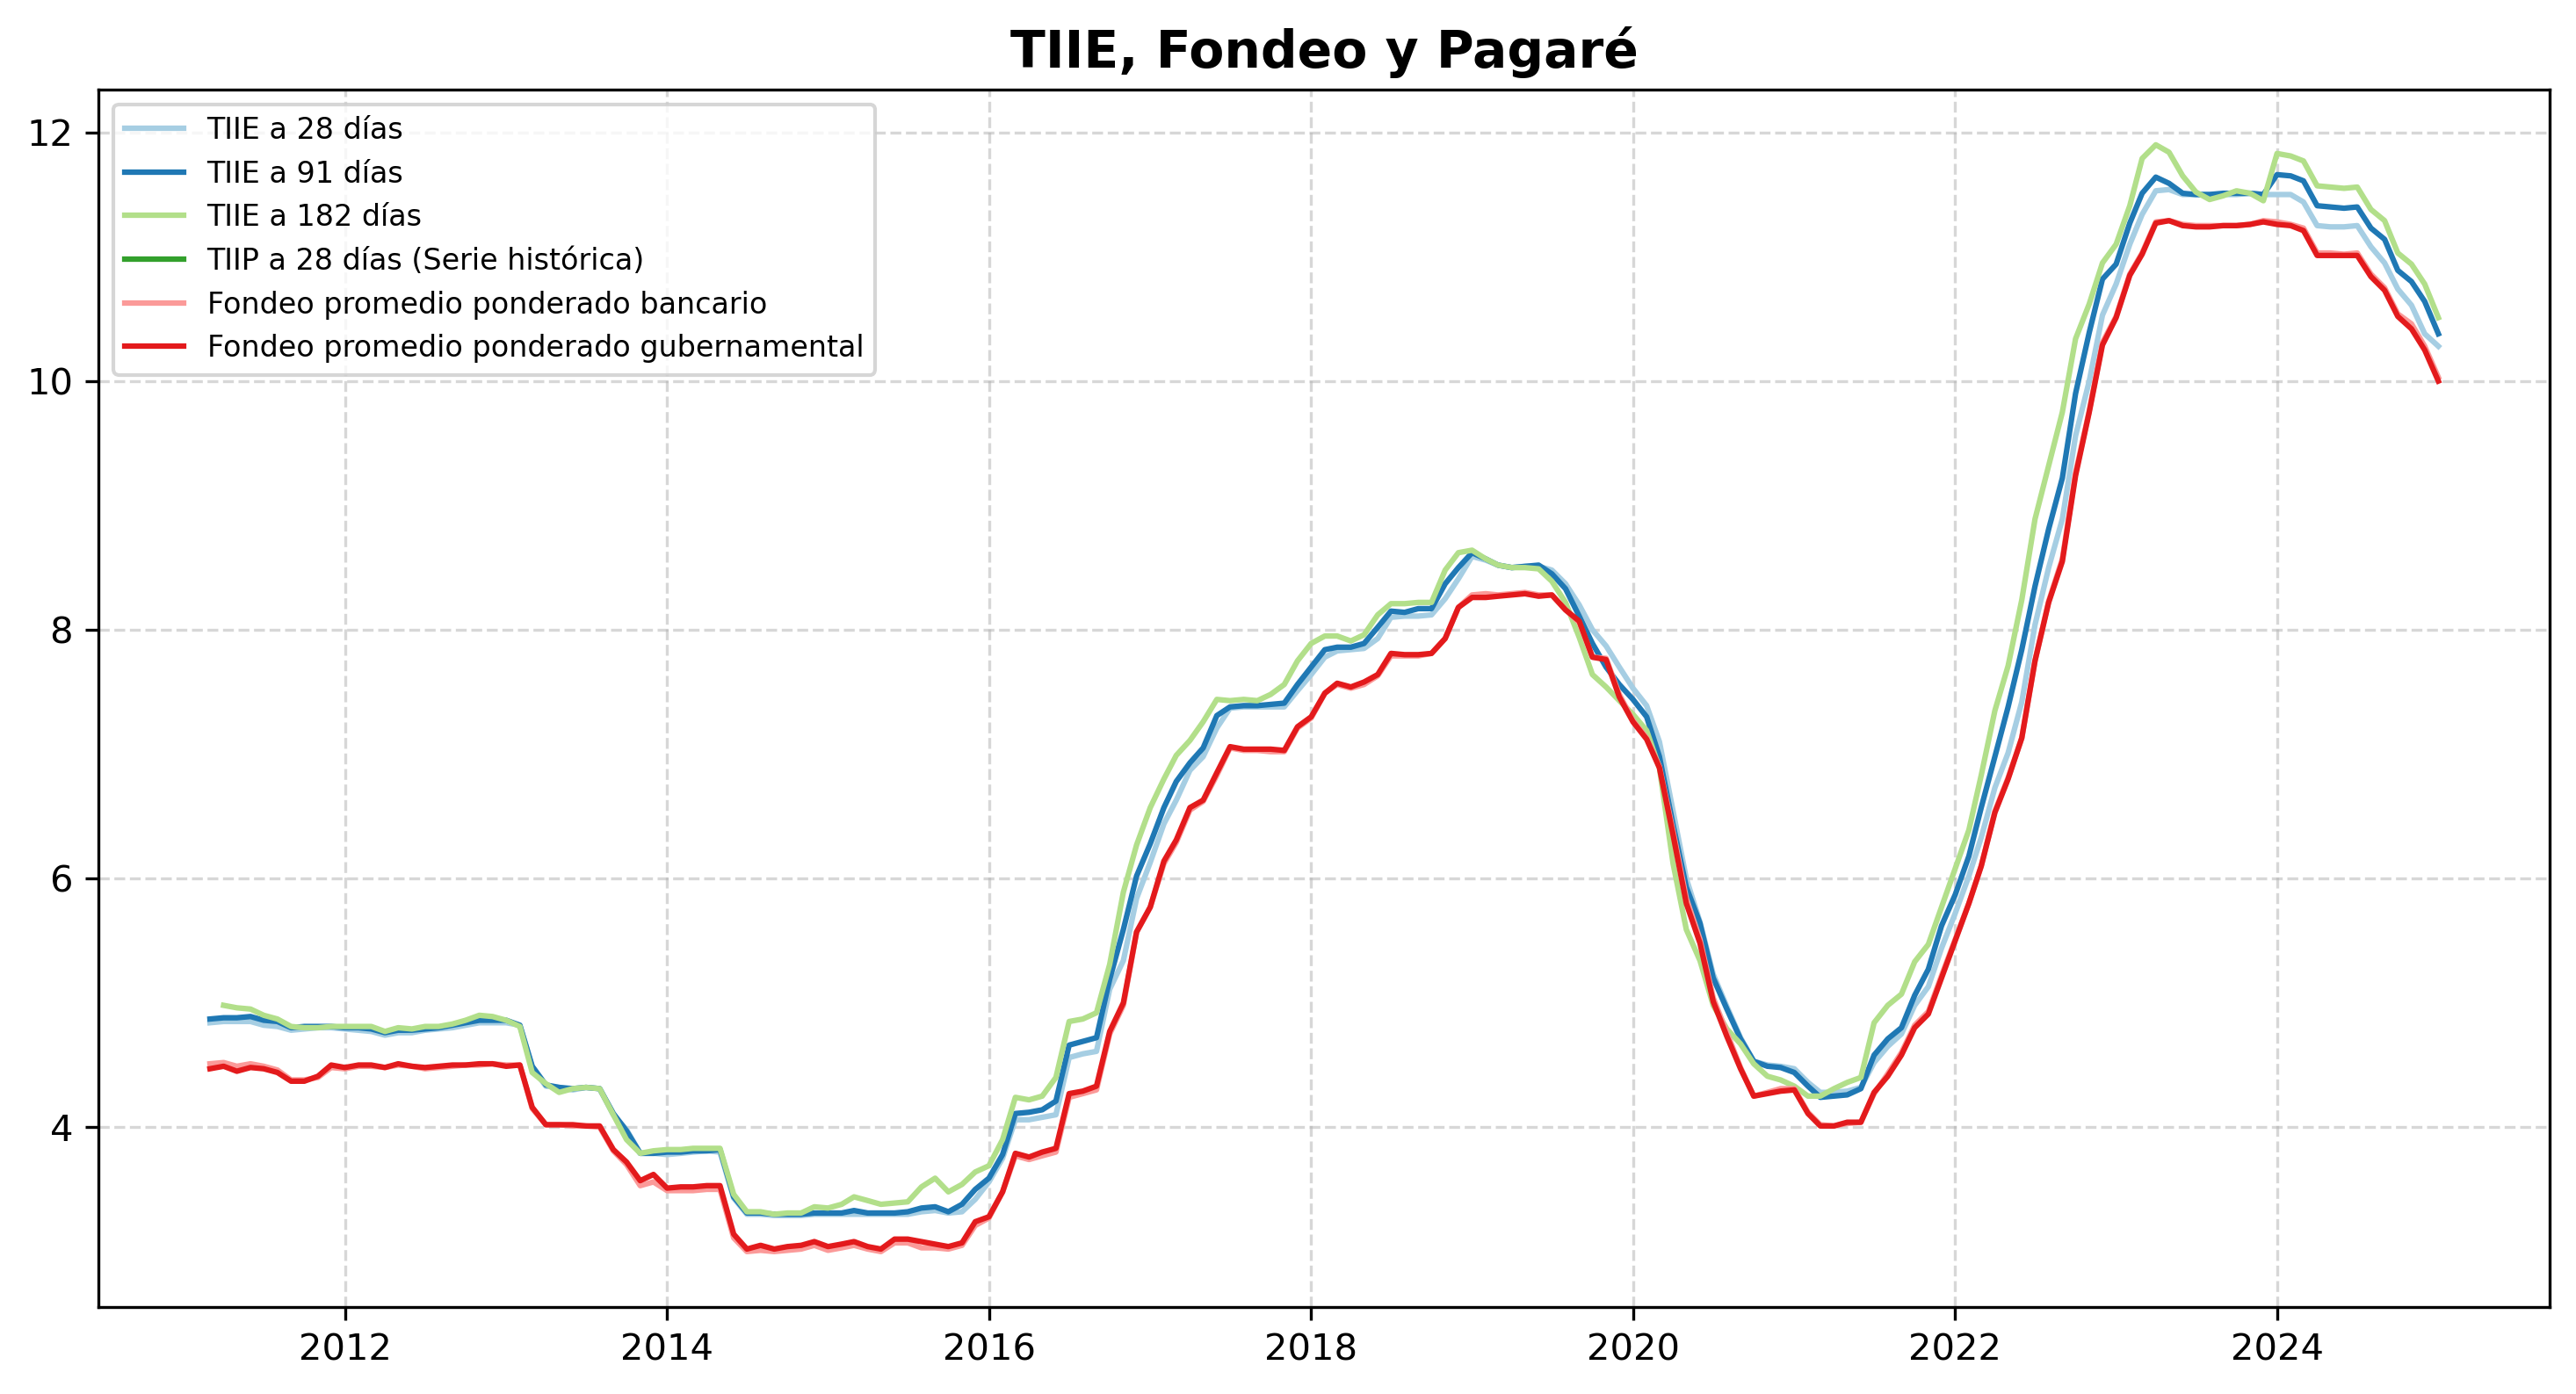

In [76]:
plot_fig(df3, "TIIE, Fondeo y Pagaré")

In [77]:
df4.columns

Index(['Tasa de efectiva promedio ponderada por saldo de todos los clientes con y sin promociones, Tarjetas de crédito',
       'Tasa de efectiva promedio ponderada por saldo de clientes no totaleros con y sin promociones, Tarjetas de crédito',
       'Tasa de efectiva promedio ponderada por saldo de clientes no totaleros sin promociones, Tarjetas de crédito'],
      dtype='object', name=0)

In [78]:
df4.columns = df4.columns.str.replace("Tasa de efectiva promedio ponderada por saldo de t", "T")
df4.columns = df4.columns.str.replace("Tasa de efectiva promedio ponderada por saldo de c", "C")
df4.columns = df4.columns.str.replace(", Tarjetas de crédito", "")


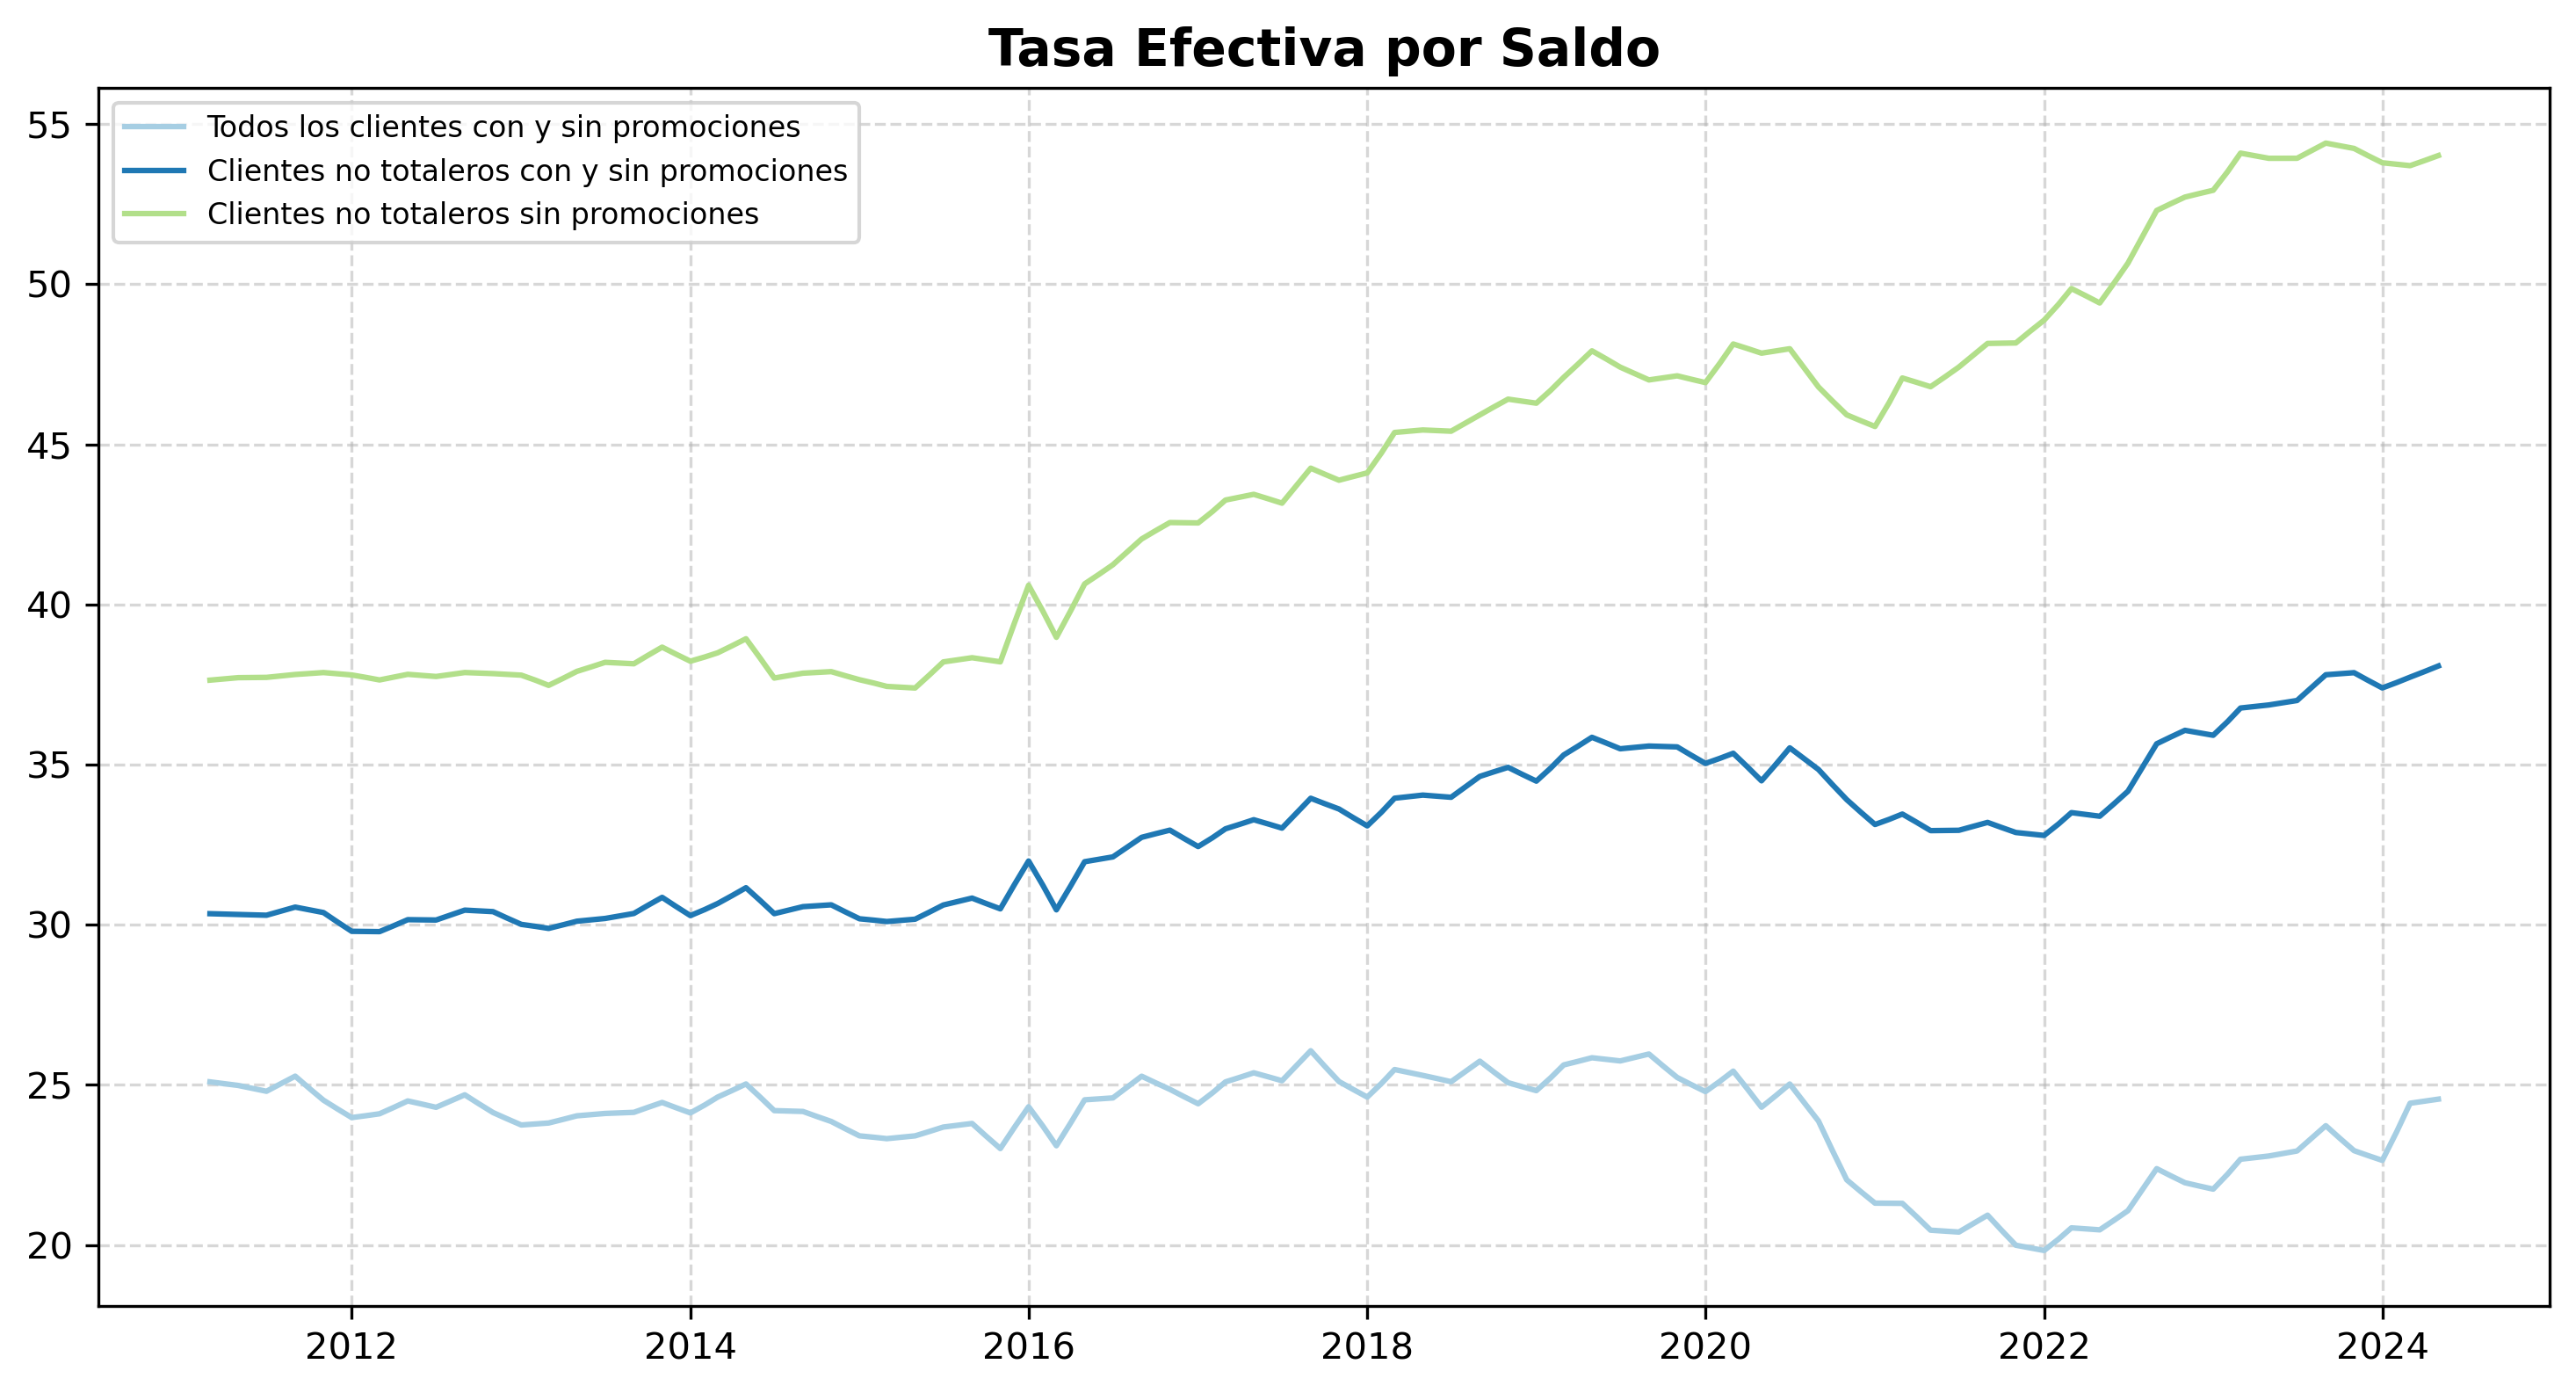

In [79]:
plot_fig(df4, "Tasa Efectiva por Saldo")

In [80]:
df5.columns 

Index(['Costo de captación a plazo de pasivos en moneda nacional (CCP), Tasa en por ciento anual',
       'Costo de captación a plazo de pasivos en moneda nacional observado (CCPO), Tasa en por ciento anual',
       'Costo de captación a plazo de pasivos en Udis (CCP-Udis), Tasa en por ciento anual',
       'Costo de captación a plazo de pasivos en dólares (CCP-Dólares), Tasa en por ciento anual',
       'Costo porcentual promedio (CPP), Tasa en por ciento anual',
       'Costo de captaciÃ³n a plazo de pasivos estables (CPPE), Tasa en por ciento anual',
       'Tasa de interés de los pasivos a plazo, Moneda nacional, Banca de Desarrollo'],
      dtype='object', name=0)

In [81]:
df5colnames = ["CCP", "CCPO", "CCP-Udis", "CCP-Dólares", "CPP", "CPPE", "Banca de Desarrollo"]

df5.columns = df5colnames

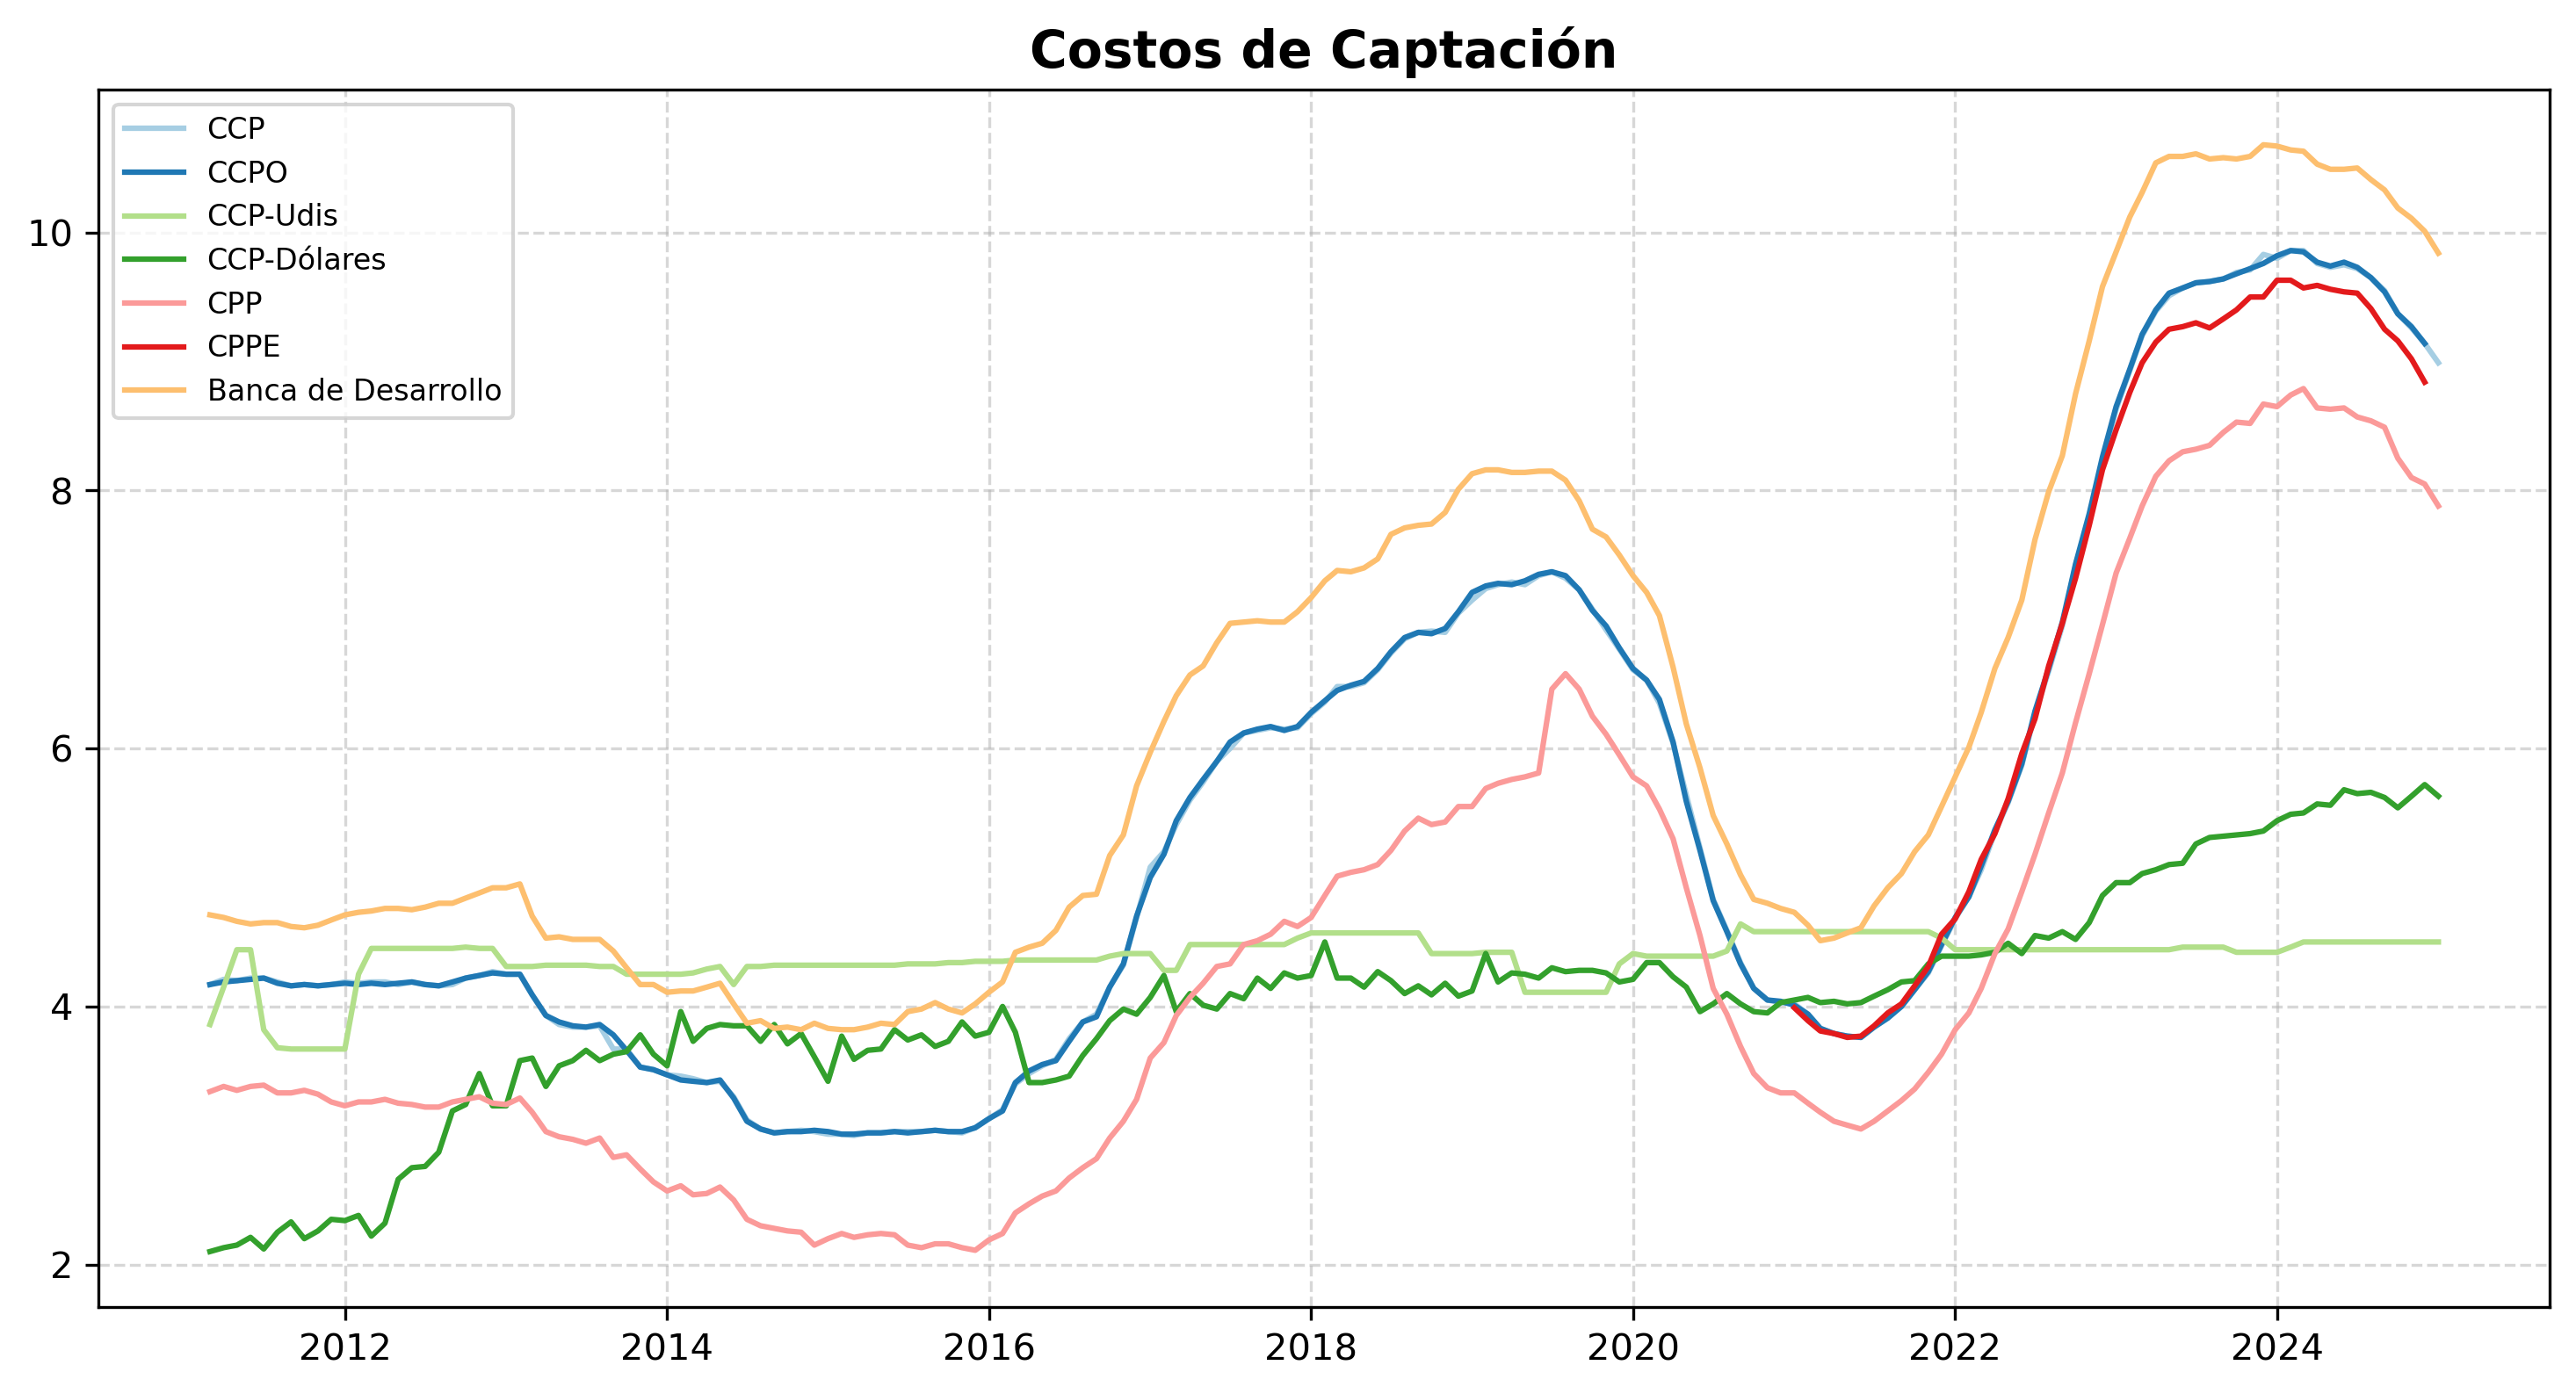

In [82]:
plot_fig(df5, "Costos de Captación")

In [83]:
df6.columns

Index(['Valores privados de corto plazo semanal, Total corto plazo, tasa promedio ponderada, Porcentajes',
       'Valores privados de corto plazo semanal, Papel comercial, tasa promedio ponderada, Porcentajes',
       'Valores privados de corto plazo semanal, Certificados bursátiles a corto plazo, tasa promedio ponderada, Porcentajes'],
      dtype='object', name=0)

In [84]:
df6.columns = df6.columns.str.replace("Valores privados de corto plazo semanal, ", "")
df6.columns = df6.columns.str.replace(", tasa promedio ponderada, Porcentajes", "")

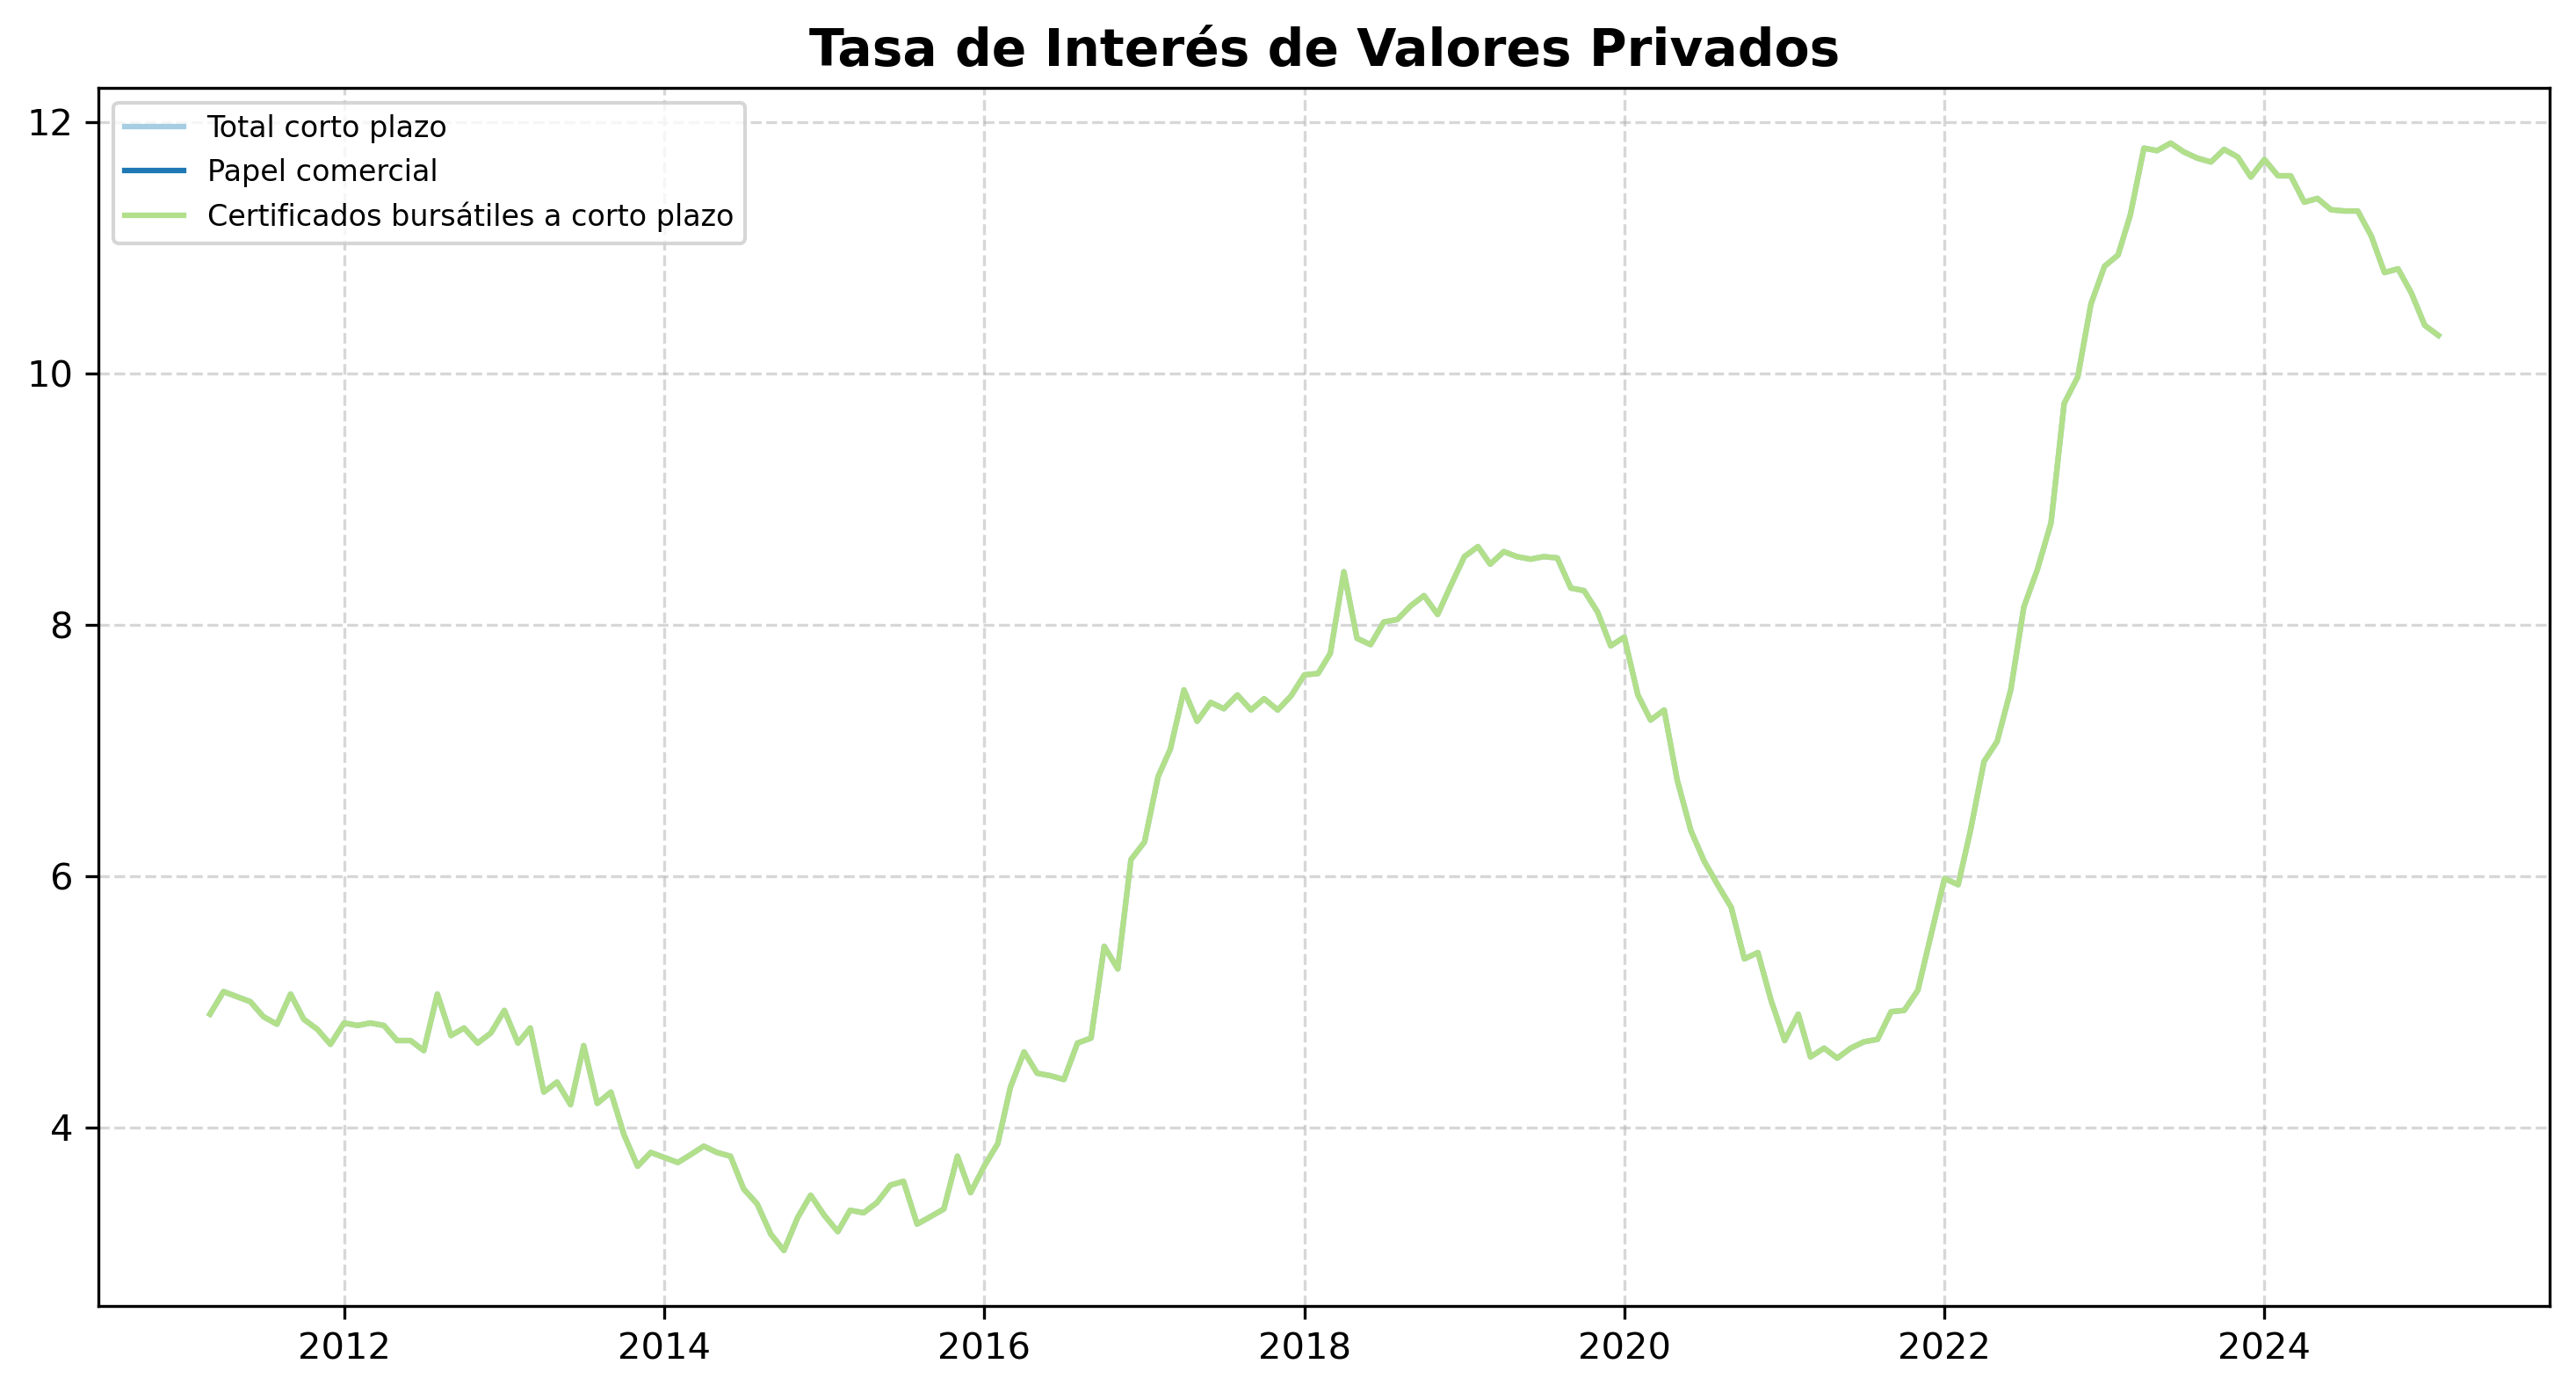

In [85]:
plot_fig(df6, "Tasa de Interés de Valores Privados")

In [86]:
df7.columns

Index(['Tasa de fondeo gubernamental, Mediana ponderada por volumen, Tasa de interés en por ciento anual',
       'Tasa de fondeo ponderada con BPAS y BREMS.',
       'Tasa de fondeo gubernamental, Percentil 25, Tasa de interés en por ciento anual',
       'Tasa de fondeo gubernamental, Percentil 75, Tasa de interés en por ciento anual'],
      dtype='object', name=0)

In [87]:
df7.columns = df7.columns.str.replace(", Tasa de interés en por ciento anual", "")

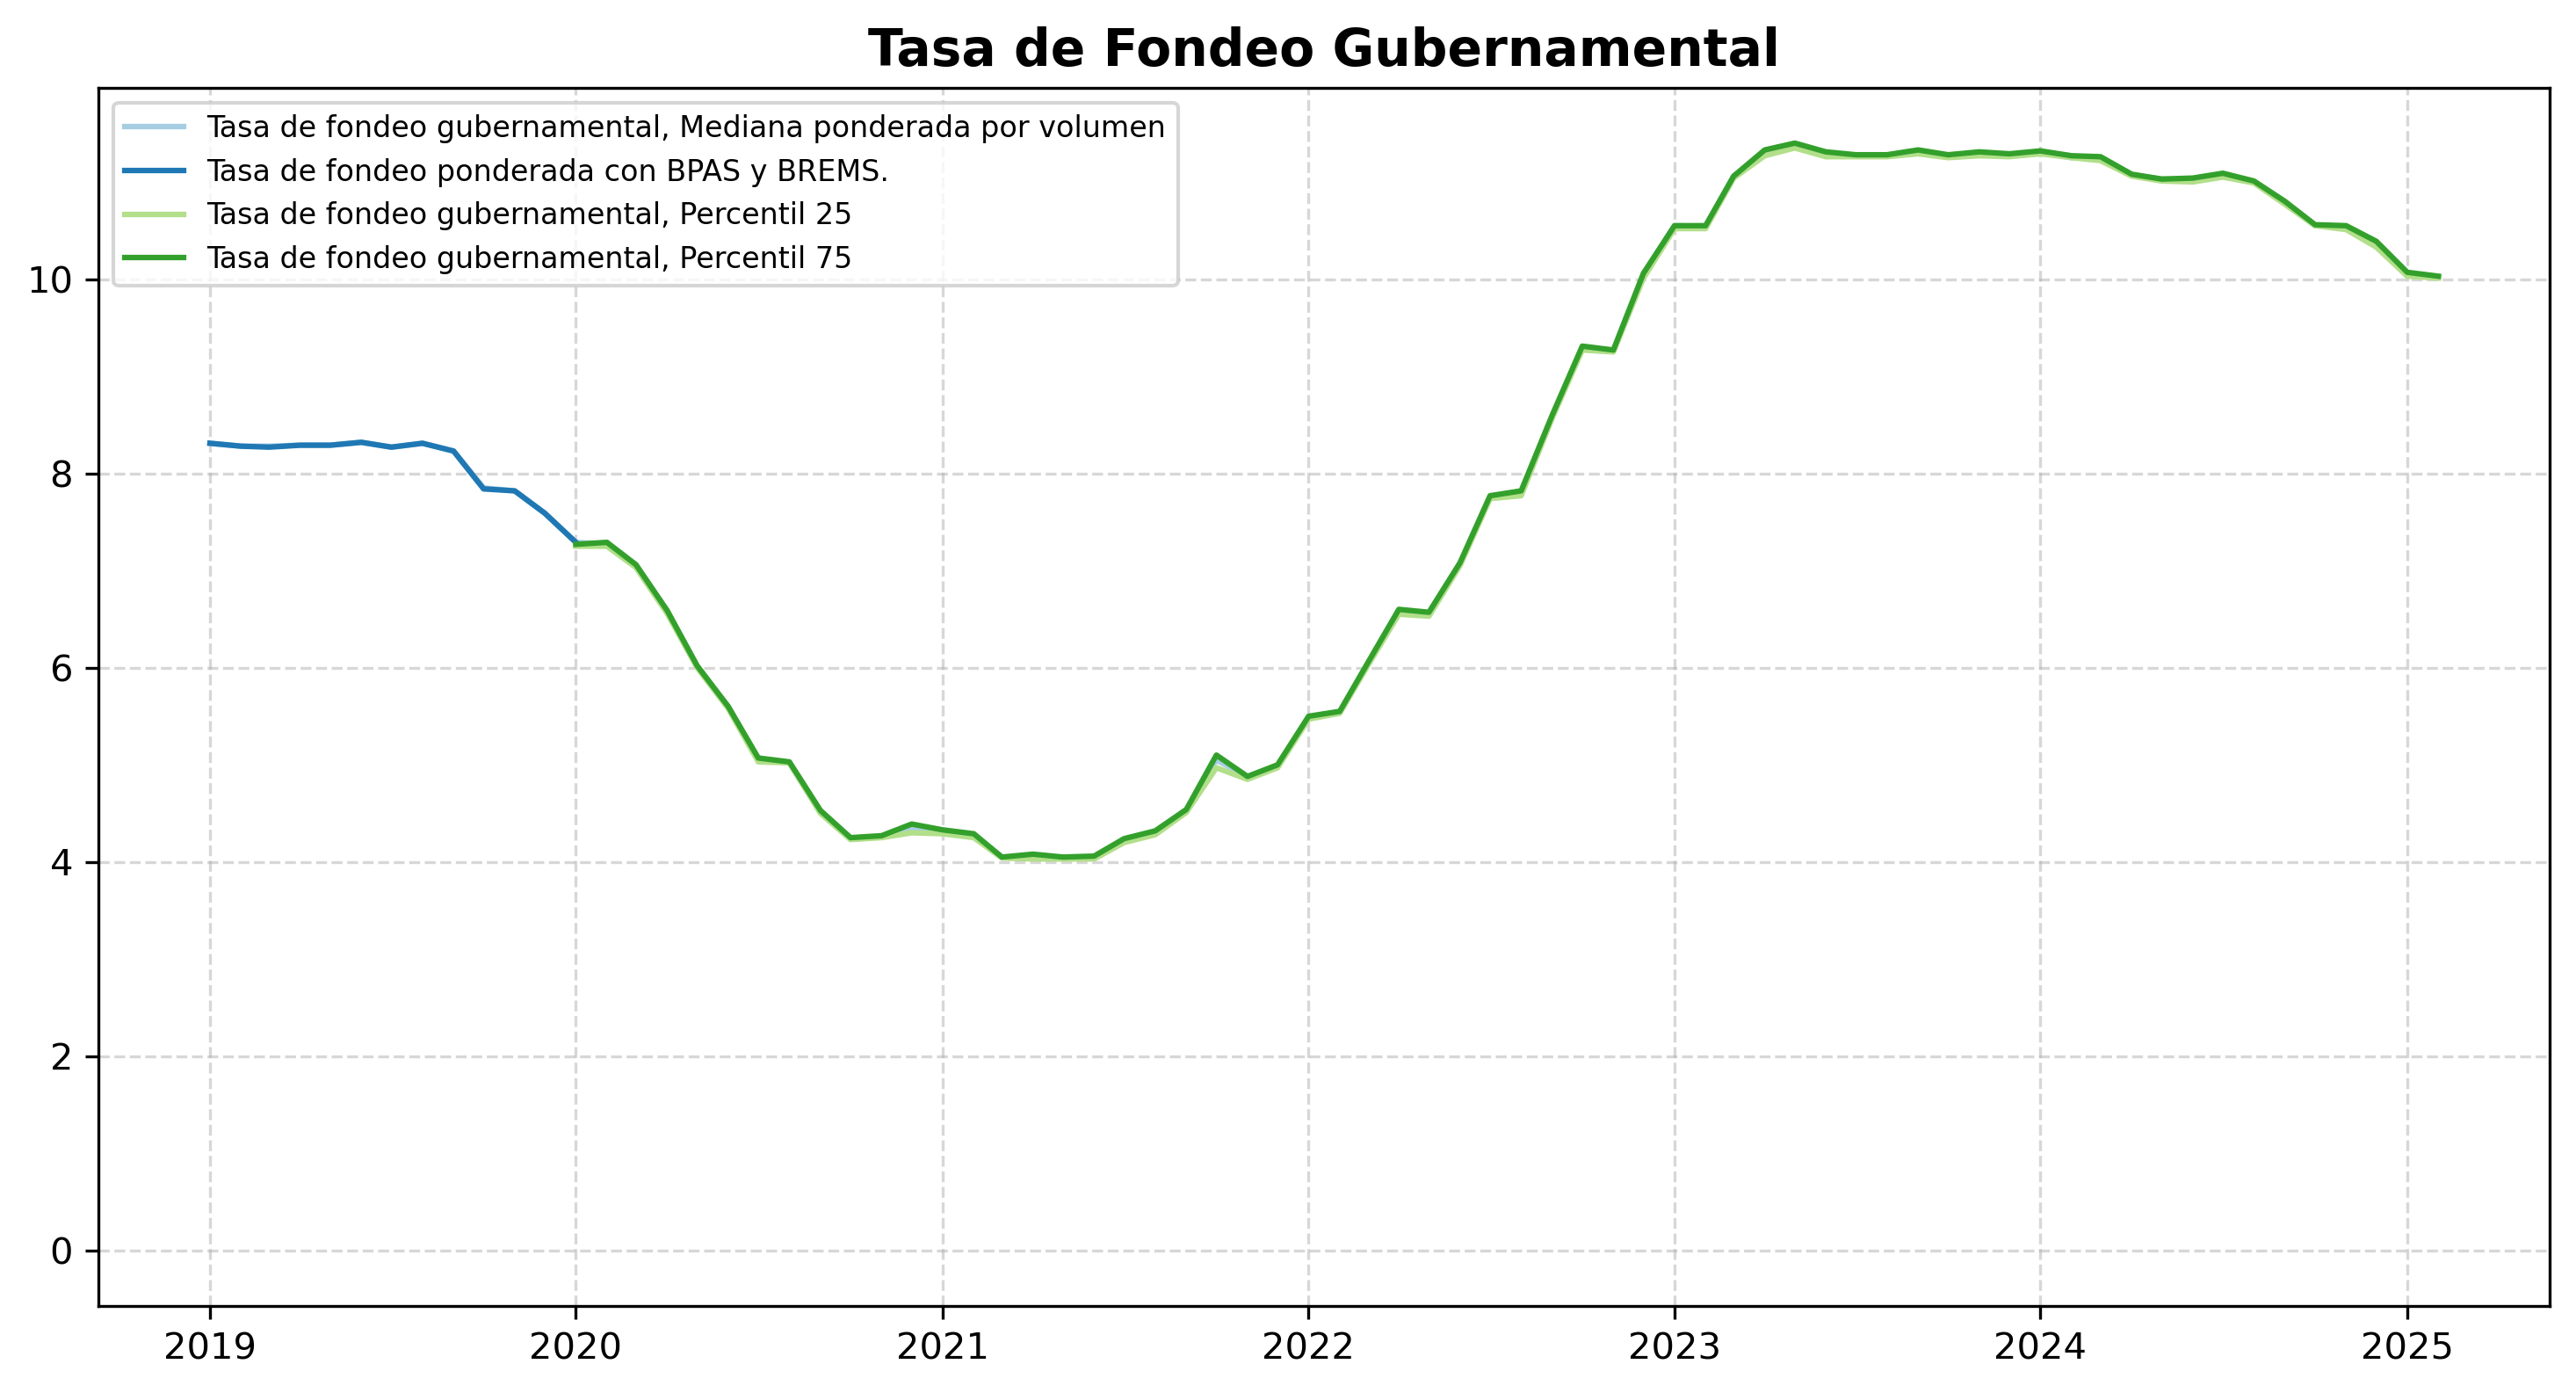

In [88]:
plot_fig(df7, "Tasa de Fondeo Gubernamental")

In [89]:
df8.columns

Index(['Vector de precios de títulos gubernamentales, Cetes 28 días - Plazo',
       'Vector de precios de títulos gubernamentales, Cetes 28 días - Precio Limpio',
       'Vector de precios de títulos gubernamentales, Cetes 28 días - Precio Sucio',
       'Vector de precios de títulos gubernamentales, Cetes 28 días - Tasa Rendimiento',
       'Vector de precios de títulos gubernamentales, Cetes 91 días - Plazo',
       'Vector de precios de títulos gubernamentales, Cetes 91 días - Precio Limpio',
       'Vector de precios de títulos gubernamentales, Cetes 91 días - Precio Sucio',
       'Vector de precios de títulos gubernamentales, Cetes 91 días - Tasa Rendimiento',
       'Vector de precios de títulos gubernamentales, Cetes 182 días - Plazo',
       'Vector de precios de títulos gubernamentales, Cetes 182 días - Precio Limpio',
       'Vector de precios de títulos gubernamentales, Cetes 182 días - Precio Sucio',
       'Vector de precios de títulos gubernamentales, Cetes 182 días - T

In [90]:
df8.columns = df8.columns.str.replace("Vector de precios de títulos gubernamentales, ", "")

In [91]:
df8.columns 

Index(['Cetes 28 días - Plazo', 'Cetes 28 días - Precio Limpio',
       'Cetes 28 días - Precio Sucio', 'Cetes 28 días - Tasa Rendimiento',
       'Cetes 91 días - Plazo', 'Cetes 91 días - Precio Limpio',
       'Cetes 91 días - Precio Sucio', 'Cetes 91 días - Tasa Rendimiento',
       'Cetes 182 días - Plazo', 'Cetes 182 días - Precio Limpio',
       'Cetes 182 días - Precio Sucio', 'Cetes 182 días - Tasa Rendimiento',
       'Cetes 364 días - Plazo', 'Cetes 364 días - Precio Limpio',
       'Cetes 364 días - Precio Sucio', 'Cetes 364 días - Tasa Rendimiento',
       'Bonos 3 a 5 años - Plazo', 'Bonos 3 a 5 años - Precio Limpio',
       'Bonos 3 a 5 años - Precio Sucio', 'Bonos 3 a 5 años - Cupón Vigente',
       'Bonos 7 a 10 años - Plazo', 'Bonos 7 a 10 años - Precio Limpio',
       'Bonos 7 a 10 años - Precio Sucio', 'Bonos 7 a 10 años - Cupón Vigente',
       'Bonos 10 a 20 años - Plazo', 'Bonos 10 a 20 años - Precio Limpio',
       'Bonos 10 a 20 años - Precio Sucio',
       'Bon

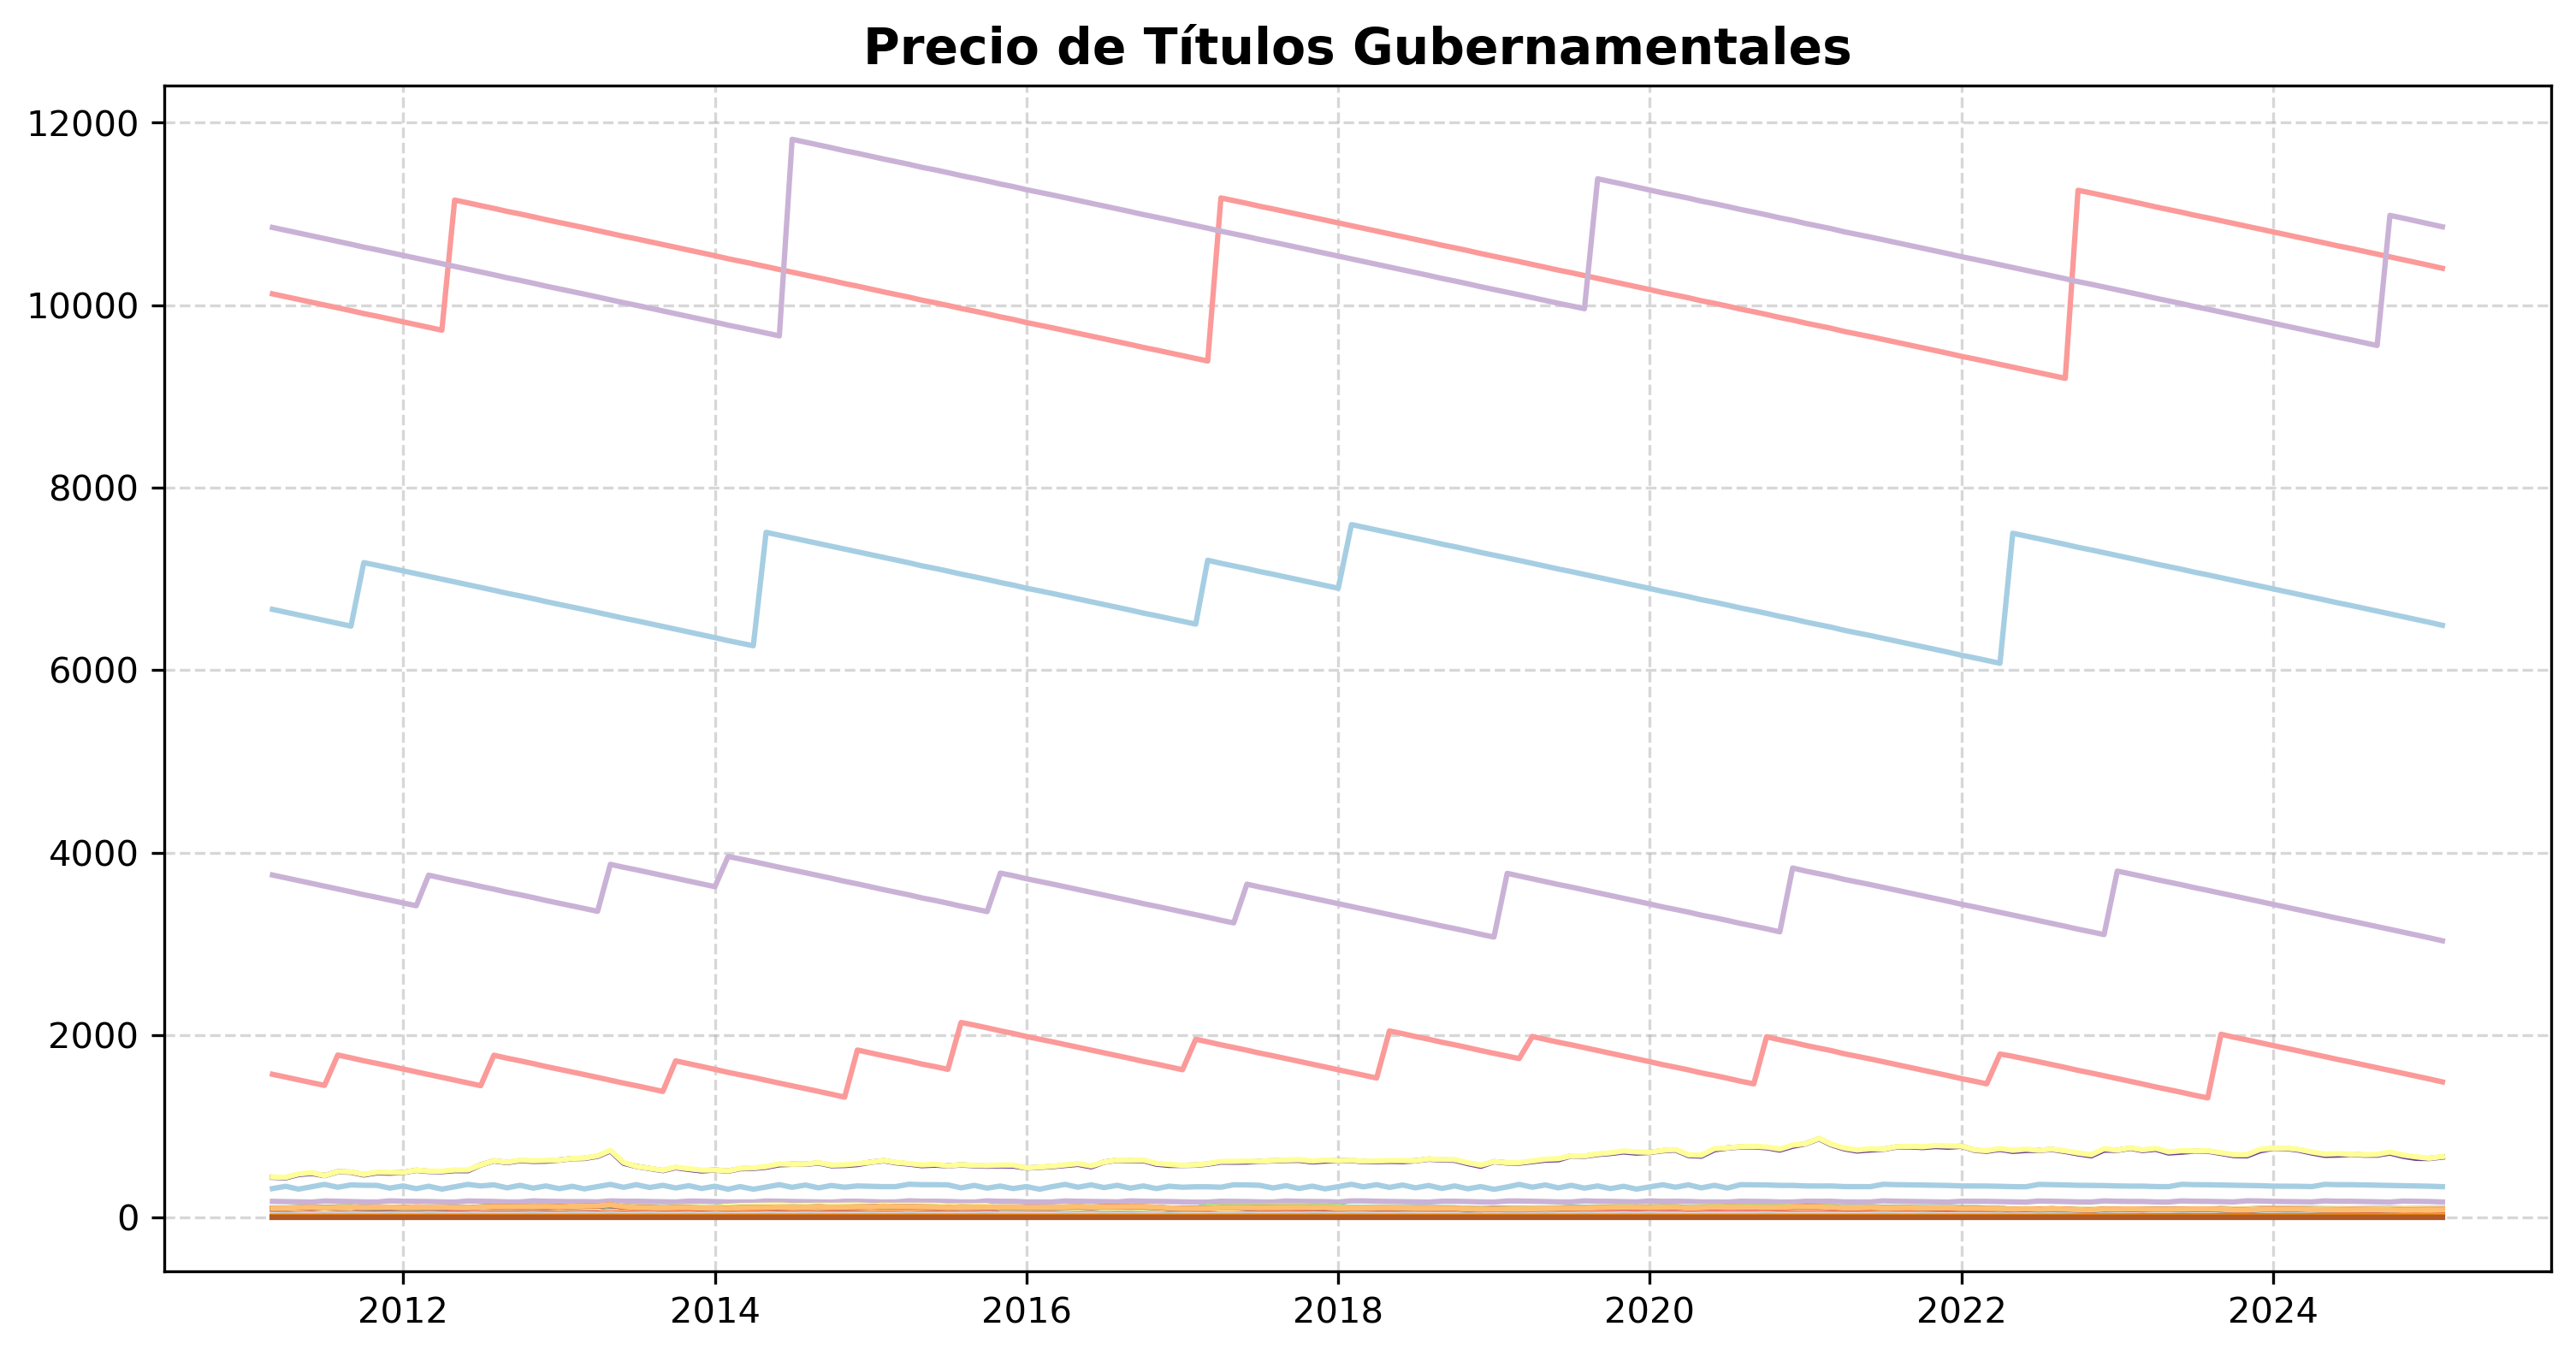

In [92]:
plot_fig(df8, "Precio de Títulos Gubernamentales", legend = False)

In [93]:
df9.columns

Index(['Índice de precios al consumidor, por objeto del gasto, Nacional, Índice general',
       'Subíndices subyacente y complementarios, Precios al consumidor (INPC), Subyacente',
       'Índice de precios al consumidor, por objeto del gasto, Nacional, Índice general',
       'Subíndices subyacente y complementarios, Precios al consumidor (INPC), Subyacente',
       'Subíndices subyacente y complementarios, Precios al consumidor (INPC), Subyacente, Mercancías',
       'Subíndices subyacente y complementarios, Precios al consumidor (INPC), Subyacente, Mercancías, Alimentos, Bebidas y Tabaco',
       'Subíndices subyacente y complementarios, Precios al consumidor (INPC), Subyacente, Mercancías, Mercancías no Alimenticias',
       'Subíndices subyacente y complementarios, Precios al consumidor (INPC), Subyacente, Servicios',
       'Subíndices subyacente y complementarios, Precios al consumidor (INPC), Subyacente, Servicios, Vivienda',
       'Subíndices subyacente y complementarios, Pr

In [94]:
df9.columns = df9.columns.str.replace("Subíndices subyacente y complementarios, Precios al consumidor (INPC), ", "SSC e INPC, ")


In [95]:
df9.columns

Index(['Índice de precios al consumidor, por objeto del gasto, Nacional, Índice general',
       'SSC e INPC, Subyacente',
       'Índice de precios al consumidor, por objeto del gasto, Nacional, Índice general',
       'SSC e INPC, Subyacente', 'SSC e INPC, Subyacente, Mercancías',
       'SSC e INPC, Subyacente, Mercancías, Alimentos, Bebidas y Tabaco',
       'SSC e INPC, Subyacente, Mercancías, Mercancías no Alimenticias',
       'SSC e INPC, Subyacente, Servicios',
       'SSC e INPC, Subyacente, Servicios, Vivienda',
       'SSC e INPC, Subyacente, Servicios, Educación (colegiaturas)',
       'SSC e INPC, Subyacente, Servicios, Otros Servicios',
       'SSC e INPC, No Subyacente', 'SSC e INPC, No Subyacente, Agropecuarios',
       'SSC e INPC, No Subyacente, Agropecuarios, Frutas y Verduras',
       'SSC e INPC, No Subyacente, Agropecuarios, Pecuarios',
       'SSC e INPC, No Subyacente, Energéticos y Tarifas Autorizadas por el Gobierno',
       'SSC e INPC, No Subyacente, Energé

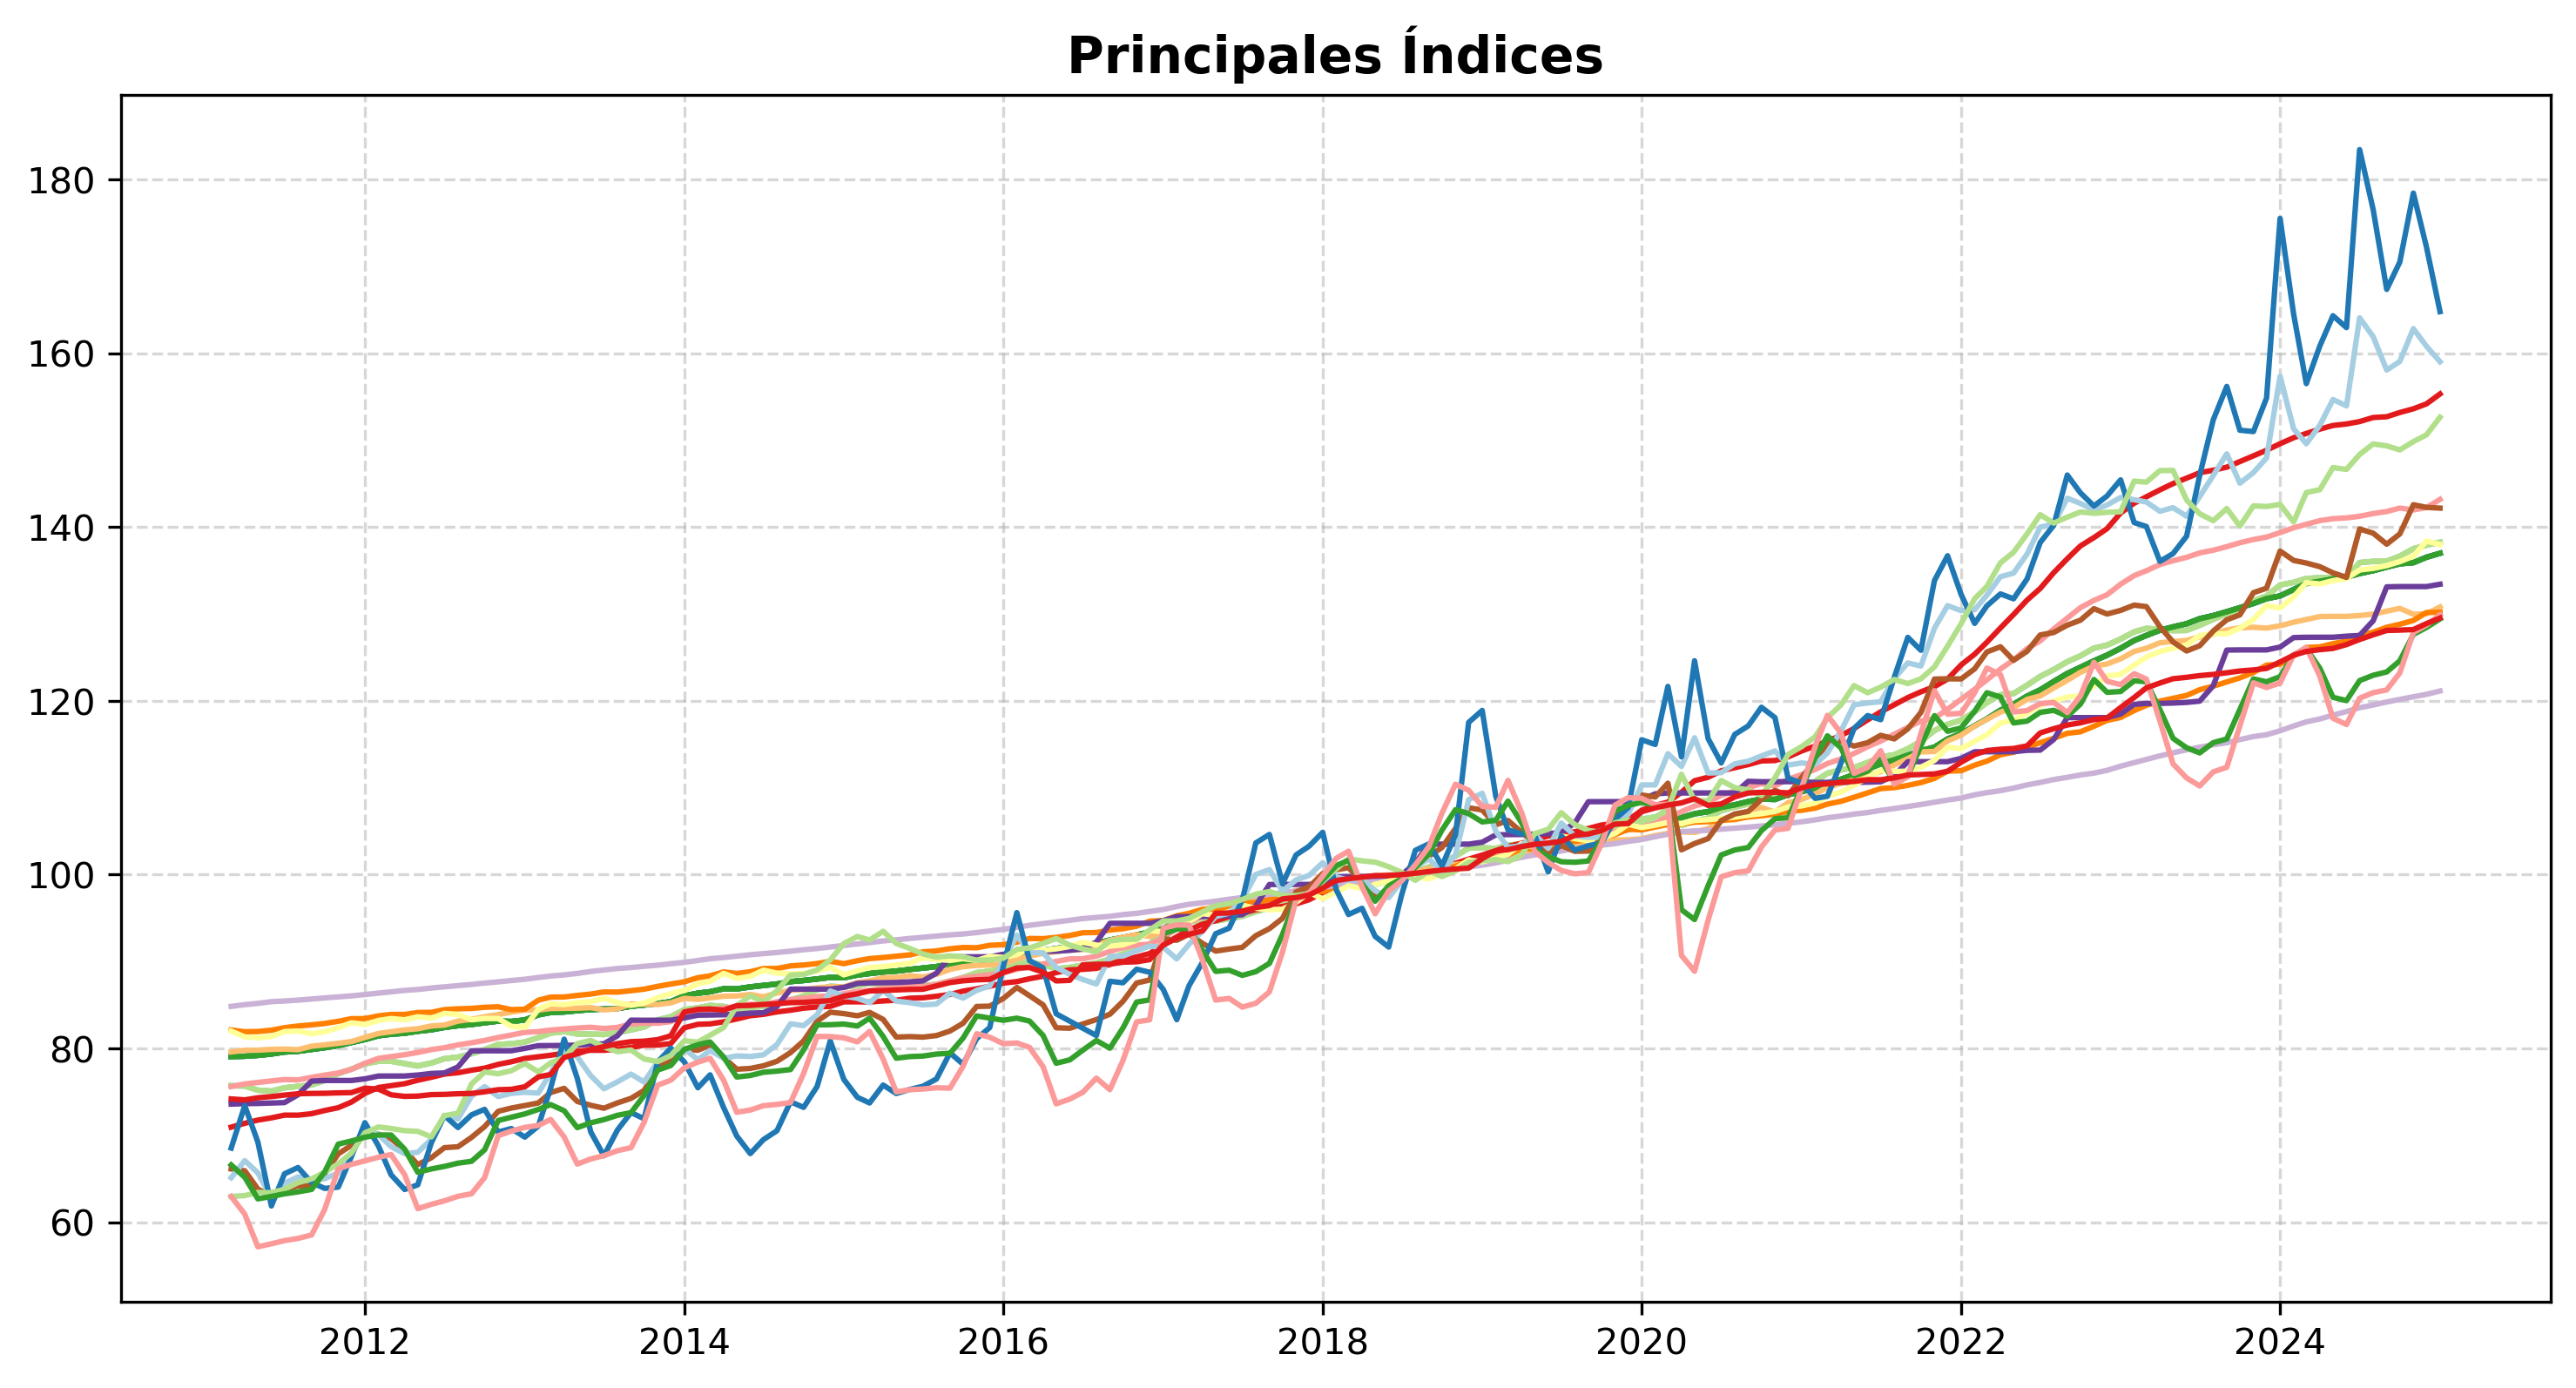

In [96]:
plot_fig(df9, "Principales Índices", legend = False)

In [97]:
df11.columns

Index(['TIIE de Fondeo a Un Día Hábil Bancario, Mediana ponderada por volumen',
       'Tasa de fondeo bancario, Mediana ponderada por volumen, Tasa de interés en por ciento anual',
       'Tasa de fondeo gubernamental, Mediana ponderada por volumen, Tasa de interés en por ciento anual',
       'TIIE a 28 días, Tasa de interés en por ciento anual',
       'Tasas de interés interbancarias Por ciento anual, TIIE a 91 días',
       'Tasa objetivo'],
      dtype='object', name=0)

In [98]:
df11.columns = df11.columns.str.replace(", Mediana ponderada por volumen", "")
df11.columns = df11.columns.str.replace(", Tasa de interés en por ciento anual", "")
df11.columns = df11.columns.str.replace("Tasas de interés interbancarias Por ciento anual, ", "")

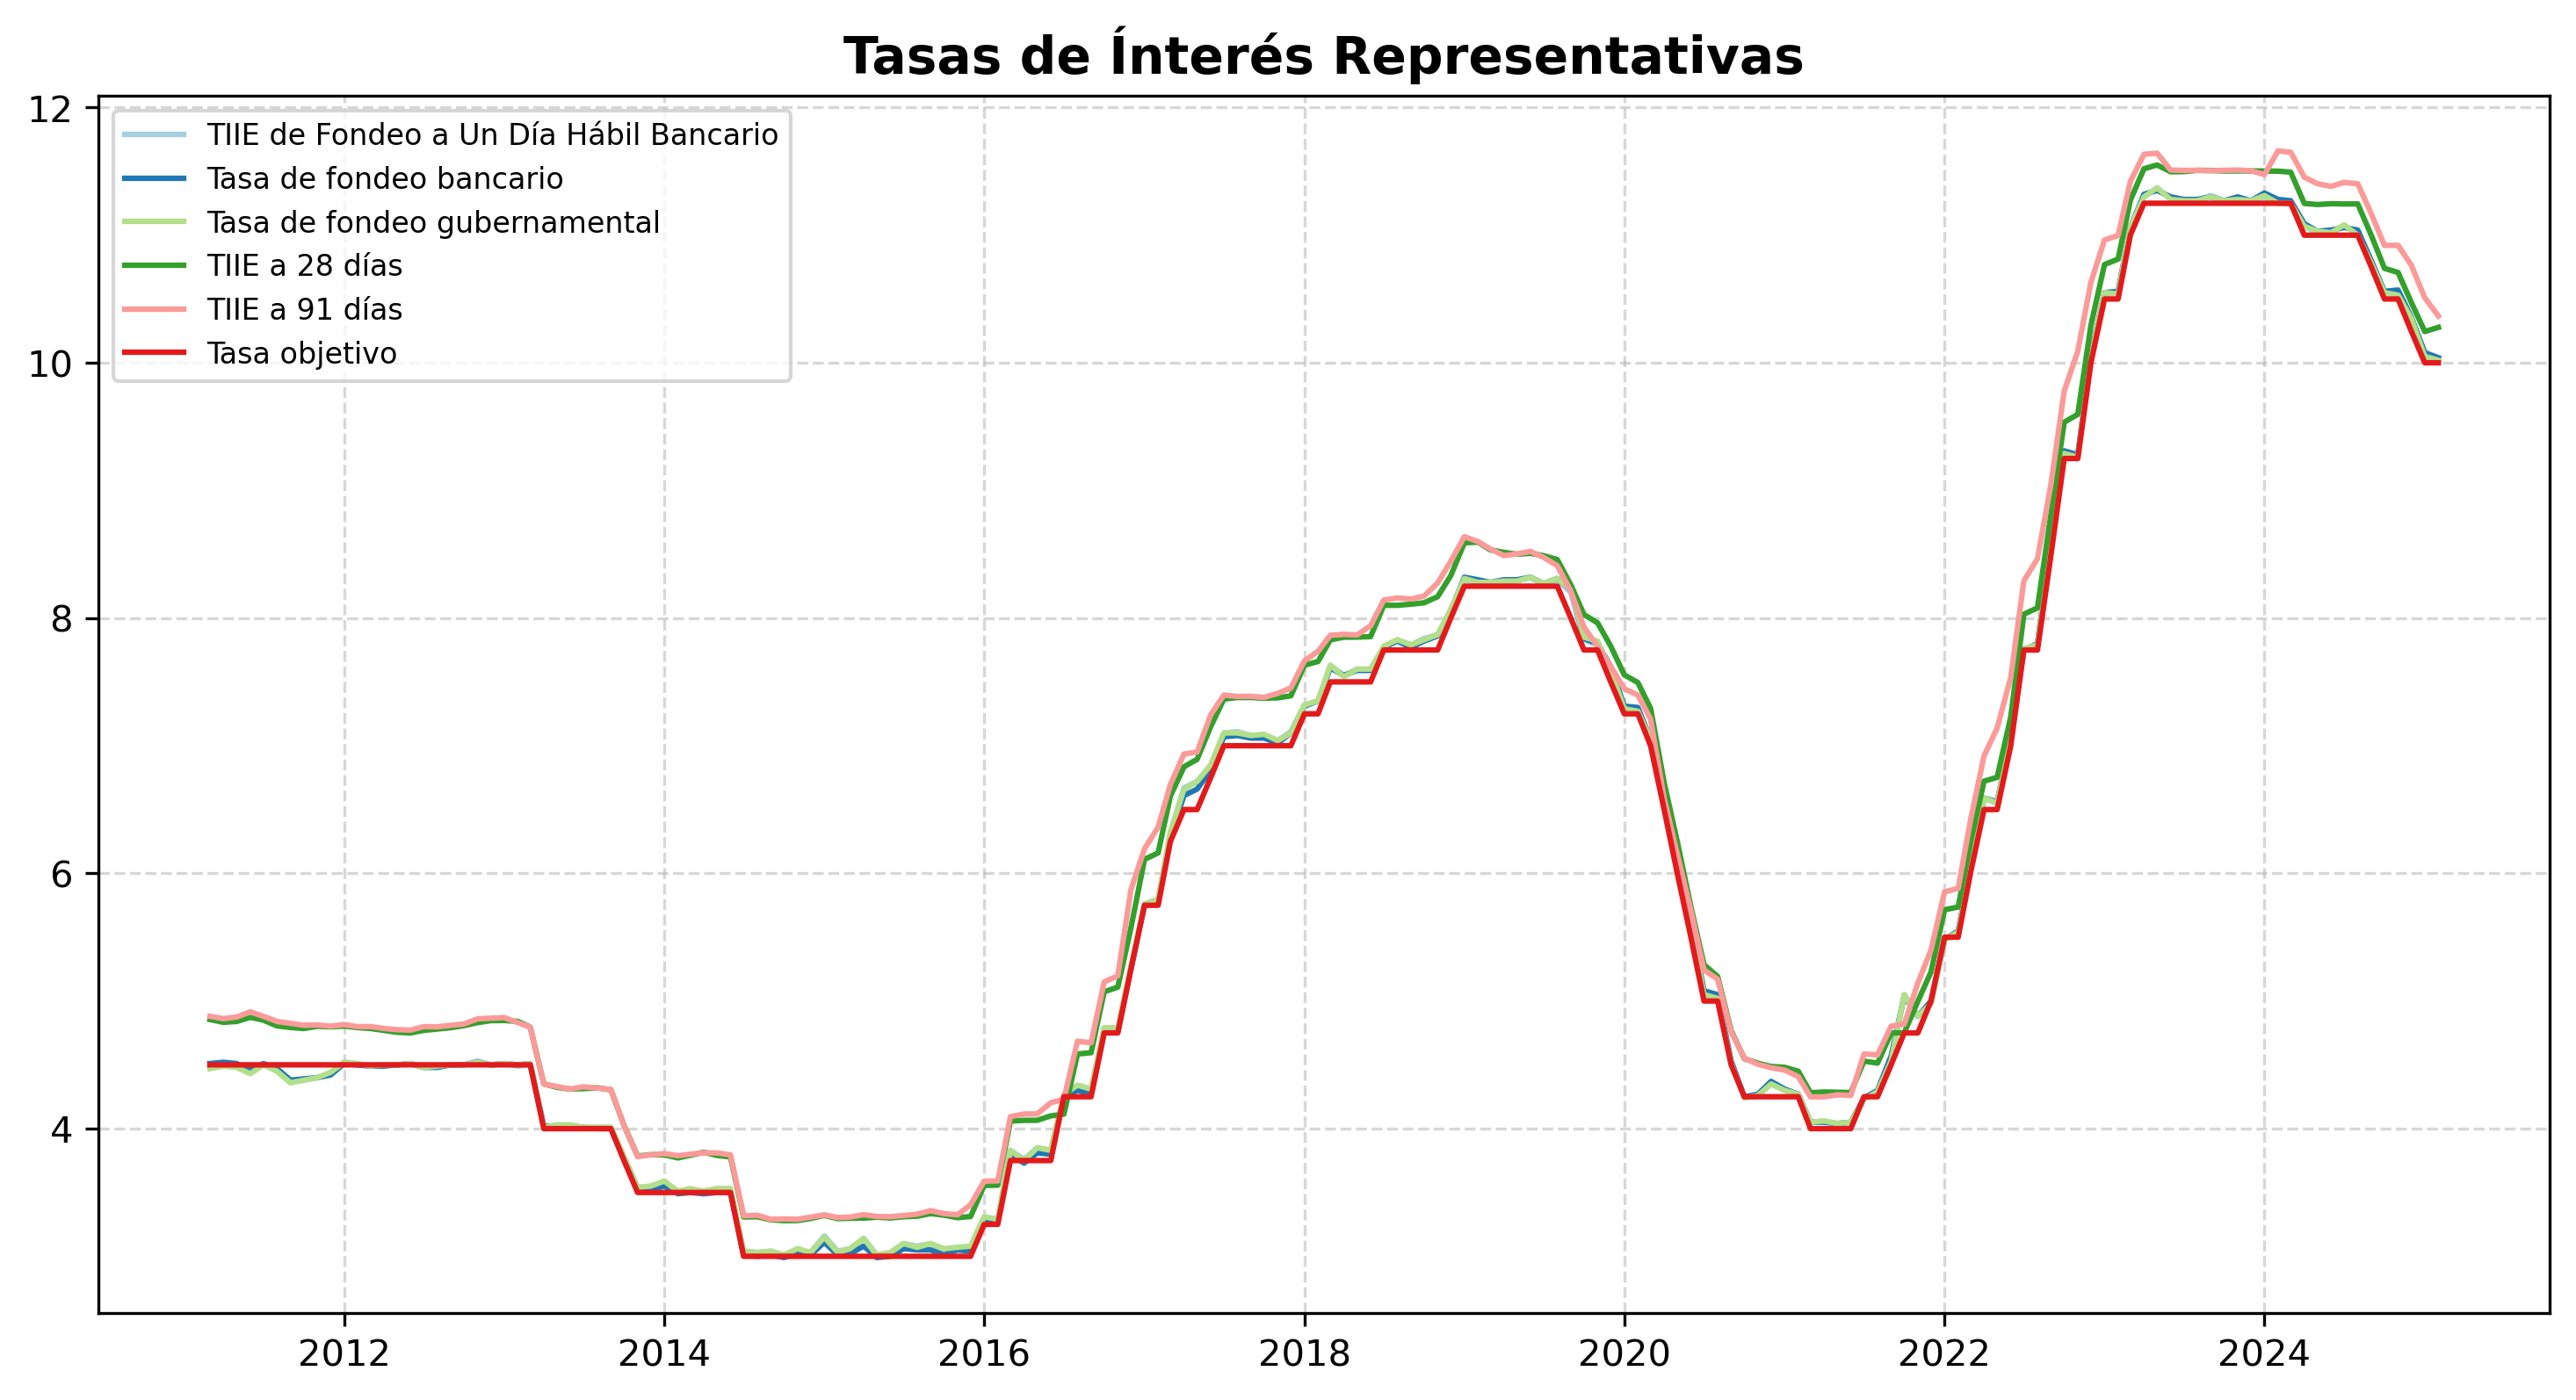

In [99]:
plot_fig(df11, "Tasas de Ínterés Representativas")

In [100]:
df12.columns

Index(['Índice Nacional de Precios al consumidor, Variación mensual',
       'Índice Nacional de Precios al consumidor, Variación acumulada',
       'Índice Nacional de Precios al consumidor, variación anual',
       'Inflación, Subyacente (nueva definición), Mensual',
       'Inflación, Subyacente (nueva definición), Acumulada en el año',
       'Inflación, Subyacente (nueva definición), Anual',
       'Inflación, No subyacente (nueva definición), Mensual',
       'Inflación, No subyacente (nueva definición), Acumulada en el año',
       'Inflación, No subyacente (nueva definición), Anual'],
      dtype='object', name=0)

In [101]:
df12.columns = df12.columns.str.replace(" (nueva definición)", "")
df12.columns = df12.columns.str.replace("Índice Nacional de Precios al consumidor", "INPC")

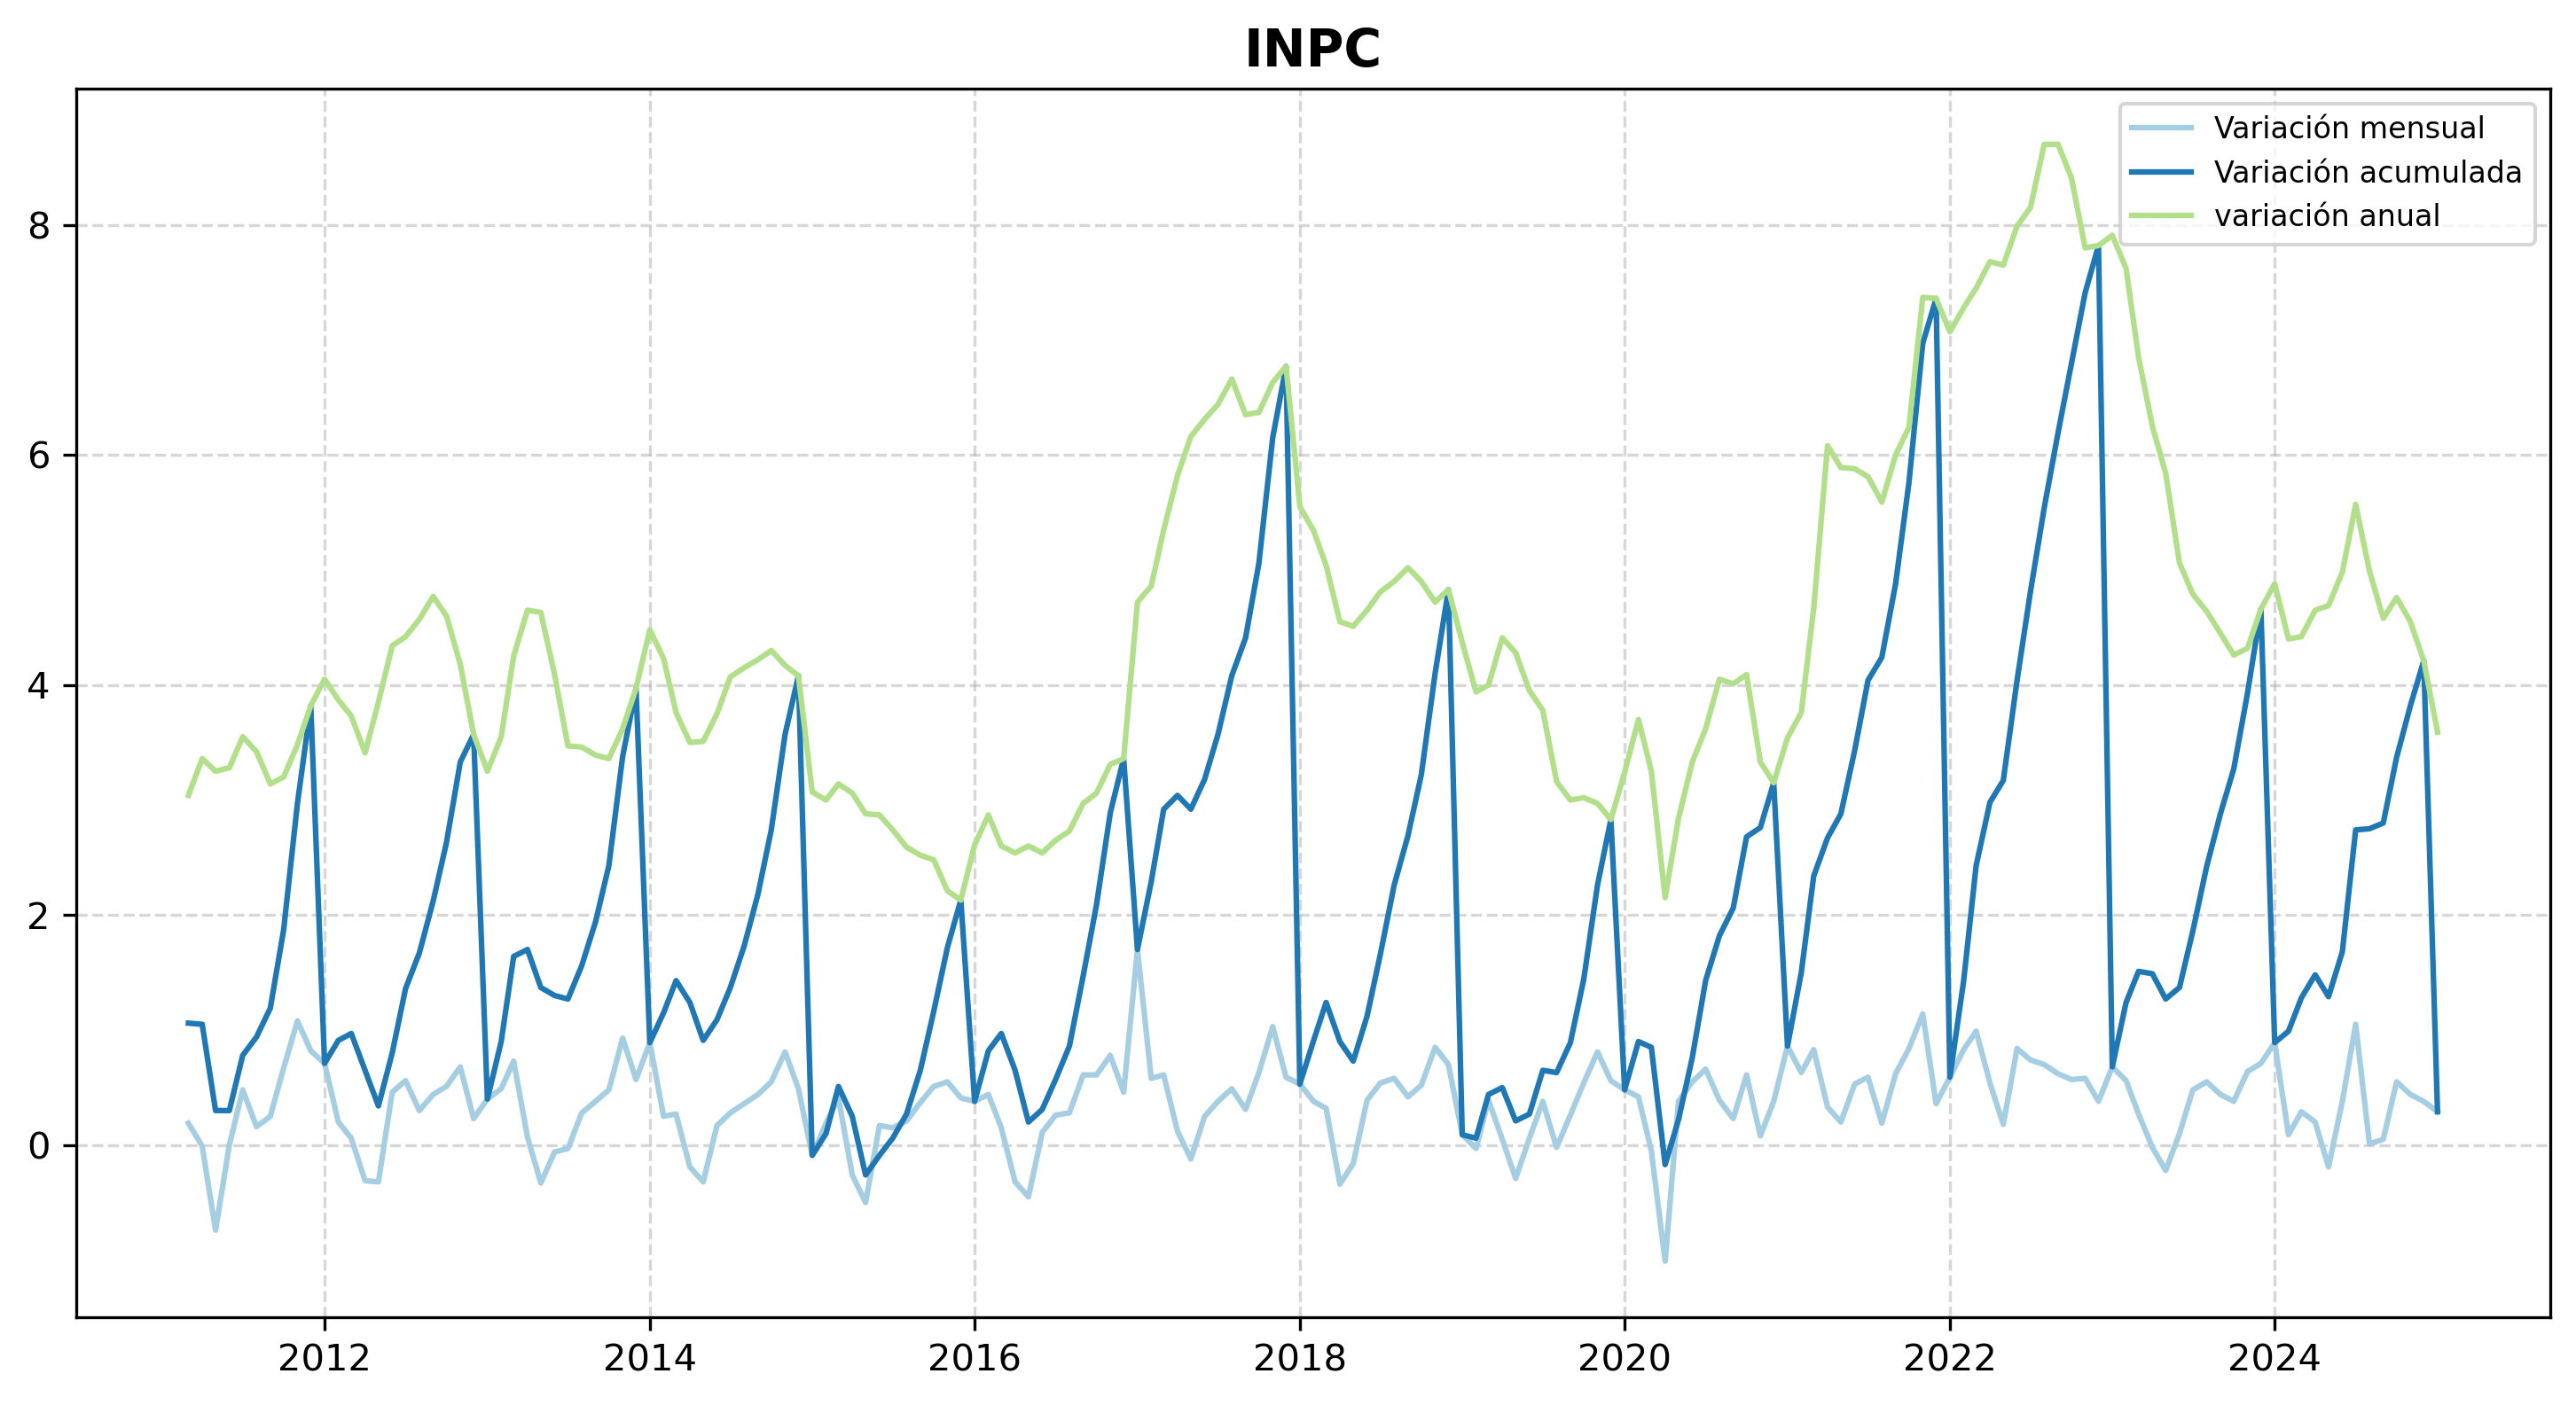

In [102]:
inpc = df12.iloc[:, 0:3]
inpc.columns = inpc.columns.str.replace("INPC, ", "")
plot_fig(inpc, "INPC")

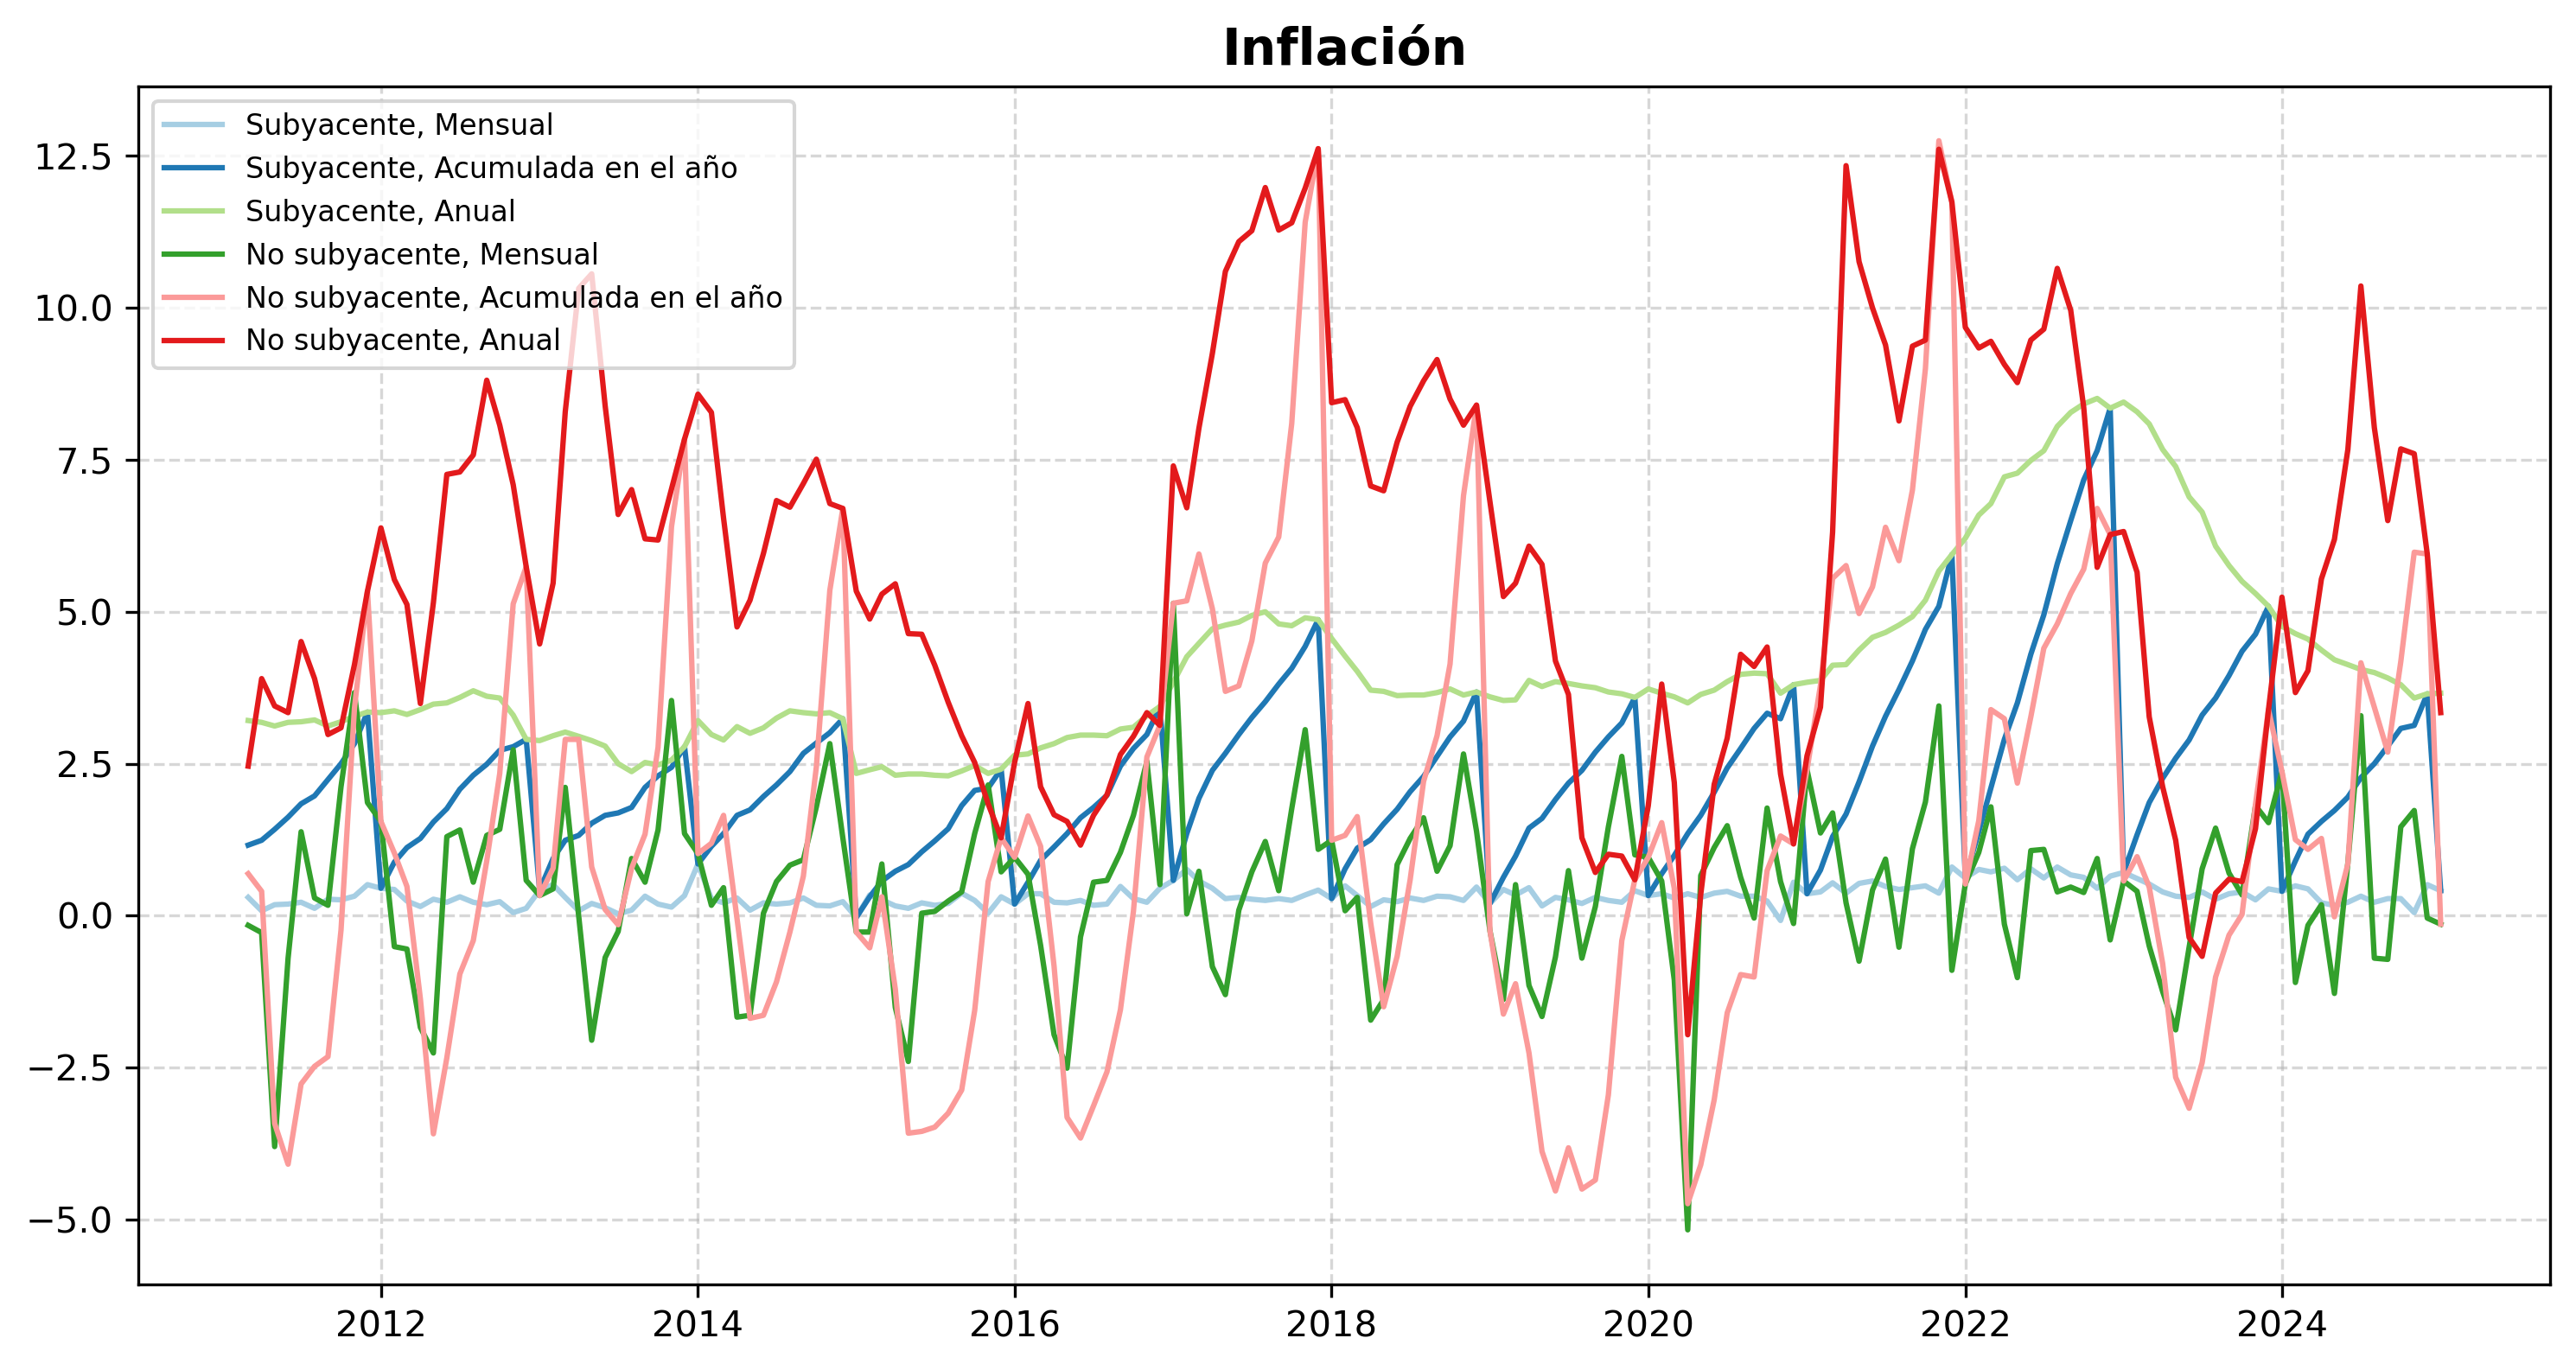

In [103]:
inflacion = df12.iloc[:, 3:]
inflacion.columns = inflacion.columns.str.replace("Inflación, ", "")
plot_fig(inflacion, "Inflación")

In [104]:
df = pd.concat([df1, df2, df3, df4, df5, df6, df8, df9, df11, df12], axis=1)
df.head()
df.to_csv("Datos\\datos-nombres-bonitos.csv")

# Matriz de Corr

In [114]:
df2.columns

Index([' Tarjetas vigentes al cierre del trimestre (todas las marcas)',
       ' (todas las marcas) B', ' (todas las marcas) C',
       ' (todas las marcas) D', ' (todas las marcas) E',
       ' (todas las marcas) F', ' (todas las marcas) G',
       ' (todas las marcas) H', ' (todas las marcas) I',
       ' (todas las marcas) J', ' (todas las marcas) K',
       ' (todas las marcas) L', ' (todas las marcas) M',
       ' (todas las marcas) N', ' (todas las marcas) O',
       ' (todas las marcas) P', ' (todas las marcas) Q',
       ' (todas las marcas) R', ' (todas las marcas) S',
       ' (todas las marcas) T', ' (todas las marcas) U',
       ' (todas las marcas) V', ' (todas las marcas) W',
       ' (todas las marcas) X', ' (todas las marcas) Y',
       ' Tarjetas vigentes al cierre del trimestre (mastercard)',
       ' (mastercard) B', ' (mastercard) C', ' (mastercard) D',
       ' (mastercard) E', ' (mastercard) F', ' (mastercard) G',
       ' (mastercard) H', ' (mastercard) I', ' (ma

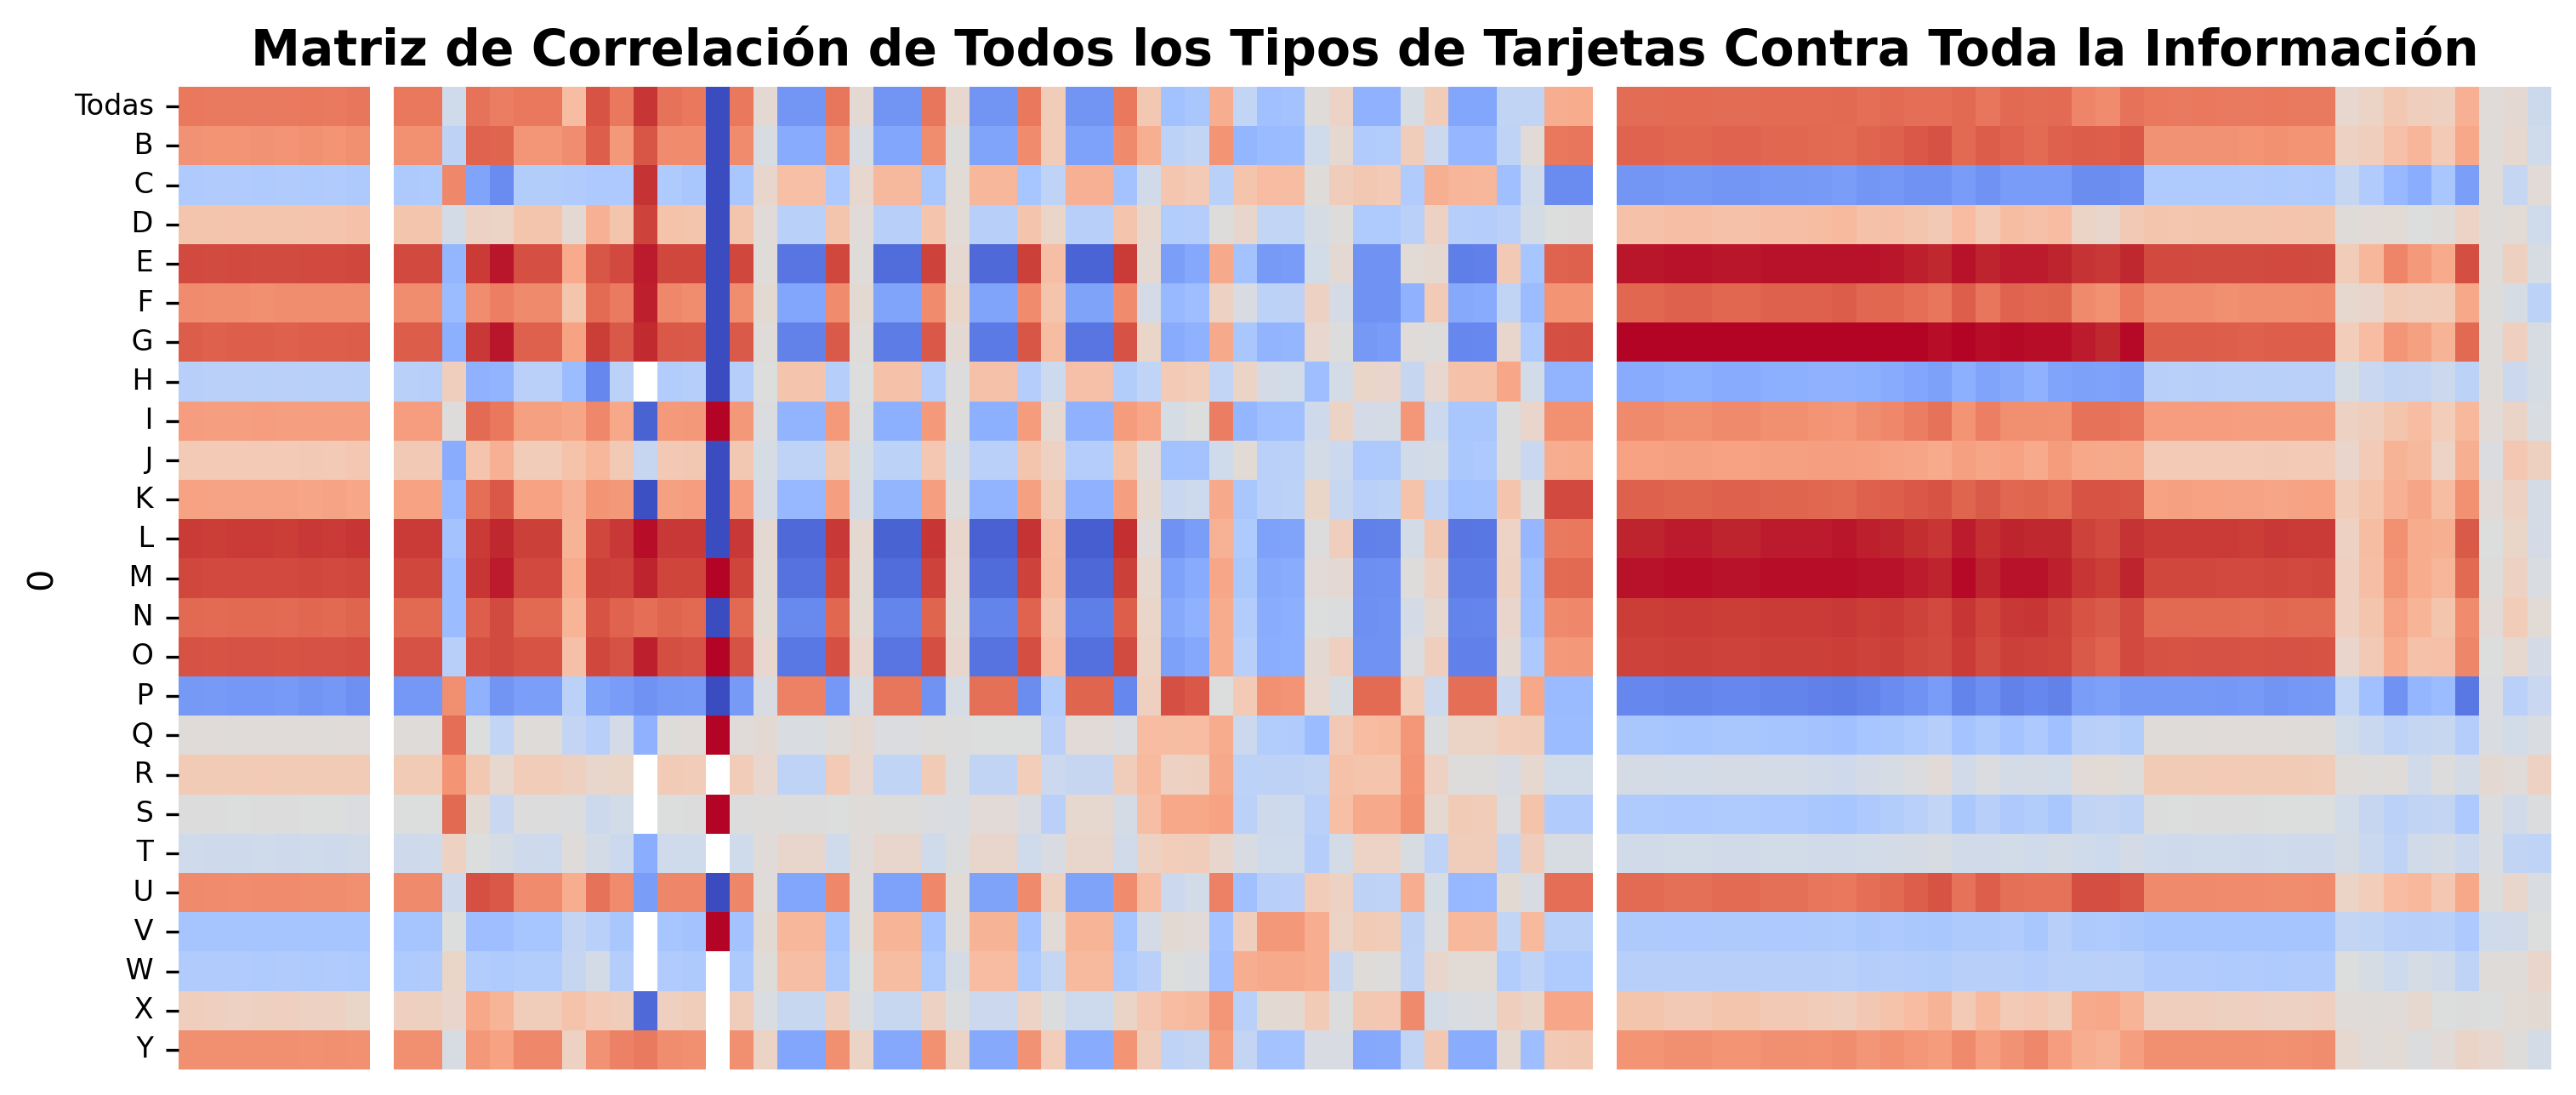

In [143]:
orig_todas_las_marcas = df2.columns[df2.columns.str.contains("todas las marcas")]
tdc = df2[orig_todas_las_marcas]
tdc_clean = tdc.copy()
tdc_clean.columns = tdc_clean.columns.str.replace("(todas las marcas) ", "")

# change the name of the first column
tdc_clean.rename(columns={tdc_clean.columns[0]: "Todas"}, inplace=True)

# Compute the correlation matrix
corr_matrix = df.corr()

# Get the df2 columns and the columns of the other dataframes
df2_cols = df2.columns
other_cols = [col for col in df.columns if col not in df2_cols]

# Extract the rectangular correlation matrix: rows from the original df2 columns matching "todas las marcas" and columns from the others
df2_corr_rect = corr_matrix.loc[orig_todas_las_marcas, other_cols]
df2_corr_rect.index = tdc_clean.columns

# Plot the correlation matrix without labels and numbers
plt.figure(figsize=(12, 5), dpi=300)
sns.heatmap(df2_corr_rect, annot=False, cmap='coolwarm', xticklabels=False, cbar=False)
plt.title("Matriz de Correlación de Todos los Tipos de Tarjetas Contra Toda la Información", fontsize=14, fontweight='bold')
plt.yticks(fontsize=8)
plt.savefig("Datos\\SVG\\Correlación de Todas las Tarjetas.svg")
plt.show()

0
 M       42.081133
 E       39.773590
 L       39.662892
 G       39.632118
 O       37.824731
 N       34.254223
 U       30.525251
 B       29.899972
Todas    29.426367
 K       27.995391
 I       26.869335
 F       26.502485
 Y       22.892736
 J       13.286275
 X       13.042260
 D        9.179925
 R        5.585046
 S       -3.509476
 T       -5.217481
 Q       -6.202141
 W      -13.051564
 V      -13.860923
 H      -21.087689
 C      -23.382928
 P      -29.336127
dtype: float64


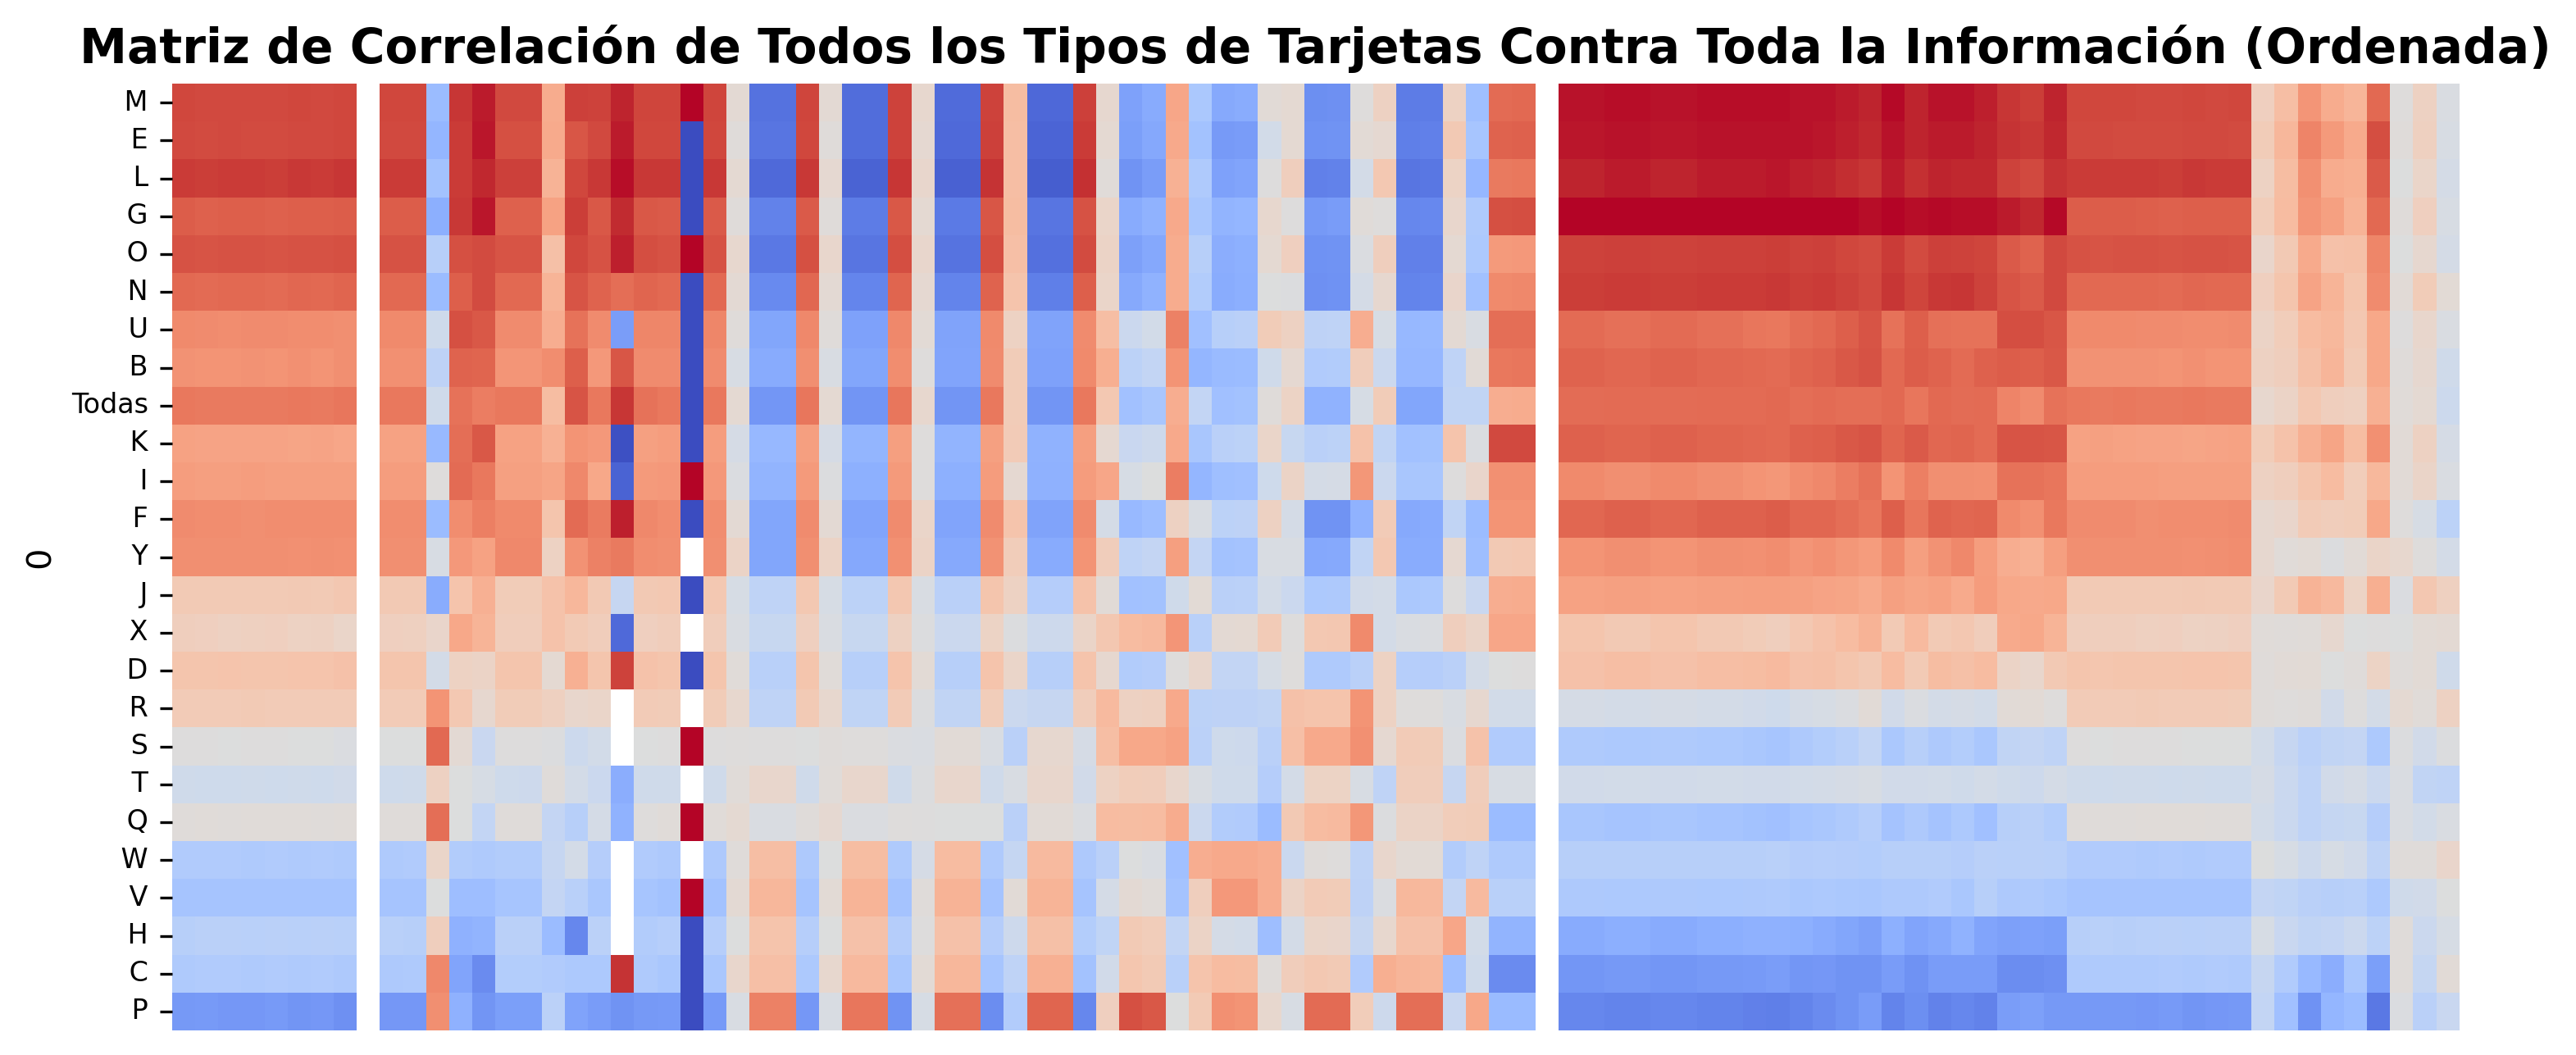

In [145]:
row_sums = df2_corr_rect.sum(axis=1).sort_values(ascending=False)
print(row_sums)

# Plot the correlation matrix ordered by row sums
plt.figure(figsize=(12, 5), dpi=300)
sns.heatmap(df2_corr_rect.loc[row_sums.index], annot=False, cmap='coolwarm', xticklabels=False, cbar=False)
plt.title("Matriz de Correlación de Todos los Tipos de Tarjetas Contra Toda la Información (Ordenada)", fontsize=14, fontweight='bold')
plt.yticks(fontsize=8)
plt.savefig("Datos\\SVG\\Correlación de Todas las Tarjetas Ordenada.svg")
plt.show()